### **Problem Statement:**

Leveraging the transactional data of customers during the Black Friday collected by Walmart which consists of Purchase Amount, Gender, Age, Occupation, City Category, Stay in Current city, Marital status and Product category to analyze the customer behaviour (specifically purchase amount) against the customer's gender and various other factors to help the business make better decisions.



In [ ]:
# Importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom,geom
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
csv_location='/content/gdrive/MyDrive/walmart.csv'

In [ ]:
df=pd.read_csv(csv_location)
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
#Shape of the dataset
df.shape


(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#Checking data types
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
#No of unique values in each column
for i in df.columns:
  print(i,": ",df[i].nunique())

User_ID :  5891
Product_ID :  3631
Gender :  2
Age :  7
Occupation :  21
City_Category :  3
Stay_In_Current_City_Years :  5
Marital_Status :  2
Product_Category :  20
Purchase :  18105


In [ ]:
#Checking for null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There aren't any missing values in the dataset

### **Checking value counts for Categorical Variable**

In [ ]:
cat_col=['Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
for i in cat_col:
  print(df[i].value_counts(),'\n\n\n')

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64 



M    414259
F    135809
Name: Gender, dtype: int64 



26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64 



4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64 



B    231173
C    171175
A    147720
Name: City_Category, dtype: int64 



1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64 



0    324731
1    225337
Name: Marital_Status, dtype: int64 



5     150933
1    

In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

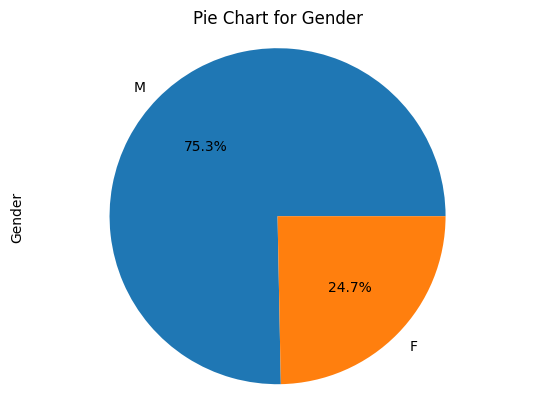

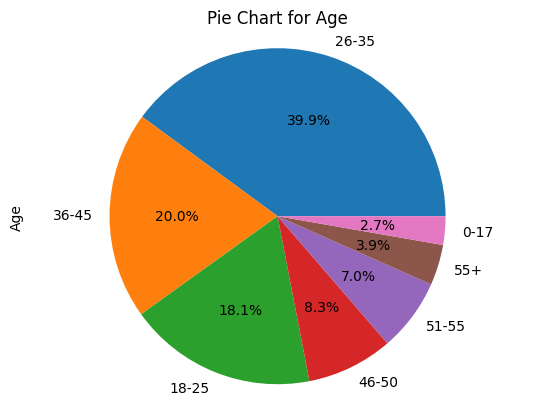

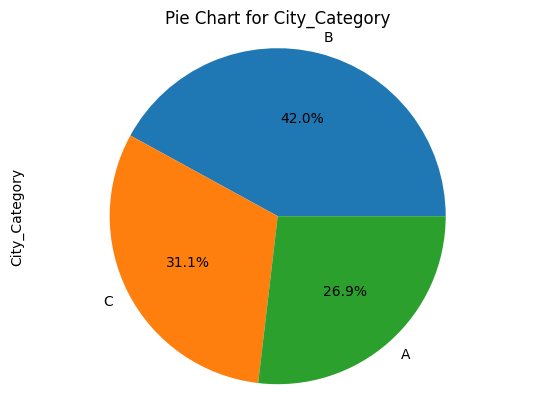

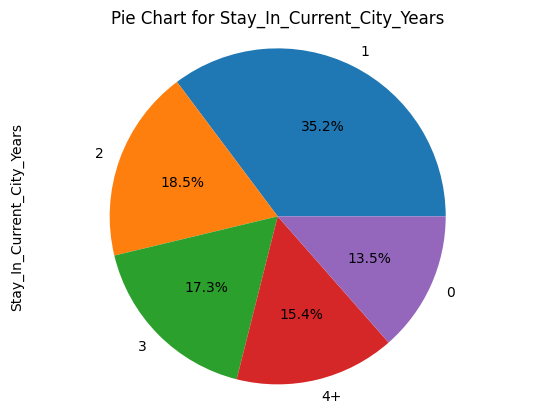

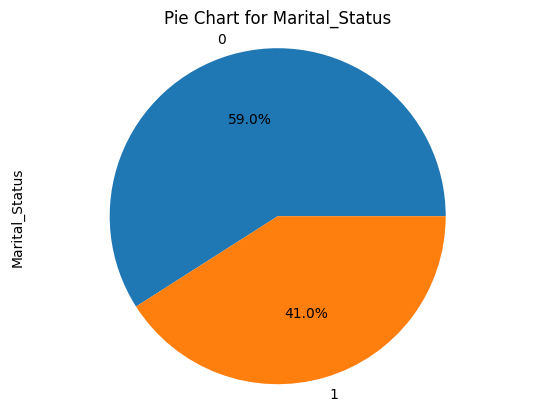

In [ ]:
cat_col = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

for column_name in cat_col:
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart for {column_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

**Observations:**

* Approximately 75% of the customer base consists of males.

* There are a total of seven distinct age groups among the customers. Approximately 40% of the entire customer base falls within the 26-35 age group.

* The customer population can be categorized into three unique city categories, with City Category-B accounting for approximately 42% of the customers.

* Roughly 35% of the customers have been residing in their current city for one year.

* Approximately 60% of the total customers are not in a marital relationship.

### **Statistical Analysis**

In [ ]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000

In [ ]:
df.describe(include='object')

Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      550068  550068  550068        550068                     550068
unique       3631       2       7             3                          5
top     P00265242       M   26-35             B                          1
freq         1880  414259  219587        231173                     193821

**Observations:**

 * Mean spending on products by Black Friday shoppers - 9263.97

 * Lowest purchase amount of product bought by customers on Black Friday- 12

 * Highest purchase value of product bought by customers on Black Friday- 23961

 * Median spending on products by Black Friday shoppers- 8047

 * Diverse number of product bought by customers on Black Friday- 3631

 * Best Selling Product- P00265242 (180 times)







In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

### **Correlation b/w the columns of DataFrame**

In [ ]:
# A broader look at correlation between the columns of dataframe

# Creating a copy of the dataframe -
df_copy=df.copy()

df_copy['Gender'].replace(['M', 'F'], [1, 0], inplace=True)

df_copy['Age'].replace(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], [0, 1, 2, 3, 4, 5, 6], inplace=True)

df_copy['City_Category'].replace(['A', 'B', 'C'], [0, 1, 2], inplace=True)

df_copy['Stay_In_Current_City_Years'].replace(['0','1','2','3','4+'], [0,1,2,3,4], inplace=True)

df_copy.corr()

User_ID    Gender       Age  Occupation  \
User_ID                     1.000000 -0.033474  0.032698   -0.023971   
Gender                     -0.033474  1.000000 -0.004262    0.117291   
Age                         0.032698 -0.004262  1.000000    0.091463   
Occupation                 -0.023971  0.117291  0.091463    1.000000   
City_Category               0.022859 -0.004515  0.123079    0.034479   
Stay_In_Current_City_Years -0.030737  0.014660 -0.004712    0.030005   
Marital_Status              0.020443 -0.011603  0.311738    0.024280   
Product_Category            0.003825 -0.045594  0.061197   -0.007618   
Purchase                    0.004716  0.060346  0.015839    0.020833   

                            City_Category  Stay_In_Current_City_Years  \
User_ID                          0.022859                   -0.030737   
Gender                          -0.004515                    0.014660   
Age                              0.123079                   -0.004712   
Occupation                       0.034479                    0.030005   
City_Category                    1.000000                    0.019946   
Stay_In_Current_City_Years       0.019946                    1.000000   
Marital_Status                   0.039790                   -0.012819   
Product_Category                -0.014364                   -0.004213   
Purchase                         0.061914                    0.005422   

                            Marital_Status  Product_Category  Purchase  
User_ID                           0.020443          0.003825  0.004716  
Gender                           -0.011603         -0.045594  0.060346  
Age                               0.311738          0.061197  0.015839  
Occupation                        0.024280         -0.007618  0.020833  
City_Category                     0.039790         -0.014364  0.061914  
Stay_In_Current_City_Years       -0.012819         -0.004213  0.005422  
Marital_Status                    1.000000          0.019888 -0.000463  
Product_Category                  0.019888          1.000000 -0.343703  
Purchase                         -0.000463         -0.343703  1.000000

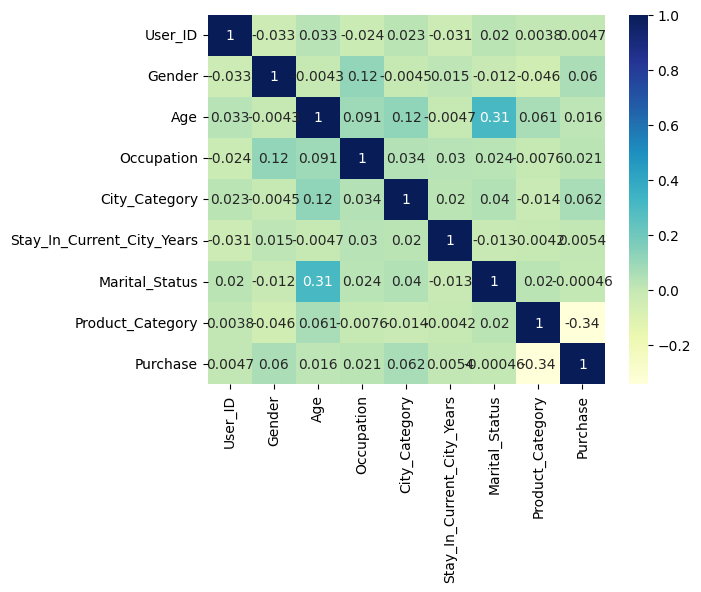

In [ ]:
# Correlation Plot above as a Heatmap -

# plt.figure(figsize=(10,8))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()

* While examining the data, it becomes evident that there aren't substantial correlations among most of the variables. The only noteworthy negative correlation we observe is a weak one between the product category and purchase amounts

### **Observing the outliers**

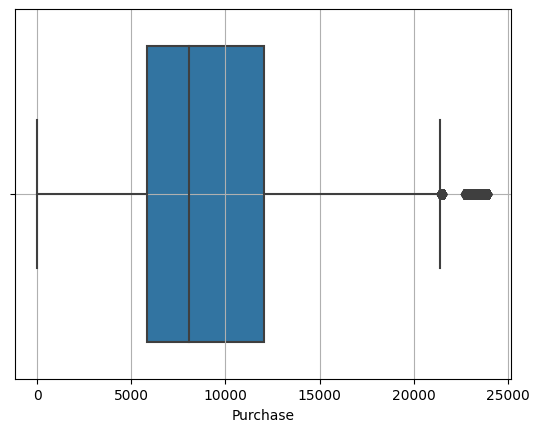

In [ ]:
ax=sns.boxplot(x=df_copy['Purchase'])
plt.grid()
plt.show()

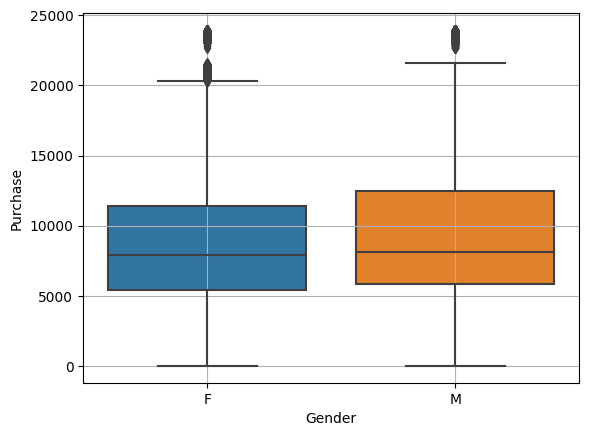

In [ ]:
ax=sns.boxplot(y=df['Purchase'],x=df['Gender'])
plt.grid()
plt.show()

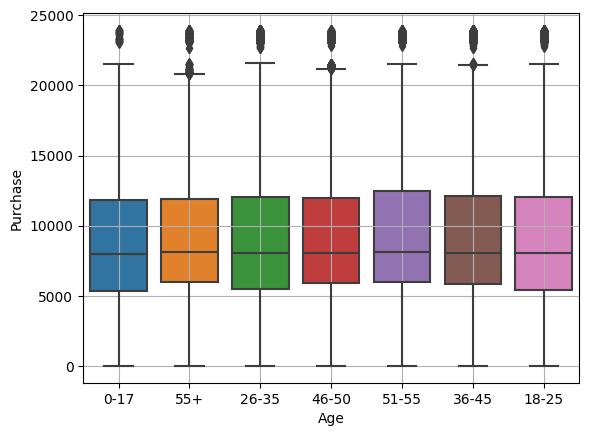

In [ ]:
ax=sns.boxplot(y=df['Purchase'],x=df['Age'])
plt.grid()
plt.show()

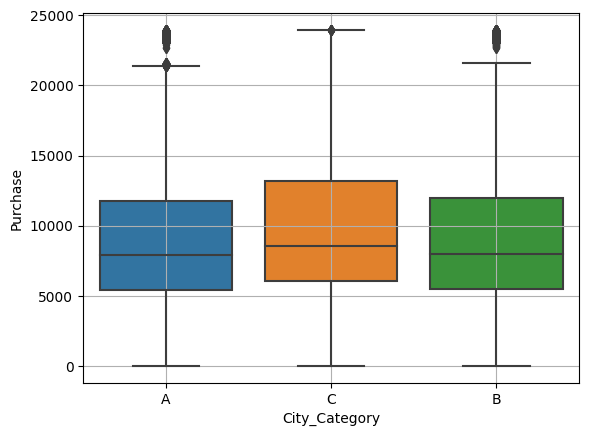

In [ ]:
ax=sns.boxplot(y=df['Purchase'],x=df['City_Category'])
plt.grid()
plt.show()

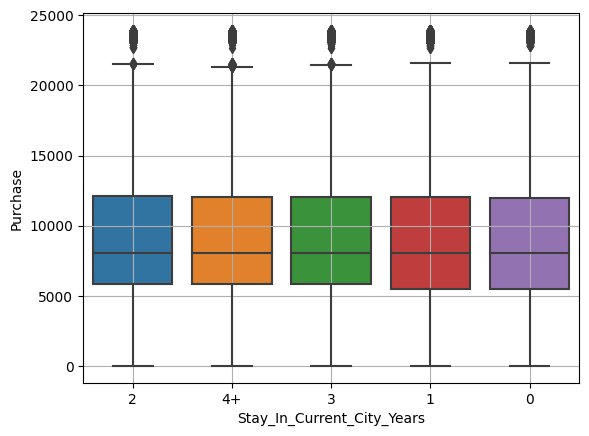

In [ ]:
ax=sns.boxplot(y=df['Purchase'],x=df['Stay_In_Current_City_Years'])
plt.grid()
plt.show()

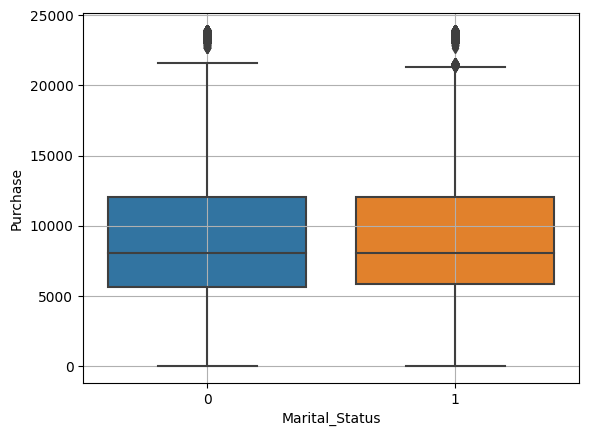

In [ ]:
ax=sns.boxplot(y=df['Purchase'],x=df['Marital_Status'])
plt.grid()
plt.show()

* Indeed, the existence of outliers in our dataset is evident; however, their removal comes at the cost of losing valuable information.

* In determining whether to remove outliers, several factors come into play:

  * Firstly, we must ascertain whether outliers result from measurement or data entry errors. If the answer is affirmative, then removal may be considered.

  * Secondly, if an outlier does not represent a facet of the population under study and can be attributed to an unusual condition, it may warrant removal.

  * Conversely, if an outlier is a legitimate part of our natural population, it should be retained rather than removed.

* Regarding the Purchase Amount column, outliers stem from the varying popularity of products, leading to fewer customers purchasing certain items. Consequently, it is not advisable to remove these outliers from the given dataset. However, for illustration purposes, we provide a demonstration of how to mathematically identify and subsequently eliminate outliers from the dataset.

In [ ]:
#For illustrative purpose

data = df['Purchase']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
if lower < 0:
  lower=0
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  9263.968712959126
Median :  8047.0
1st Quartile :  5823.0
3rd Quartile :  12054.0
Innerquartile Range :  6231.0
Upper Bound :  21400.5
Lower Bound :  0
Outliers :  [21401, 21401, 21401, 21402, 21404, 21404, 21405, 21405, 21406, 21408, 21409, 21410, 21410, 21410, 21411, 21411, 21412, 21412, 21412, 21415, 21416, 21417, 21418, 21418, 21418, 21419, 21421, 21421, 21422, 21422, 21422, 21423, 21423, 21423, 21423, 21423, 21424, 21424, 21425, 21425, 21427, 21427, 21427, 21428, 21429, 21429, 21430, 21431, 21433, 21433, 21433, 21435, 21435, 21435, 21435, 21436, 21437, 21437, 21437, 21437, 21438, 21438, 21438, 21438, 21439, 21439, 21440, 21440, 21441, 21441, 21441, 21442, 21443, 21443, 21443, 21443, 21444, 21445, 21445, 21446, 21447, 21447, 21448, 21448, 21449, 21450, 21450, 21451, 21451, 21452, 21453, 21453, 21453, 21454, 21454, 21455, 21456, 21459, 21461, 21462, 21462, 21462, 21462, 21462, 21462, 21463, 21463, 21463, 21464, 21466, 21467, 21468, 21468, 21468, 21468, 21469, 21469, 21469, 2

In [ ]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

* Mean value of Purchase column before removing the outliers: 9263.97

* Median value of Purchase column before removing the outliers: 8047

In [ ]:
new_df_without_outliers=data[(data>=lower) & (data<=upper)]
new_df_without_outliers.describe()

count    547391.000000
mean       9195.627195
std        4938.872953
min          12.000000
25%        5721.000000
50%        8038.000000
75%       12019.000000
max       21399.000000
Name: Purchase, dtype: float64

* Mean value of Purchase column after removing the outliers: 9195.627

* Median value of Purchase column after removing the outliers: 8038

Thus outliers have more impact on Mean then Median

### **Univariate Analysis**

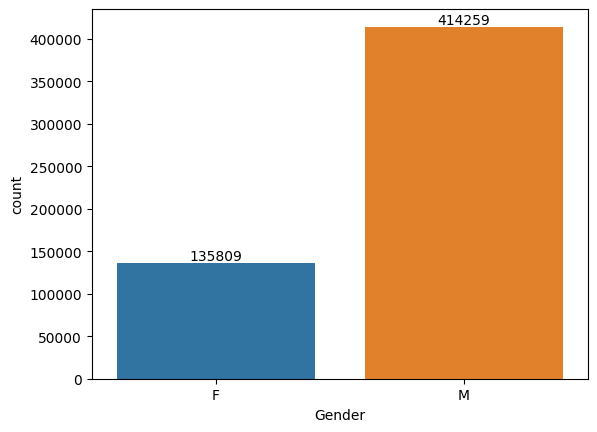

In [ ]:
label=sns.countplot(x=df['Gender'])
for i in label.containers:
    label.bar_label(i)

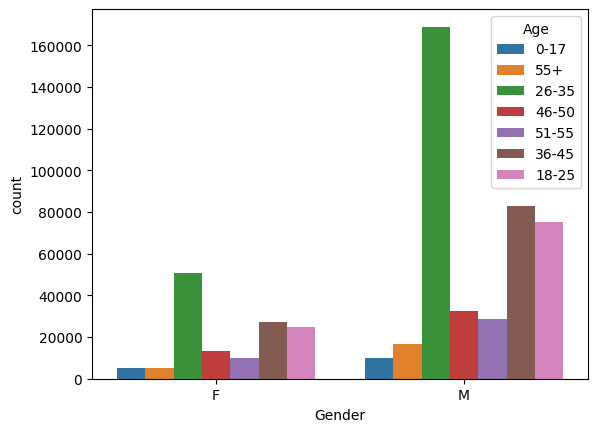

In [ ]:
sns.countplot(x=df['Gender'],hue=df['Age'])
plt.show()

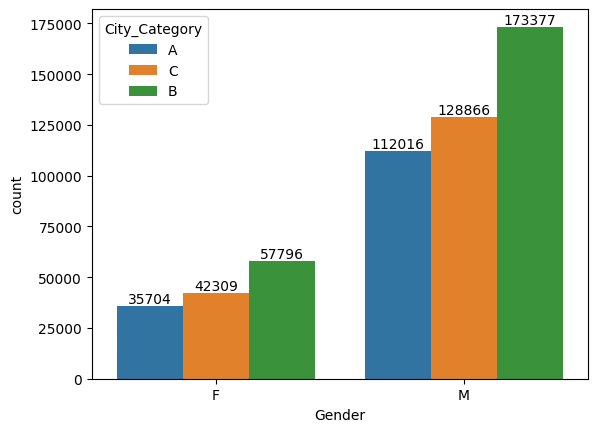

In [ ]:
label=sns.countplot(x=df['Gender'],hue=df['City_Category'])
for i in label.containers:
    label.bar_label(i)

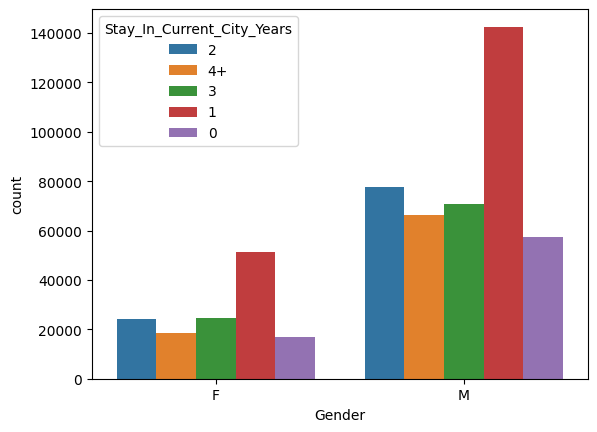

In [ ]:
sns.countplot(x=df['Gender'],hue=df['Stay_In_Current_City_Years'])
plt.show()

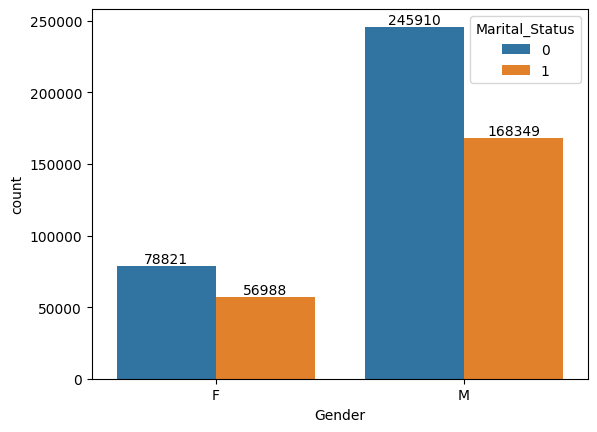

In [ ]:
label=sns.countplot(x=df['Gender'],hue=df['Marital_Status'])
for i in label.containers:
    label.bar_label(i)

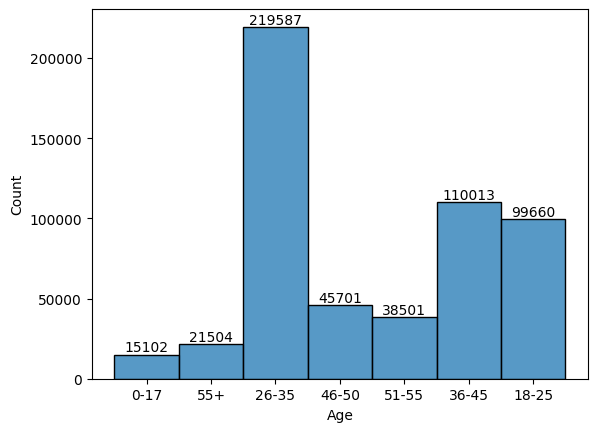

In [ ]:
label=sns.histplot(x=df['Age'])
for i in label.containers:
    label.bar_label(i)

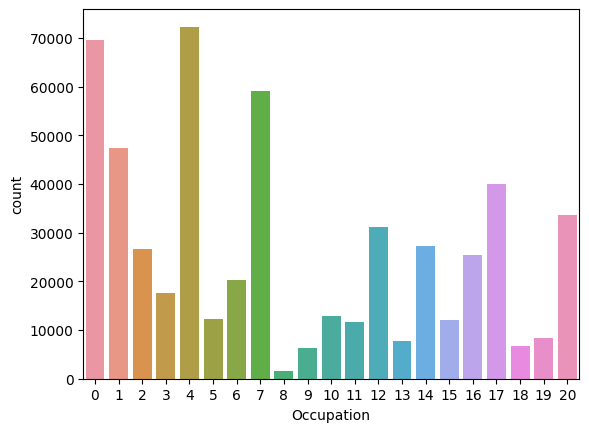

In [ ]:
sns.countplot(x=df['Occupation'])
plt.show()

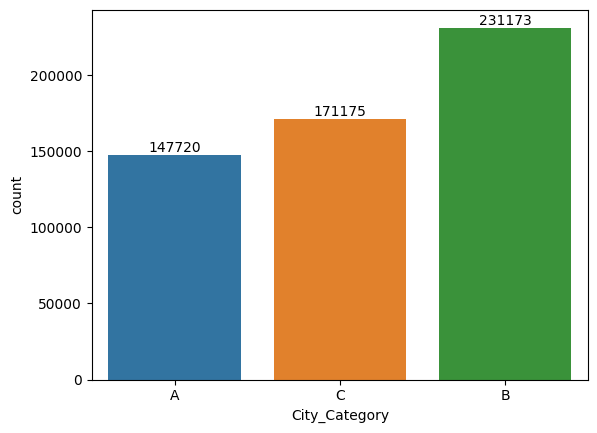

In [ ]:
label=sns.countplot(x=df['City_Category'])
for i in label.containers:
    label.bar_label(i)

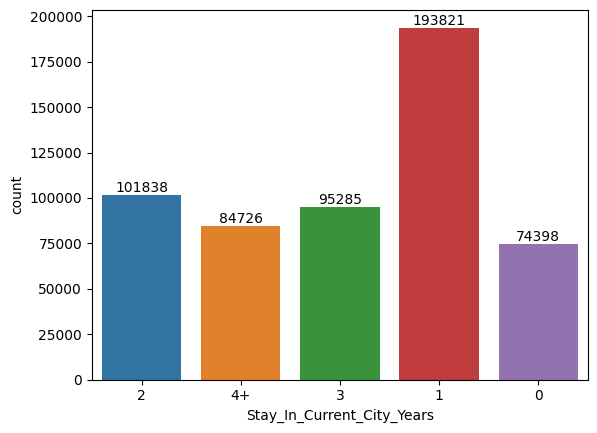

In [ ]:
label=sns.countplot(x=df['Stay_In_Current_City_Years'])
for i in label.containers:
    label.bar_label(i)

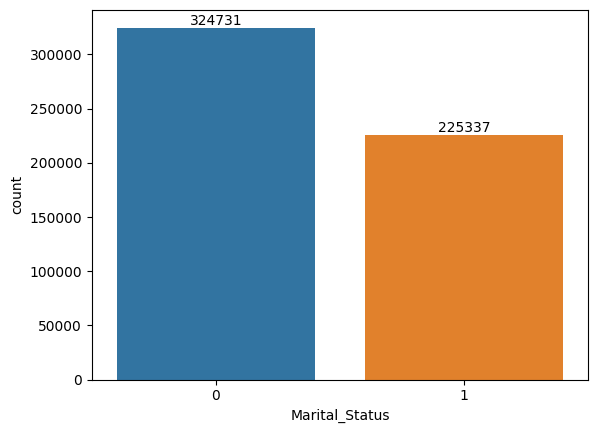

In [ ]:
label=sns.countplot(x=df['Marital_Status'])
for i in label.containers:
    label.bar_label(i)

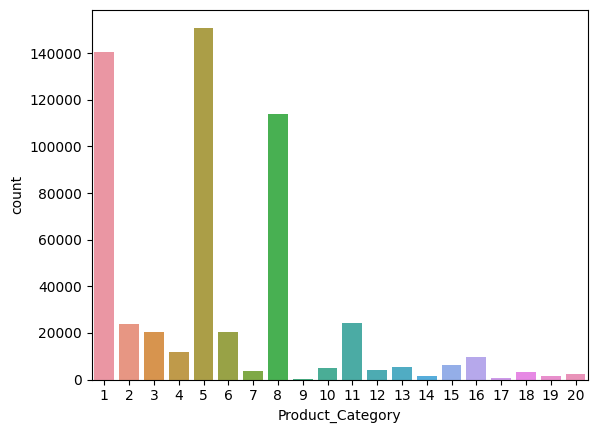

In [ ]:
sns.countplot(x=df['Product_Category'])
plt.show()

**Observations:**

* Male customers dominate Black Friday shoppers.

* Unmarried individuals constitute the majority of Black Friday shoppers.

* A significant portion of Black Friday customers has lived in their current city for a year.

* City category 'B' is the most common among Black Friday shoppers.

* Occupation '4' and '1' are the prevailing choice among customers.

* The 26-35 age group encompasses the majority of customers on Black Friday.

* Majority of customer during Black friday bought products of Product Category '5', '1', '8'

### **Bi-variate Analysis**

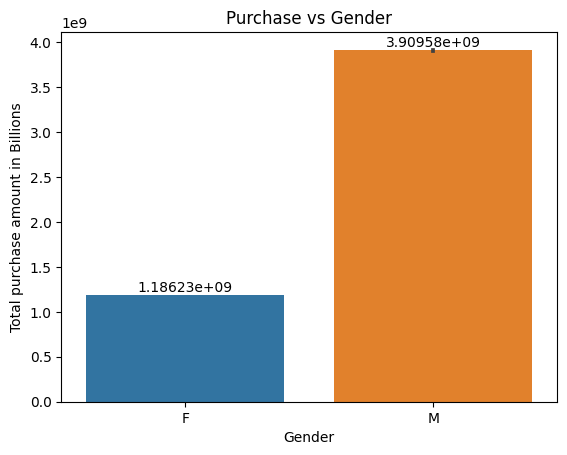

In [ ]:
label=sns.barplot(data=df,x='Gender',y='Purchase',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Purchase vs Gender')
plt.ylabel('Total purchase amount in Billions')
plt.show()

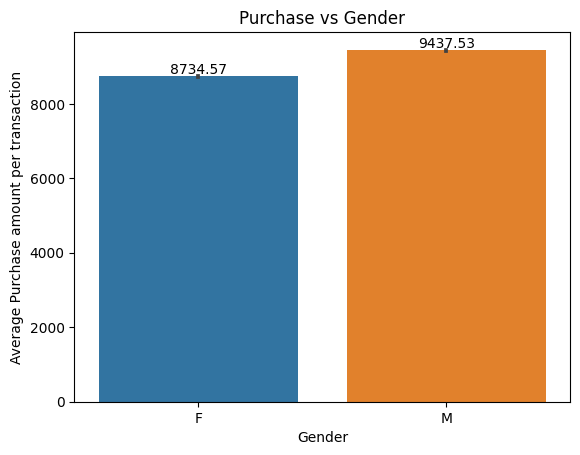

In [ ]:
label=sns.barplot(data=df,x='Gender',y='Purchase',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Purchase vs Gender')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

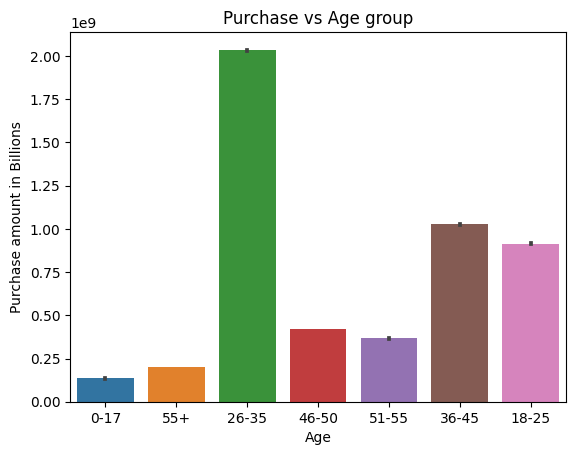

In [ ]:
sns.barplot(data=df,x='Age',y='Purchase',estimator='sum')
plt.title('Purchase vs Age group')
plt.ylabel('Purchase amount in Billions')
plt.show()

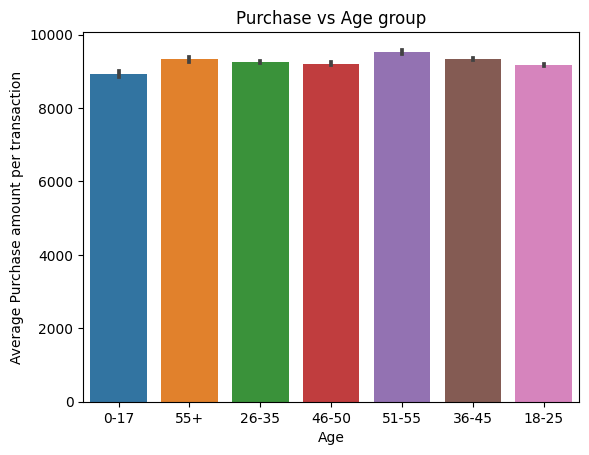

In [ ]:
sns.barplot(data=df,x='Age',y='Purchase')
plt.title('Purchase vs Age group')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

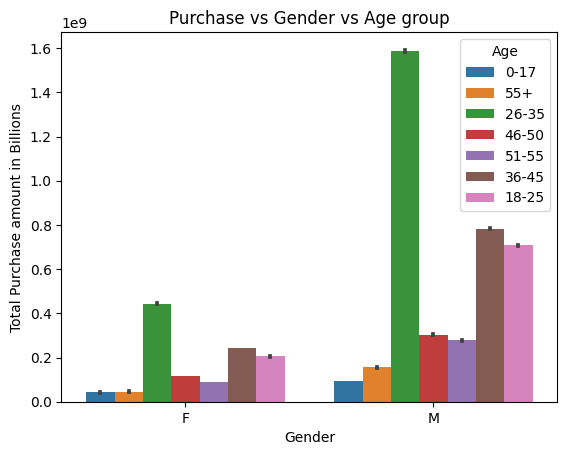

In [ ]:
label=sns.barplot(data=df,x='Gender',y='Purchase',estimator='sum',hue='Age')
plt.title('Purchase vs Gender vs Age group')
plt.ylabel('Total Purchase amount in Billions')
plt.show()

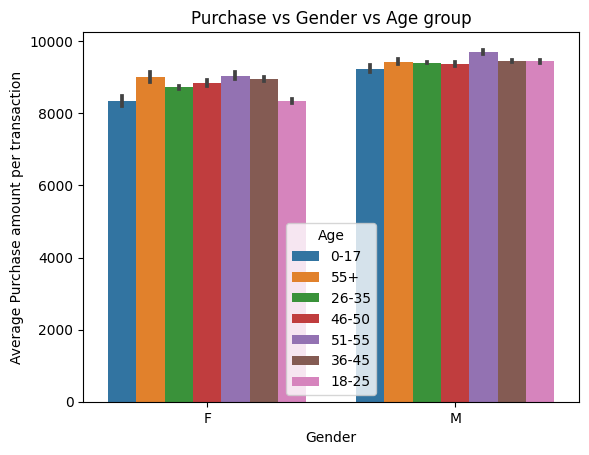

In [ ]:
label=sns.barplot(data=df,x='Gender',y='Purchase',estimator='mean',hue='Age')
plt.title('Purchase vs Gender vs Age group')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

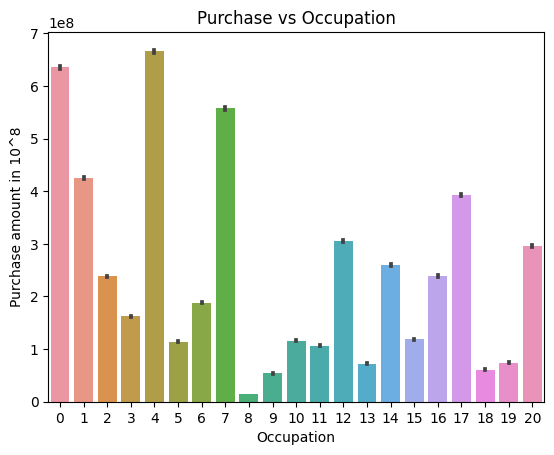

In [ ]:
sns.barplot(data=df,x='Occupation',y='Purchase',estimator='sum')
plt.title('Purchase vs Occupation')
plt.ylabel('Purchase amount in 10^8')
plt.show()

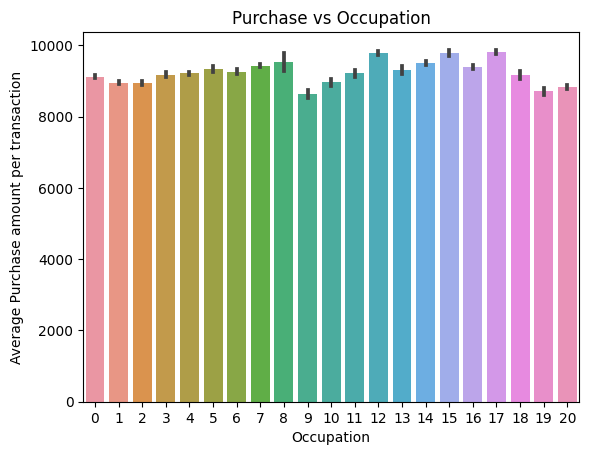

In [ ]:
sns.barplot(data=df,x='Occupation',y='Purchase',estimator='mean')
plt.title('Purchase vs Occupation')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

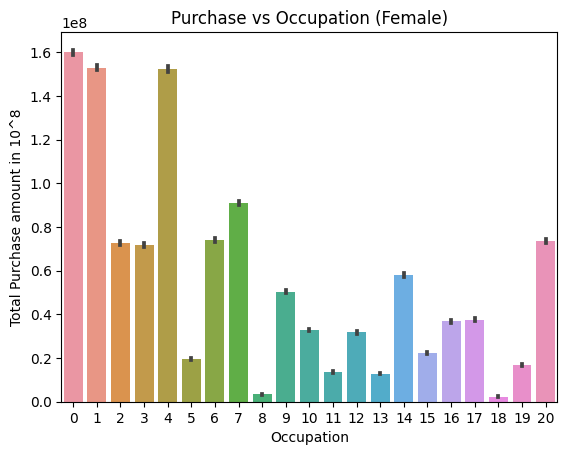

In [ ]:
sns.barplot(data=df[df['Gender']=='F'],x='Occupation',y='Purchase',estimator='sum')
plt.title('Purchase vs Occupation (Female)')
plt.ylabel('Total Purchase amount in 10^8')
plt.show()

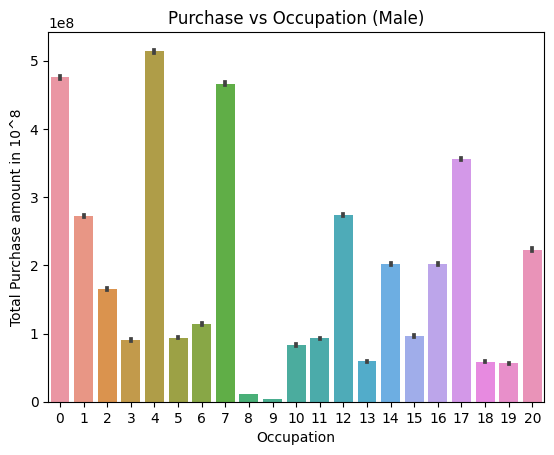

In [ ]:
sns.barplot(data=df[df['Gender']=='M'],x='Occupation',y='Purchase',estimator='sum')
plt.title('Purchase vs Occupation (Male)')
plt.ylabel('Total Purchase amount in 10^8')
plt.show()

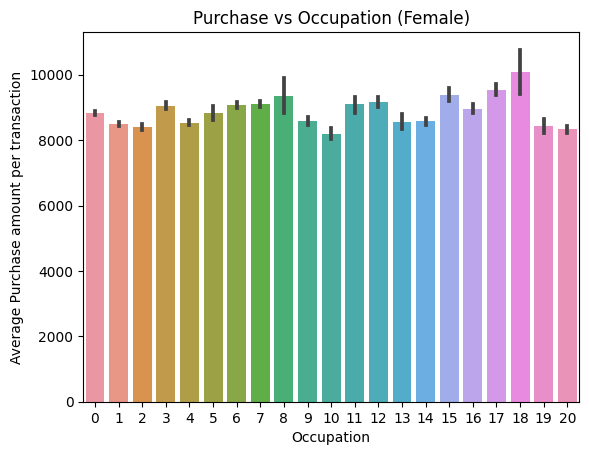

In [ ]:
sns.barplot(data=df[df['Gender']=='F'],x='Occupation',y='Purchase',estimator='mean')
plt.title('Purchase vs Occupation (Female)')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

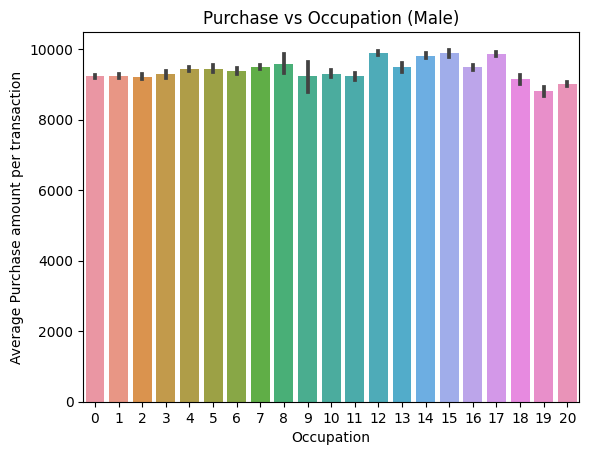

In [ ]:
sns.barplot(data=df[df['Gender']=='M'],x='Occupation',y='Purchase',estimator='mean')
plt.title('Purchase vs Occupation (Male)')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

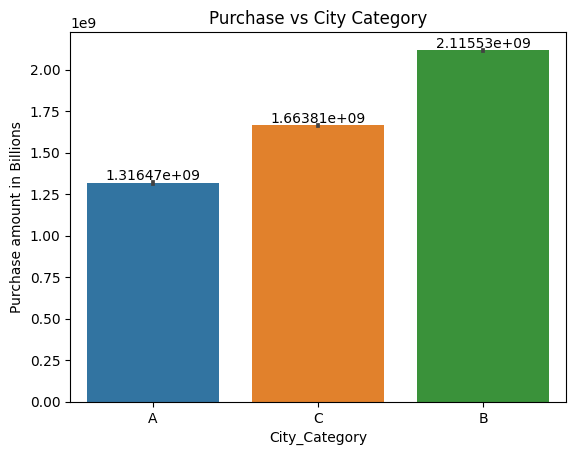

In [ ]:
label=sns.barplot(data=df,x='City_Category',y='Purchase',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Purchase vs City Category')
plt.ylabel('Purchase amount in Billions')
plt.show()

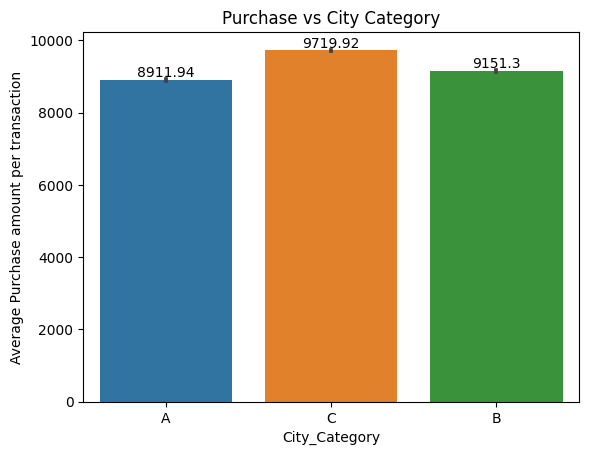

In [ ]:
label=sns.barplot(data=df,x='City_Category',y='Purchase',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Purchase vs City Category')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

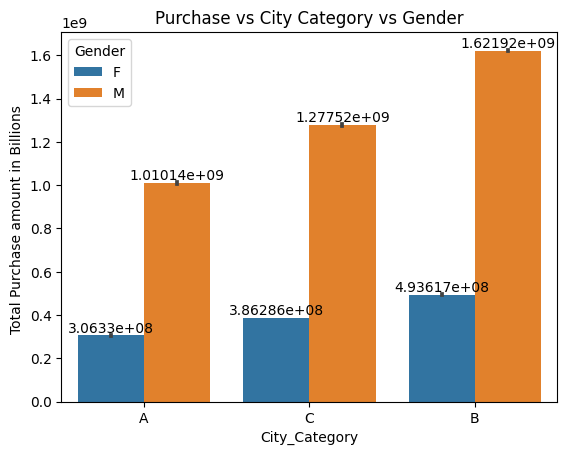

In [ ]:
label=sns.barplot(data=df,x='City_Category',y='Purchase',estimator='sum',hue='Gender')
for i in label.containers:
  label.bar_label(i)
plt.title('Purchase vs City Category vs Gender')
plt.ylabel('Total Purchase amount in Billions ')
plt.show()

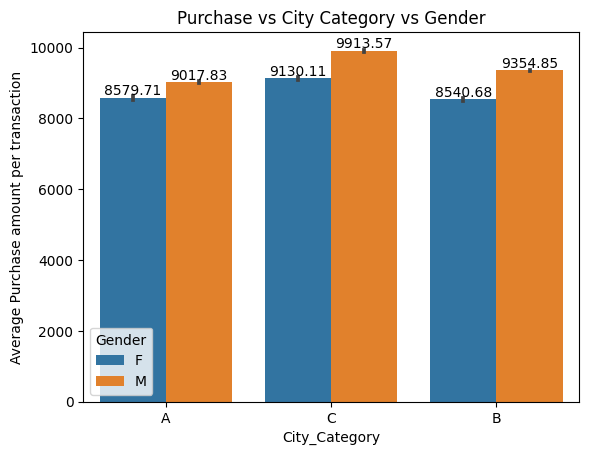

In [ ]:
label=sns.barplot(data=df,x='City_Category',y='Purchase',estimator='mean',hue='Gender')
for i in label.containers:
  label.bar_label(i)
plt.title('Purchase vs City Category vs Gender')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

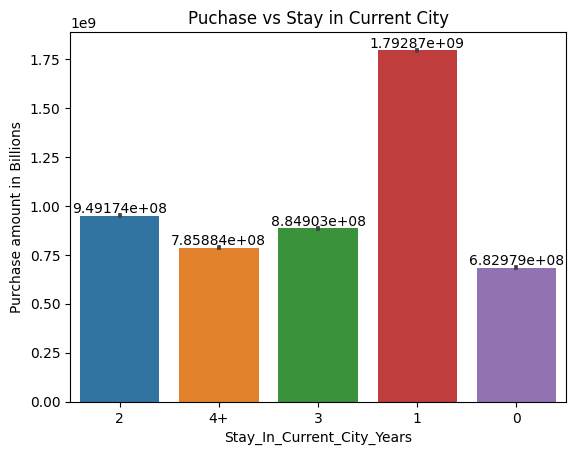

In [ ]:
label=sns.barplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',estimator='sum')
plt.title('Puchase vs Stay in Current City')
for i in label.containers:
  label.bar_label(i)
plt.ylabel('Purchase amount in Billions')
plt.show()

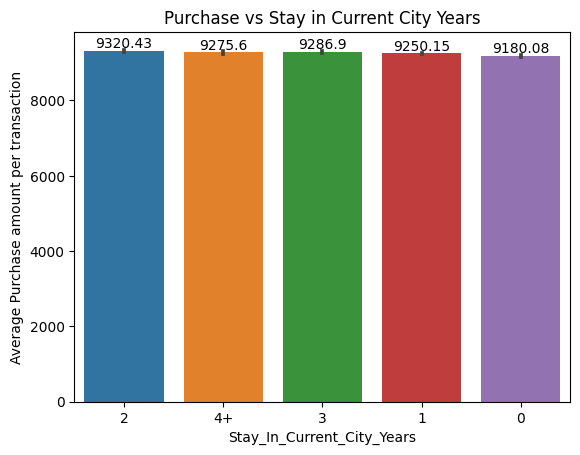

In [ ]:
label=sns.barplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',estimator='mean')
plt.title('Purchase vs Stay in Current City Years')
for i in label.containers:
  label.bar_label(i)
plt.ylabel('Average Purchase amount per transaction')
plt.show()

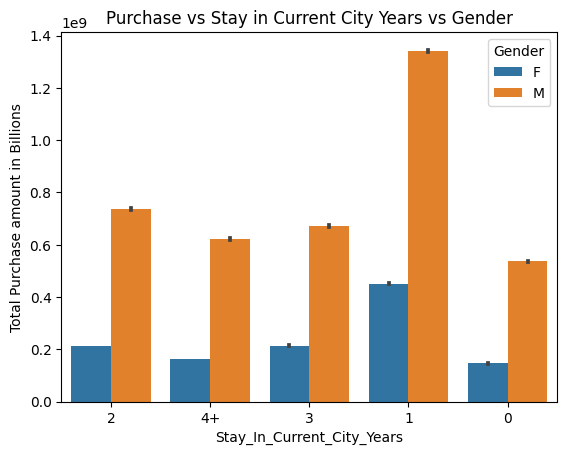

In [ ]:
sns.barplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',estimator='sum',hue='Gender')
plt.title('Purchase vs Stay in Current City Years vs Gender')
plt.ylabel('Total Purchase amount in Billions')
plt.show()

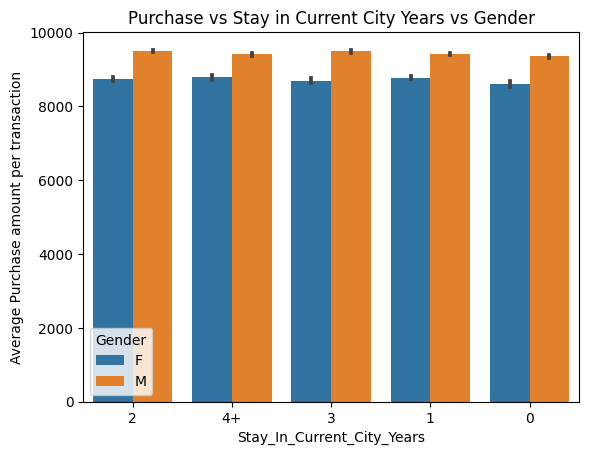

In [ ]:
sns.barplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',estimator='mean',hue='Gender')
plt.title('Purchase vs Stay in Current City Years vs Gender')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

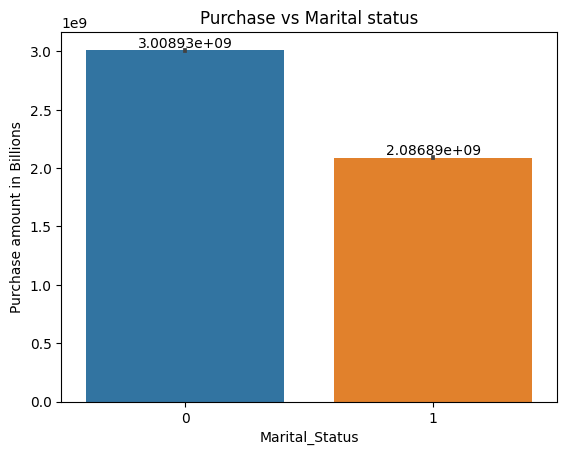

In [ ]:
label=sns.barplot(data=df,x='Marital_Status',y='Purchase',estimator='sum')
for i in label.containers:
  label.bar_label(i)
plt.title('Purchase vs Marital status')
plt.ylabel('Purchase amount in Billions')
plt.show()

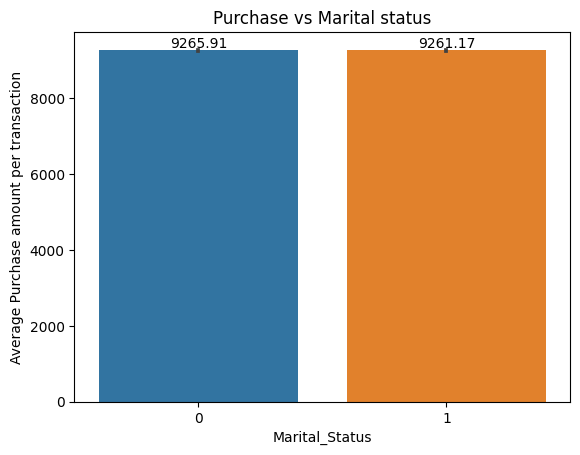

In [ ]:
label=sns.barplot(data=df,x='Marital_Status',y='Purchase',estimator='mean')
for i in label.containers:
  label.bar_label(i)
plt.title('Purchase vs Marital status')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

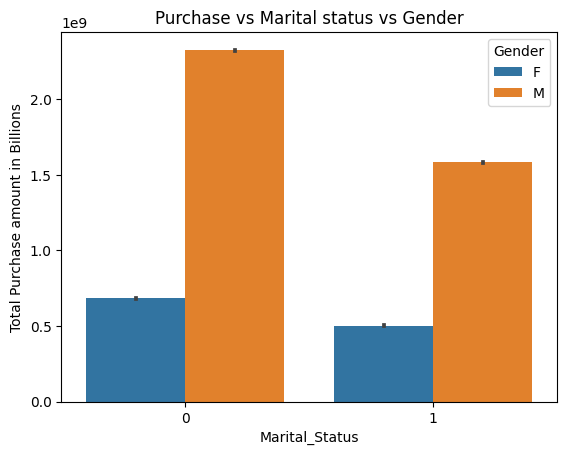

In [ ]:
sns.barplot(data=df,x='Marital_Status',y='Purchase',estimator='sum',hue='Gender')
plt.title('Purchase vs Marital status vs Gender')
plt.ylabel('Total Purchase amount in Billions')
plt.show()

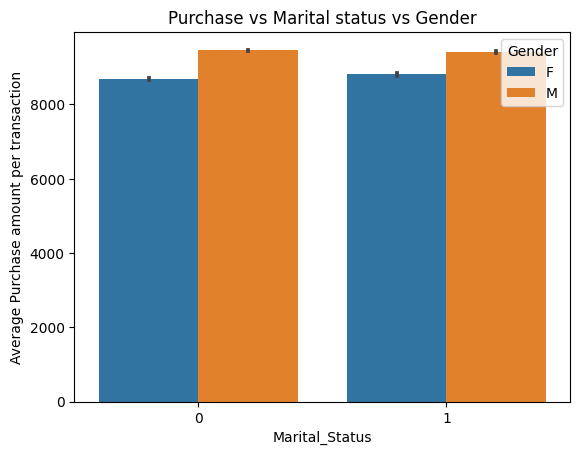

In [ ]:
sns.barplot(data=df,x='Marital_Status',y='Purchase',estimator='mean',hue='Gender')
plt.title('Purchase vs Marital status vs Gender')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

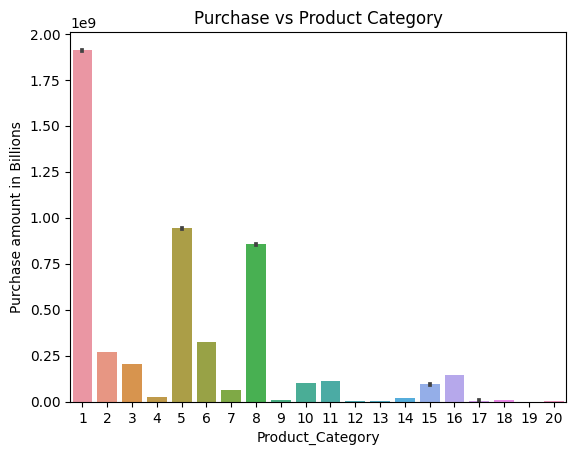

In [ ]:
sns.barplot(data=df,x='Product_Category',y='Purchase',estimator='sum')
plt.title('Purchase vs Product Category')
plt.ylabel('Purchase amount in Billions')
plt.show()

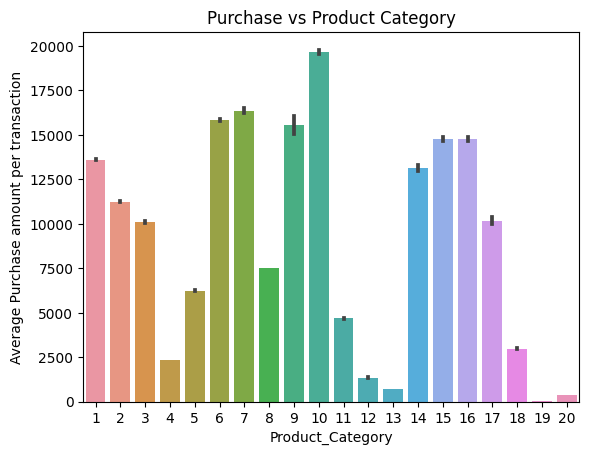

In [ ]:
sns.barplot(data=df,x='Product_Category',y='Purchase',estimator='mean')
plt.title('Purchase vs Product Category')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

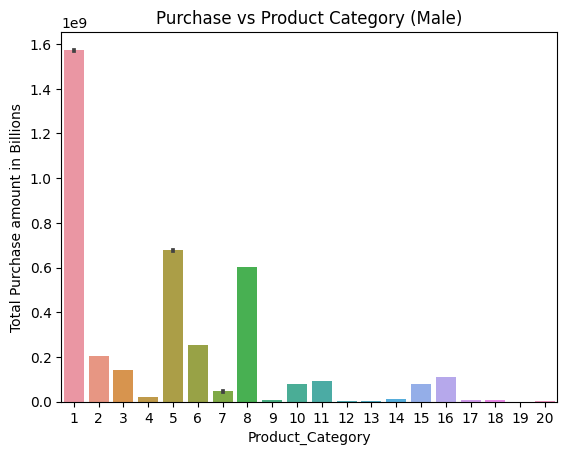

In [ ]:
sns.barplot(data=df[df['Gender']=='M'],x='Product_Category',y='Purchase',estimator='sum')
plt.title('Purchase vs Product Category (Male)')
plt.ylabel('Total Purchase amount in Billions')
plt.show()

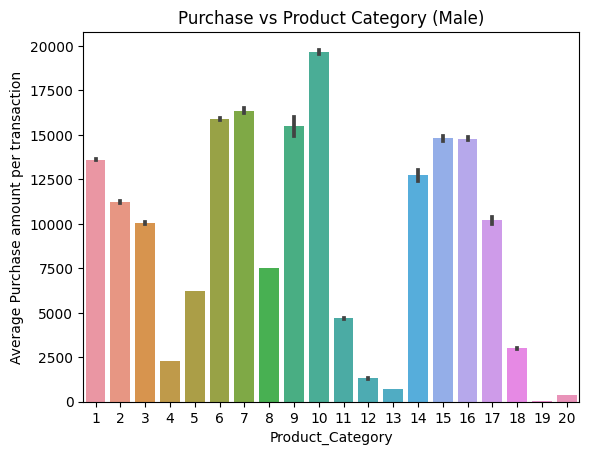

In [ ]:
sns.barplot(data=df[df['Gender']=='M'],x='Product_Category',y='Purchase',estimator='mean')
plt.title('Purchase vs Product Category (Male)')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

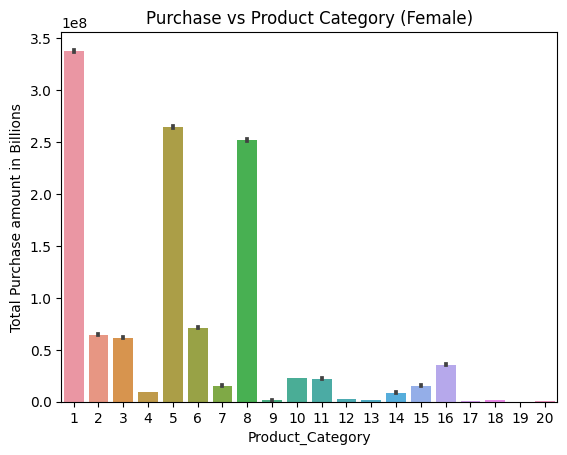

In [ ]:
sns.barplot(data=df[df['Gender']=='F'],x='Product_Category',y='Purchase',estimator='sum')
plt.title('Purchase vs Product Category (Female)')
plt.ylabel('Total Purchase amount in Billions')
plt.show()

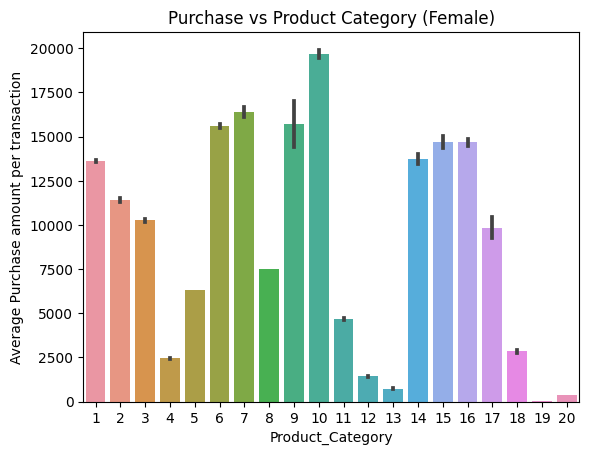

In [ ]:
sns.barplot(data=df[df['Gender']=='F'],x='Product_Category',y='Purchase',estimator='mean')
plt.title('Purchase vs Product Category (Female)')
plt.ylabel('Average Purchase amount per transaction')
plt.show()

### **Observations**

* Male customers spent about 4 billion, while female customers spent about 1 billion on Black Friday. However, the average purchase amount per transaction for male customer was slightly higher.

* Customers aged 26-35 spent about 2 billion on Black Friday. The average purchase amount per transaction for customer was somewhat similar across all age groups, but slightly higher for customers aged 51-55.

* Customers with occupations '0', '4', and '7' spent about 2 billion on Black Friday. Customers with occupations '8' contribute least to the total purchase on Black Friday. The average purchase amount per transaction was relatively uniform across different occupations.

* Female customers with occupation '0', '1', '4' spent most among female category on Black Friday Sale. Male customers with occupation '0', '4', '7' spent most and with occupation '9' spent least among Male category on Black Friday Sale.

* Female customer with occupation '18' have maximum average purchase per transaction among female category on Black Friday sale.

* Customers in city category B accounted for more than 2 billion in purchase amount on Black Friday while customers in city category A contributed least to Black Friday sale.. Though, customers in city category C had a slightly higher average purchase amount per transaction.

* Among all customers who bought products on Black Friday, customers who had been living in their current city for 1 year made the highest purchases, at about 1.75 billion. Customers who had been living in their current city for less than 1 year made the lowest purchases, at about 0.7 billion.

* Unmarried customers spent about 3 billion on Black Friday.

* Products in product categories 1, 5, and 8 accounted for the majority of purchase amount generated on Black Friday. However, the average purchase amount per transaction varied across different product categories. The average purchase amount per transaction was highest for product category 10 (close to 20,000), and lowest for product category 19.

In [ ]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

### **Central limit theorem (CLT)**

* It states that distribution of sample mean approximates the population mean as sample size gets larger, regardless of population's distribution.

* Let's consider the case using available dataset. As available dataset (~5M rows) is sample of actual dataset (100 M rows), and thus we want to infer chracterstics of population by analysing the sample dataset.


### **Gender vs Purchase**

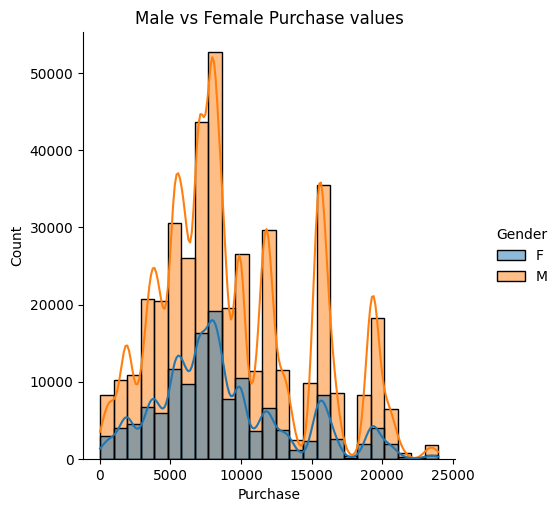

In [ ]:
sns.displot(x=df['Purchase'],hue=df['Gender'],bins=25,kde=True)
plt.title('Male vs Female Purchase values')
plt.show()

In [ ]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [ ]:
df.groupby('Gender')['Purchase'].std()

Gender
F    4767.233289
M    5092.186210
Name: Purchase, dtype: float64

In [ ]:
df.groupby(['Gender'])['Purchase'].describe().T

Gender              F             M
count   135809.000000  414259.00000
mean      8734.565765    9437.52604
std       4767.233289    5092.18621
min         12.000000      12.00000
25%       5433.000000    5863.00000
50%       7914.000000    8098.00000
75%      11400.000000   12454.00000
max      23959.000000   23961.00000

* For the dataset of 0.5M rows, it is observed that male customers spend more than female customers on Black Friday Sale. However, this is only a sample of the original dataset of 100 million rows, so we cannot be sure that this finding holds true for the entire population.

* To infer about the population, we can use bootstrapping, confidence intervals, and the Central Limit Theorem.

* **Bootstrapping** is a statistical technique that uses the available data to create new datasets. We can use bootstrapping to create a distribution of sample means, which will approximate the normal distribution of population means by virtue of the Central Limit Theorem.

* **Confidence intervals** are a statistical measure of uncertainty. We can use confidence intervals to estimate the range of values that is likely to contain the true population mean.

In [ ]:

def bootstrap_ci(sample1, sample2, sample_size, itr_size=1000, ci=90):
    """
    Performs bootstrapping to compare the means of two samples.

    Args:
        sample1: A sample of the first population.
        sample2: A sample of the second population.
        sample_size: The size of the bootstrap samples.
        itr_size: The number of bootstrap iterations.
        ci: The confidence interval level, in percent.

    Returns:
        A tuple containing the following:
            * The bootstrapped mean of the first sample.
            * The bootstrapped mean of the second sample.
            * The lower bound of the confidence interval for the first sample.
            * The upper bound of the confidence interval for the first sample.
            * The lower bound of the confidence interval for the second sample.
            * The upper bound of the confidence interval for the second sample.
    """

    # Calculate the confidence interval level as a decimal.
    ci = ci / 100

    # Create a figure to plot the kernel density estimates of the bootstrapped samples.
    plt.figure(figsize=(16, 8))

    # Calculate the bootstrapped means of the two samples.
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # Calculate the mean, standard deviation, and standard error of the mean for the bootstrapped means of the first sample.
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)
    # print('sigma1',sigma1)
    # print('sem1',sem1)
    # print('se1',sigma1/np.sqrt(sample_size))

    # Calculate the lower and upper bounds of the confidence interval for the first sample.
    lower_limit_1 = norm.ppf((1 - ci) / 2) * sigma1 + mean1
    # lower_limit_1 = norm.ppf((1 - ci) / 2) * sem1 + mean1
    upper_limit_1 = norm.ppf(ci + (1 - ci) / 2) * sigma1 + mean1
    # upper_limit_1 = norm.ppf(ci + (1 - ci) / 2) * sem1 + mean1

    # Calculate the mean, standard deviation, and standard error of the mean for the bootstrapped means of the second sample.
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)
    # print('sigma2',sigma2,'sem2',sem2)
    # print('sigma2',sigma2)
    # print('sem2',sem2)
    # print('se2',sigma2/np.sqrt(sample_size))

    # Calculate the lower and upper bounds of the confidence interval for the second sample.
    lower_limit_2 = norm.ppf((1 - ci) / 2) * sigma2 + mean2
    # lower_limit_2 = norm.ppf((1 - ci) / 2) * sem2 + mean2
    upper_limit_2 = norm.ppf(ci + (1 - ci) / 2) * sigma2 + mean2
    # upper_limit_2 = norm.ppf(ci + (1 - ci) / 2) * sem2 + mean2

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    # Set the title of the figure.
    plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)},Male SME: {np.round(sem1,2)}, Female Avg:{np.round(mean2, 2)},Female SME: {np.round(sem2,2)},")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')

    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)


In [ ]:
df_male=df[df['Gender']=='M']
df_female=df[df['Gender']=='F']

Let's take 1000 random samples of size=100,1000,10000,50000,100000 and plot the mean of those samples with 90% confidence.

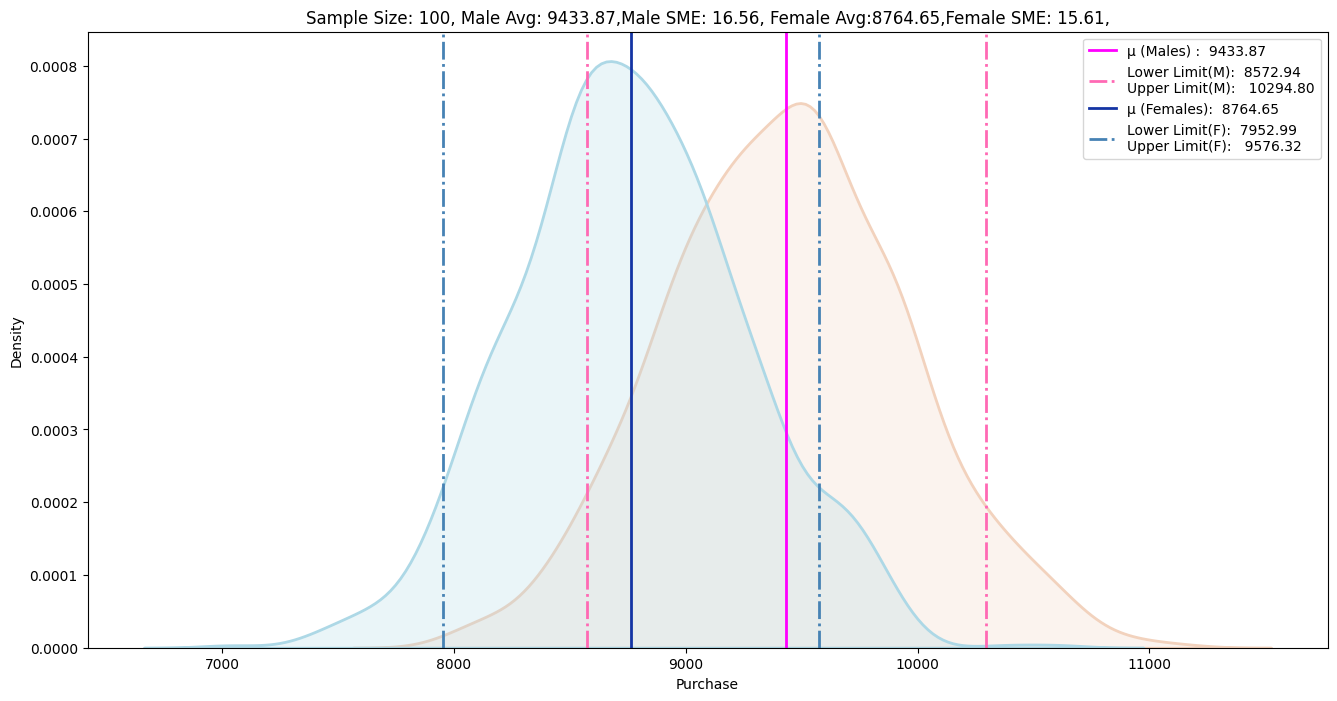

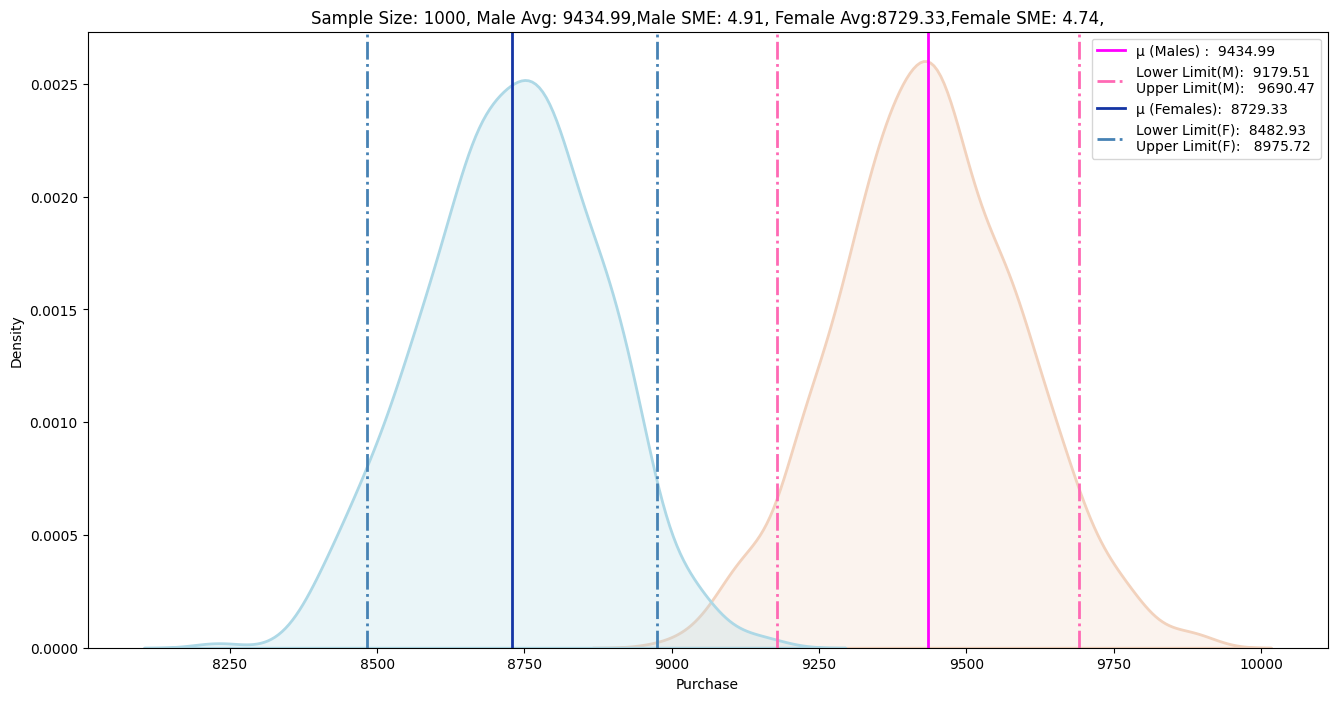

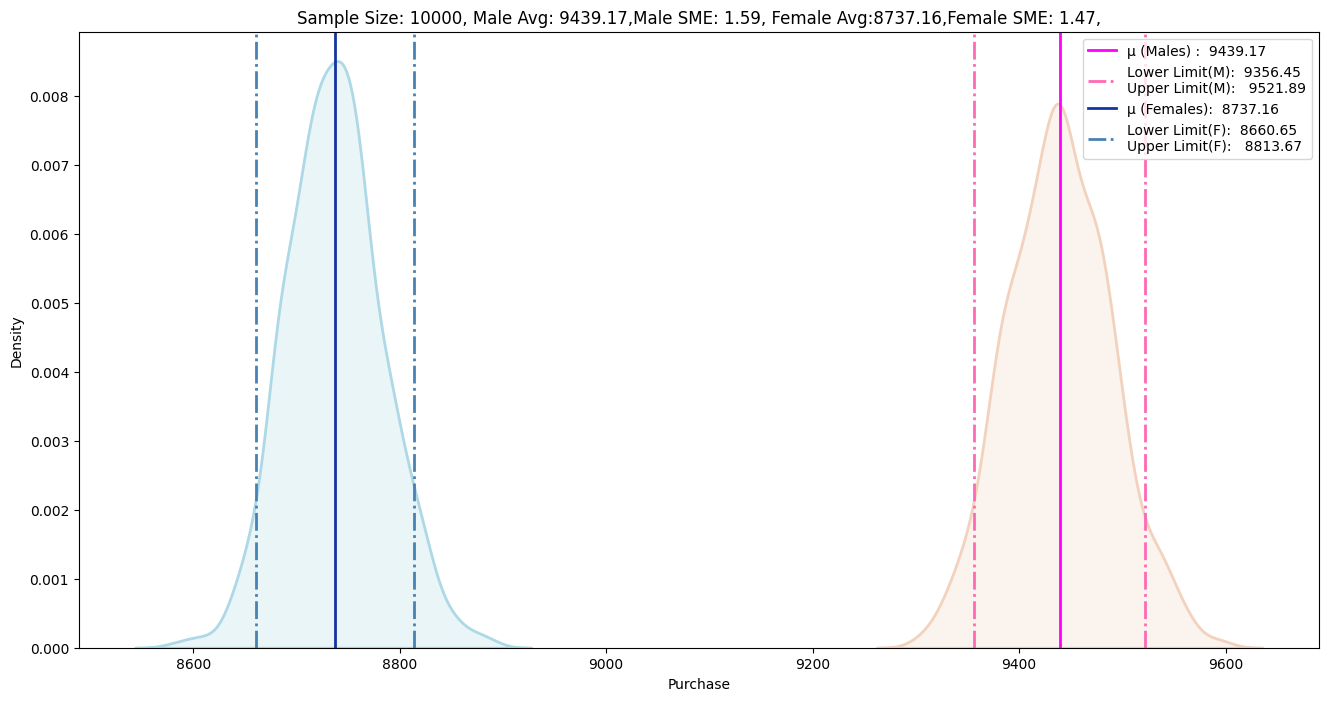

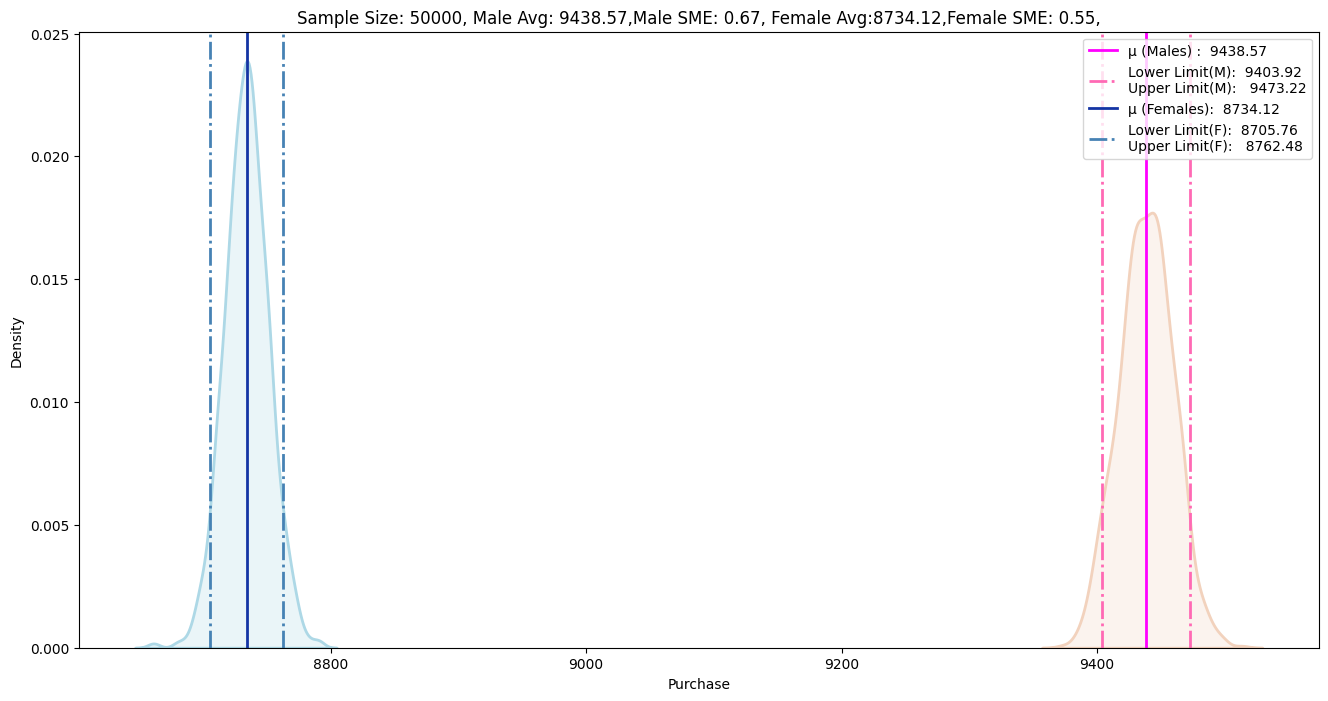

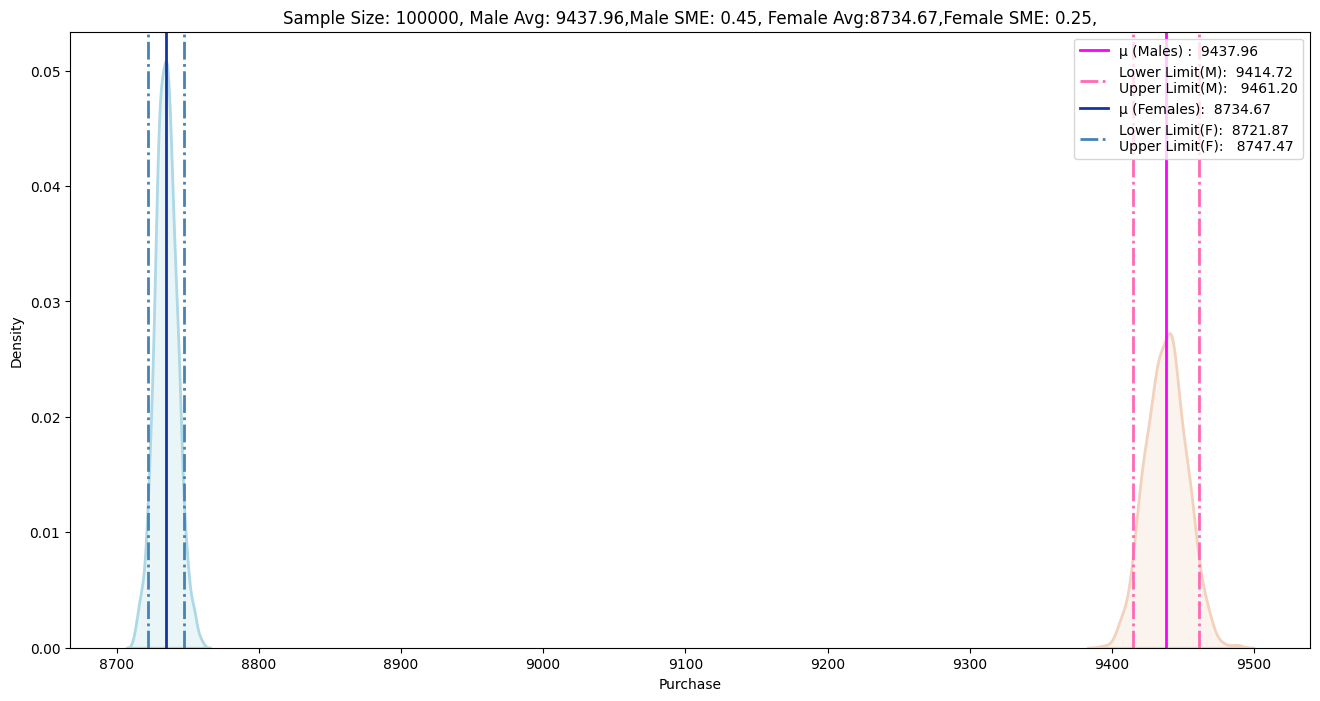

In [ ]:
sample_sizes = [100, 1000, 10000, 50000, 100000]
ci = 90
itr_size = 1000

history = pd.DataFrame(columns = ['Gender','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap_ci(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    history = history.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    history = history.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}, ignore_index = True)

In [ ]:
history[history['Confidence Interval']==90]

Gender Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0      M         100      8572.94     10294.80      9433.87   
1      F         100      7952.99      9576.32      8764.65   
2      M        1000      9179.51      9690.47      9434.99   
3      F        1000      8482.93      8975.72      8729.33   
4      M       10000      9356.45      9521.89      9439.17   
5      F       10000      8660.65      8813.67      8737.16   
6      M       50000      9403.92      9473.22      9438.57   
7      F       50000      8705.76      8762.48      8734.12   
8      M      100000      9414.72      9461.20      9437.96   
9      F      100000      8721.87      8747.47      8734.67   

  Confidence Interval      Interval Range    Range  
0                  90  [8572.94, 10294.8]  1721.86  
1                  90  [7952.99, 9576.32]  1623.33  
2                  90  [9179.51, 9690.47]   510.96  
3                  90  [8482.93, 8975.72]   492.79  
4                  90  [9356.45, 9521.89]   165.44  
5                  90  [8660.65, 8813.67]   153.02  
6                  90  [9403.92, 9473.22]    69.30  
7                  90  [8705.76, 8762.48]    56.72  
8                  90   [9414.72, 9461.2]    46.48  
9                  90  [8721.87, 8747.47]    25.60

**Observations:**

1000 random sample means of different sample sizes were taken, with Confidence of 90% -

* Sample means follows Gaussian Distribution (Central Limit theorem)

* When sample size= 100, female and male purchase per transactions overlaps. We cant conclude whether Male or Female spents more on Black friday Sale with 90% confidence

* When sample size= 1000, female and male purchase per transactions overlaps.We cant conclude whether Male or Female spents more on Black friday Sale with 90% confidence.

* When sample size= 10000, 50000, 100000, female and male purchase per transactions get seperated and becomes distinct.This suggests that as the sample size increases, the study results become more reliable.

* As we have increased the sample size, distribution becomes narrower, and sample mean becomes closer to the population mean.This suggests that with a large enough sample size, we can be more confident that the sample mean is representative of the population mean.

* Thus, we could conclude that **Male spends more than female on Black friday sale, with confidence of 90%**, when sample size is 10000 or more and 1000 random sample means taken from the population.

**Inference:**

* With 90% confidence we can say that Male's average purchase per transaction lies in range of [9413.74, 9460.59].

* With 90% confidence we can say that Female's average purchase per transaction lies in range of [8721.64, 8747.45]





Let's take 1000 random samples of size=100,1000,10000,50000,100000 and plot the mean of those samples with 95% confidence.

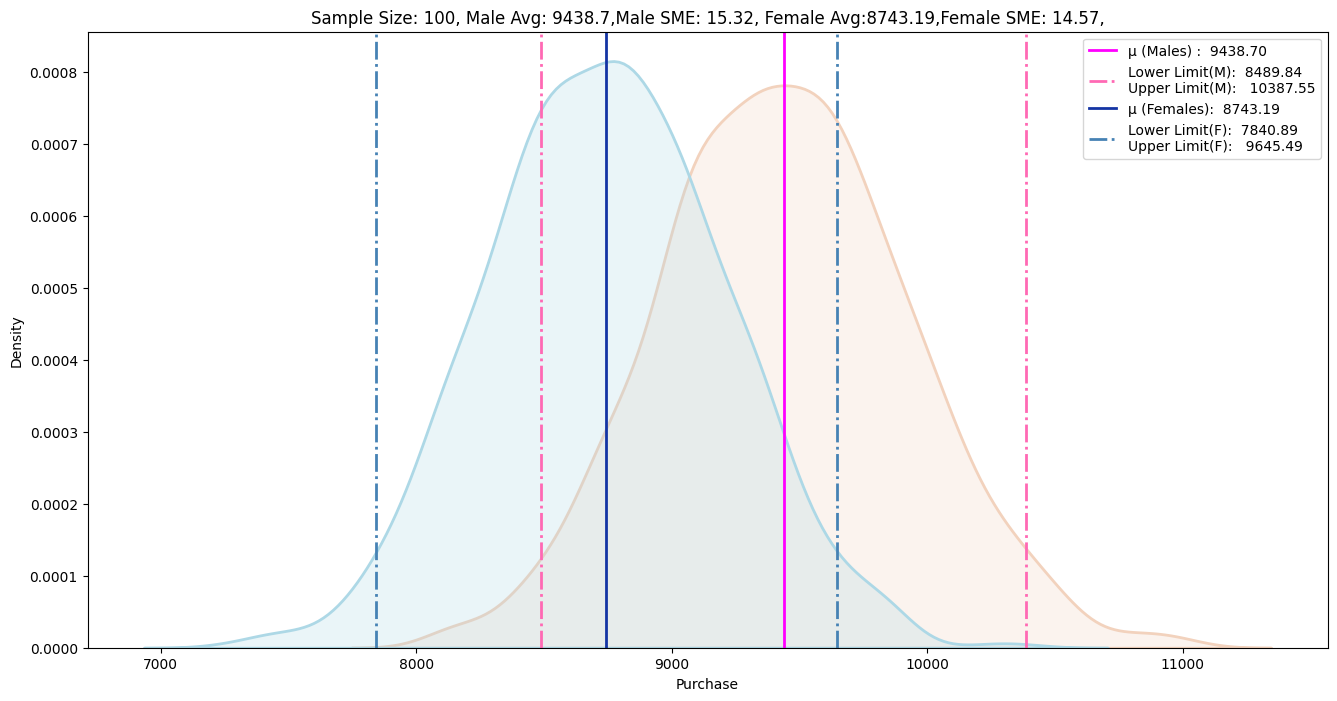

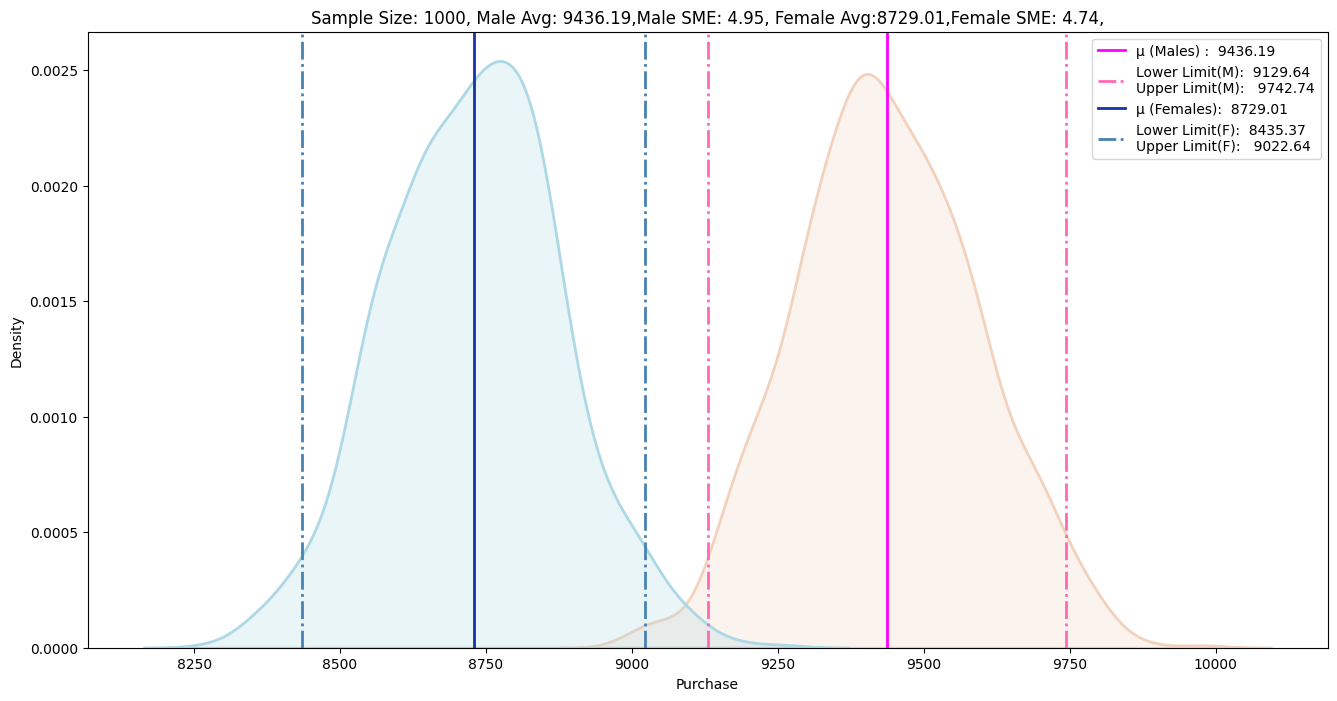

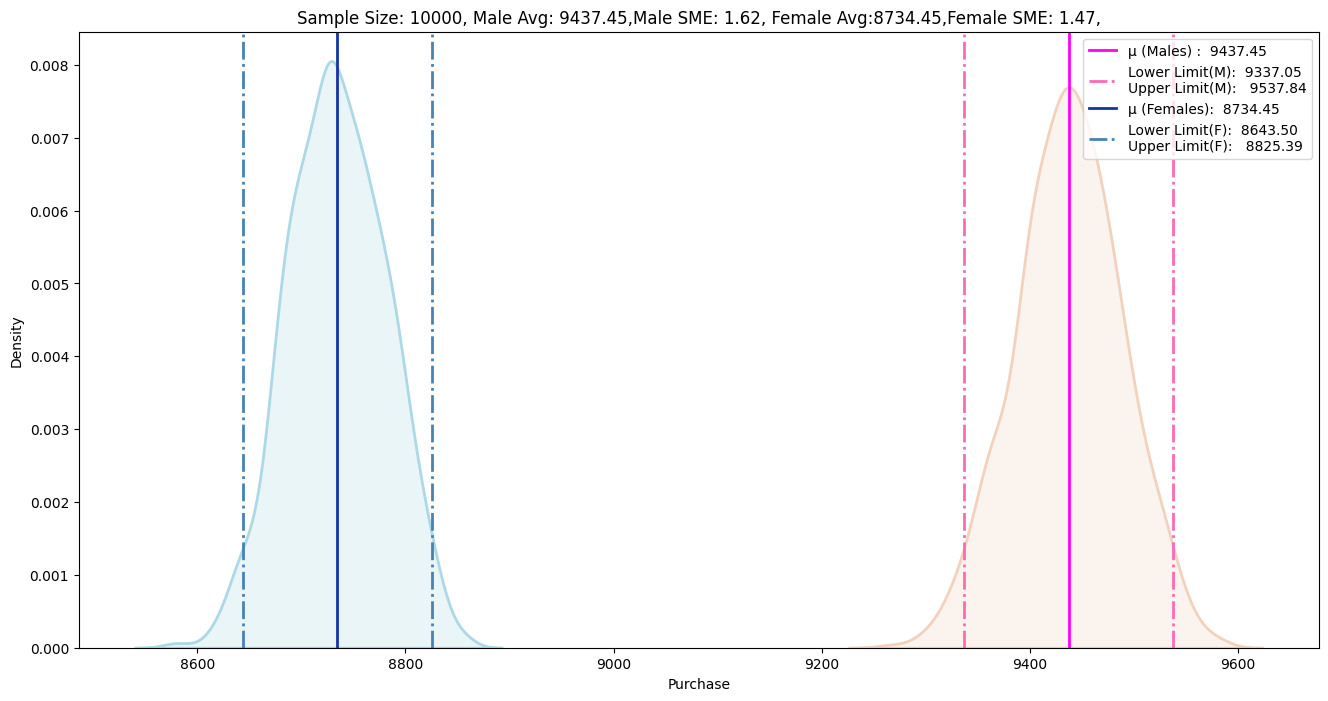

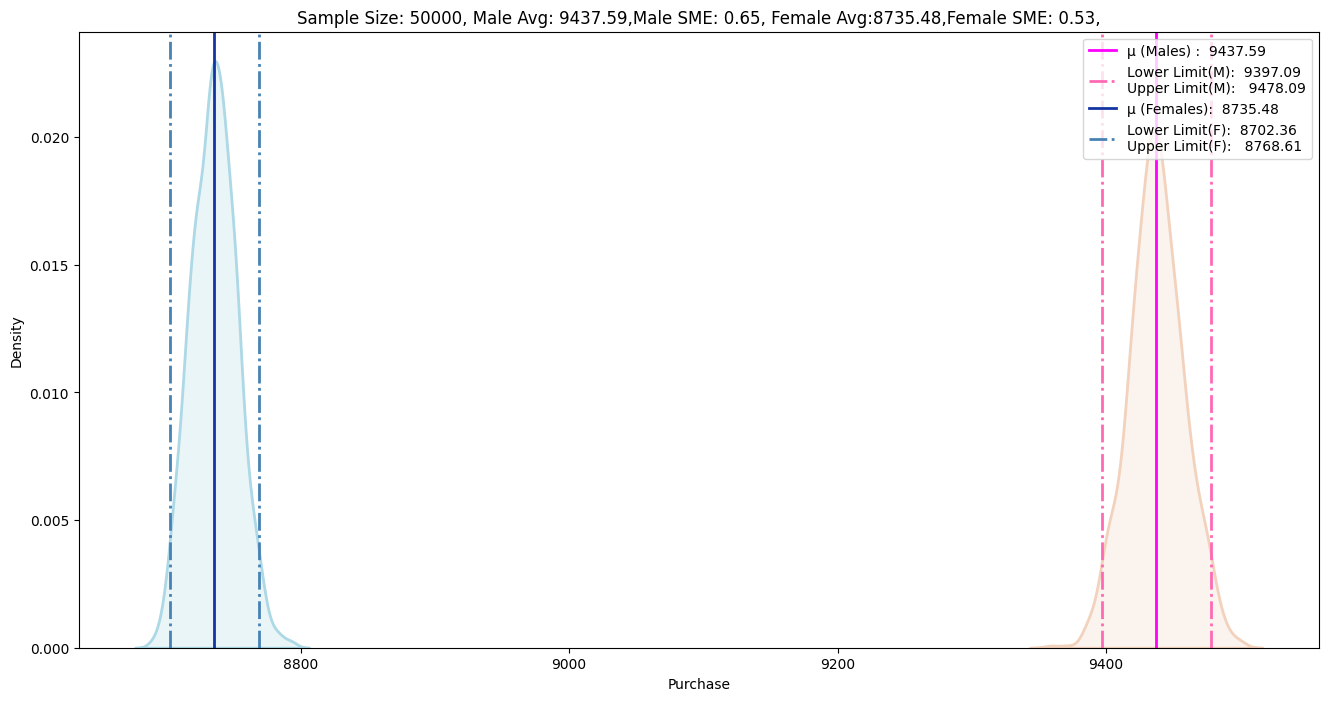

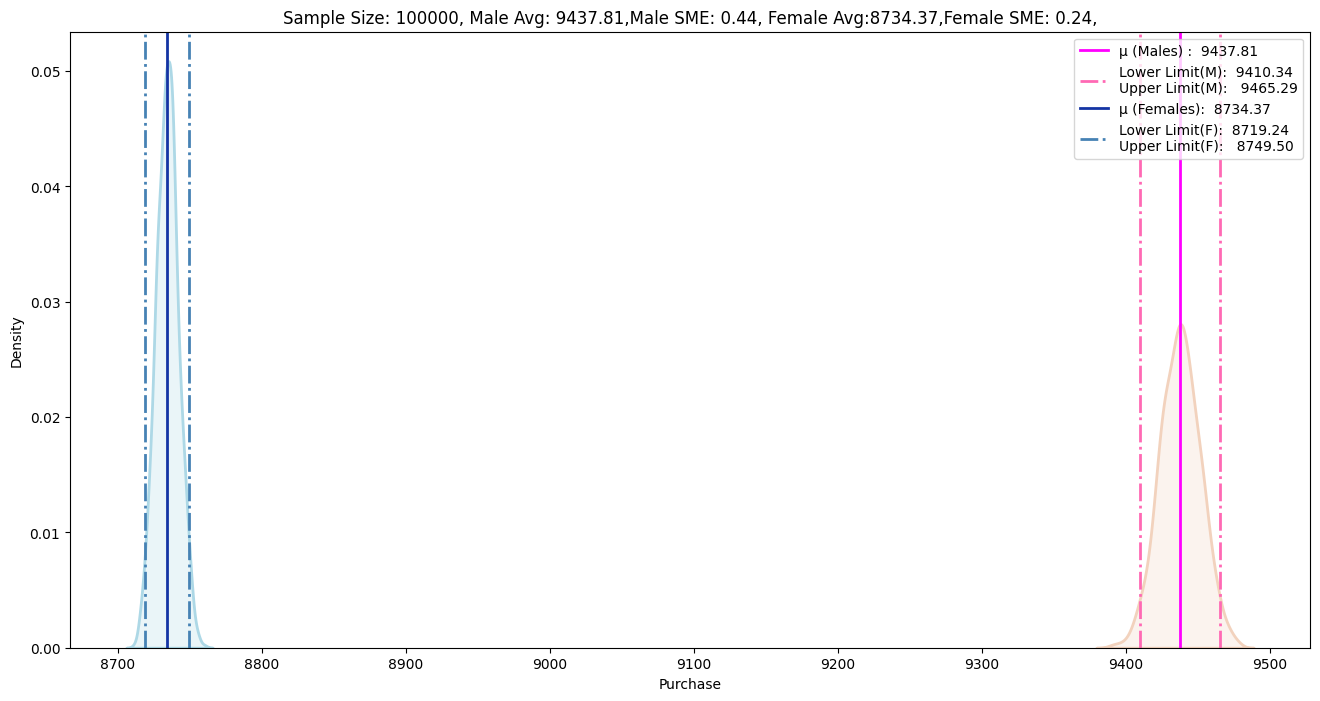

In [ ]:
sample_sizes = [100, 1000, 10000, 50000, 100000]
ci = 95
itr_size = 1000

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap_ci(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    history = history.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    history = history.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}, ignore_index = True)

In [ ]:
history[history['Confidence Interval']==95]

Gender Sample Size  Lower Limit  Upper Limit  Sample Mean  \
10      M         100      8489.84     10387.55      9438.70   
11      F         100      7840.89      9645.49      8743.19   
12      M        1000      9129.64      9742.74      9436.19   
13      F        1000      8435.37      9022.64      8729.01   
14      M       10000      9337.05      9537.84      9437.45   
15      F       10000      8643.50      8825.39      8734.45   
16      M       50000      9397.09      9478.09      9437.59   
17      F       50000      8702.36      8768.61      8735.48   
18      M      100000      9410.34      9465.29      9437.81   
19      F      100000      8719.24      8749.50      8734.37   

   Confidence Interval       Interval Range    Range  
10                  95  [8489.84, 10387.55]  1897.71  
11                  95   [7840.89, 9645.49]  1804.60  
12                  95   [9129.64, 9742.74]   613.10  
13                  95   [8435.37, 9022.64]   587.27  
14                  95   [9337.05, 9537.84]   200.79  
15                  95    [8643.5, 8825.39]   181.89  
16                  95   [9397.09, 9478.09]    81.00  
17                  95   [8702.36, 8768.61]    66.25  
18                  95   [9410.34, 9465.29]    54.95  
19                  95    [8719.24, 8749.5]    30.26

**Observations:**

1000 random sample means of different sample sizes were taken, with Confidence of 95% -

* Sample means follows Gaussian Distribution (Central Limit theorem)

* When sample size= 100, female and male purchase per transactions overlaps. We cant conclude whether Male or Female spents more on Black friday Sale with 95% confidence

* When sample size= 1000, female and male purchase per transactions overlaps.We cant conclude whether Male or Female spents more on Black friday Sale with 95% confidence.

* When sample size= 10000, 50000, 100000, female and male purchase per transactions get seperated and becomes distinct.This suggests that as the sample size increases, the study results become more reliable.

* As we have increased the sample size, distribution becomes narrower, and sample mean becomes closer to the population mean.This suggests that with a large enough sample size, we can be more confident that the sample mean is representative of the population mean.

* Thus, we could conclude that **Male spends more than female on Black friday sale, with confidence of 95%**, when sample size is 10000 or more and 1000 random sample means taken from the population.

**Inference:**

* With 95% confidence we can say that Male's average purchase per transaction lies in range of [9409.86, 9466.27]	.

* With 95% confidence we can say that Female's average purchase per transaction lies in range of [8719.9, 8749.37]





Let's take 1000 random samples of size=100,1000,10000,50000,100000 and plot the mean of those samples with 99% confidence.

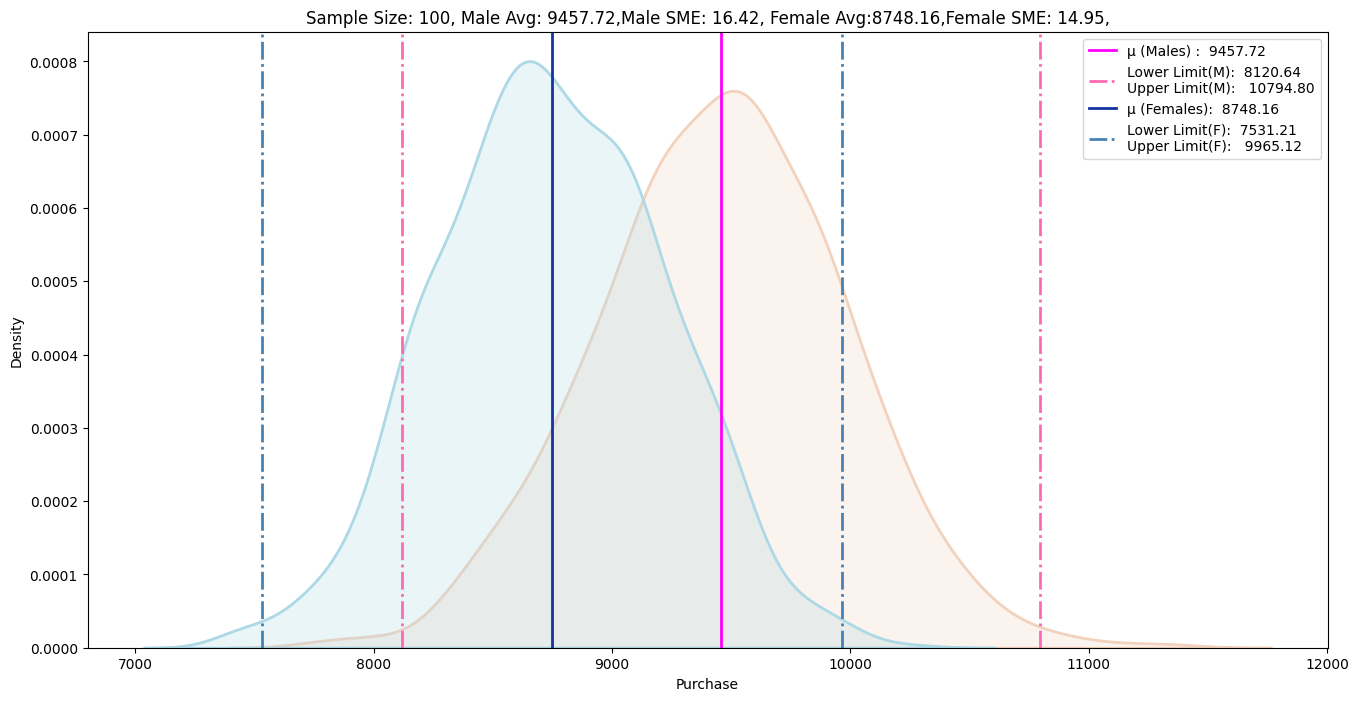

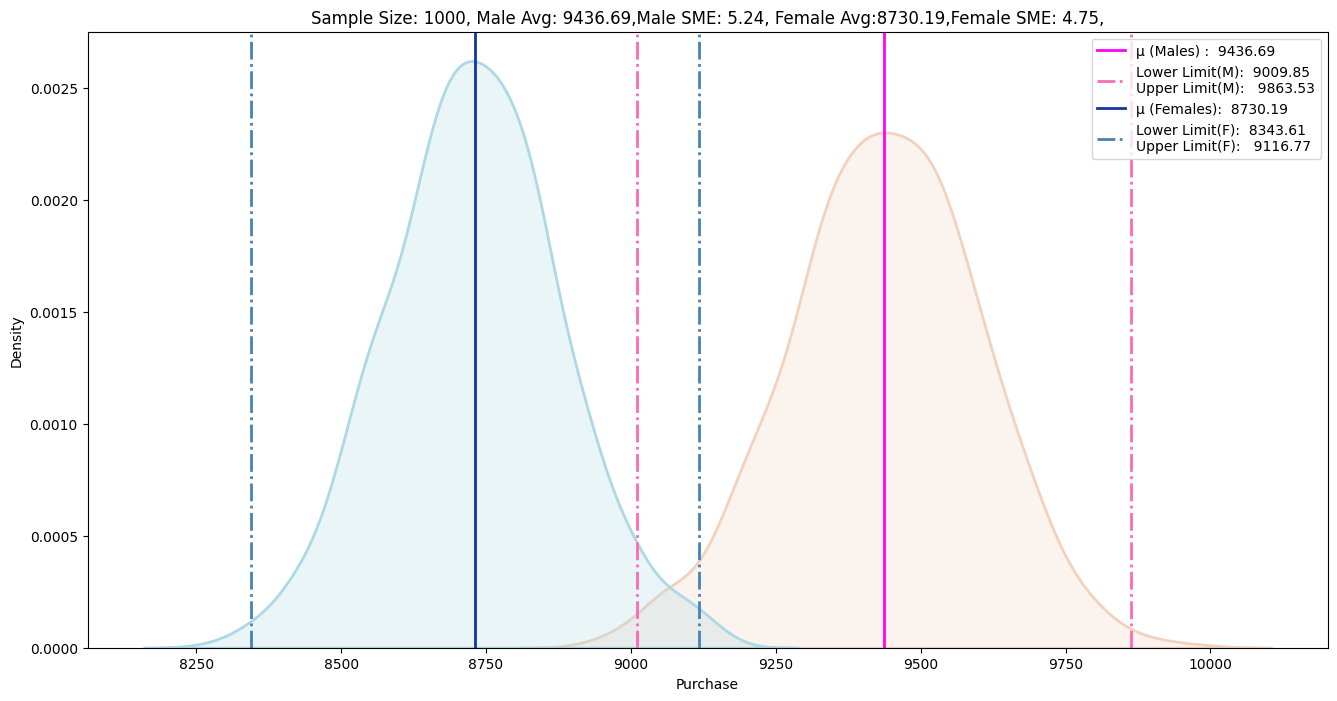

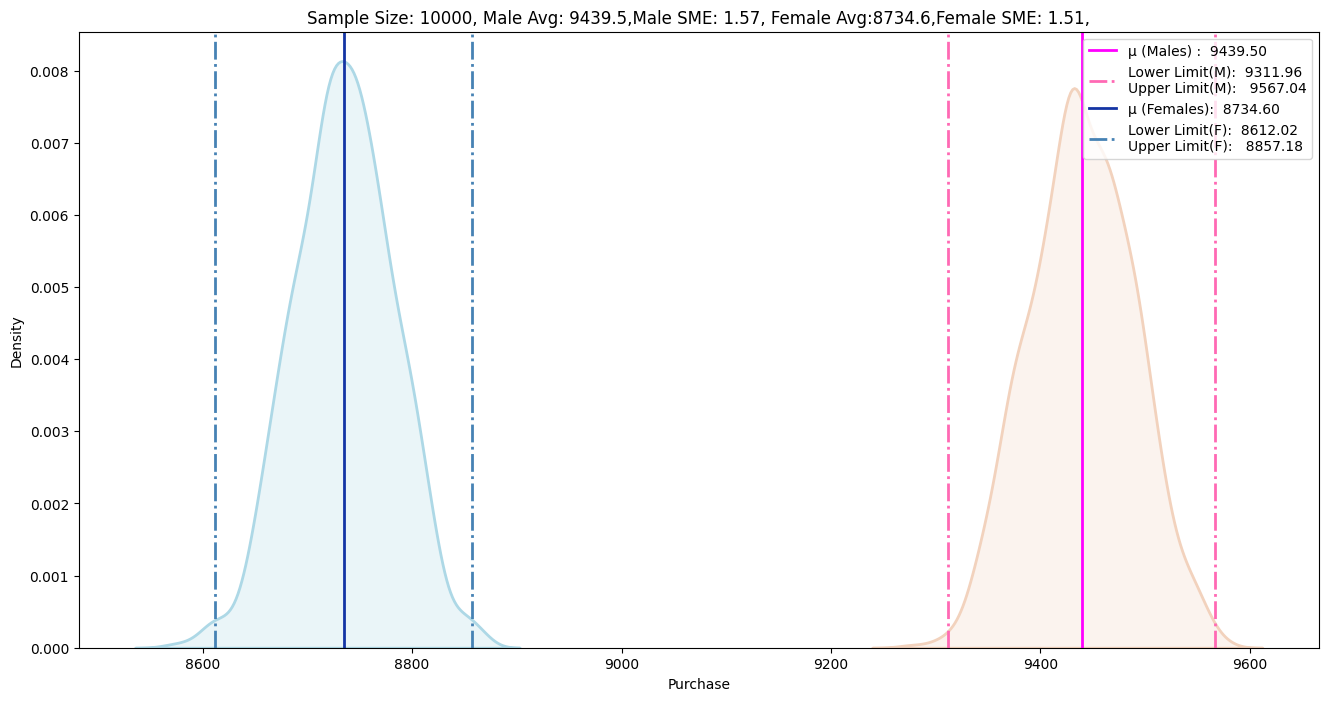

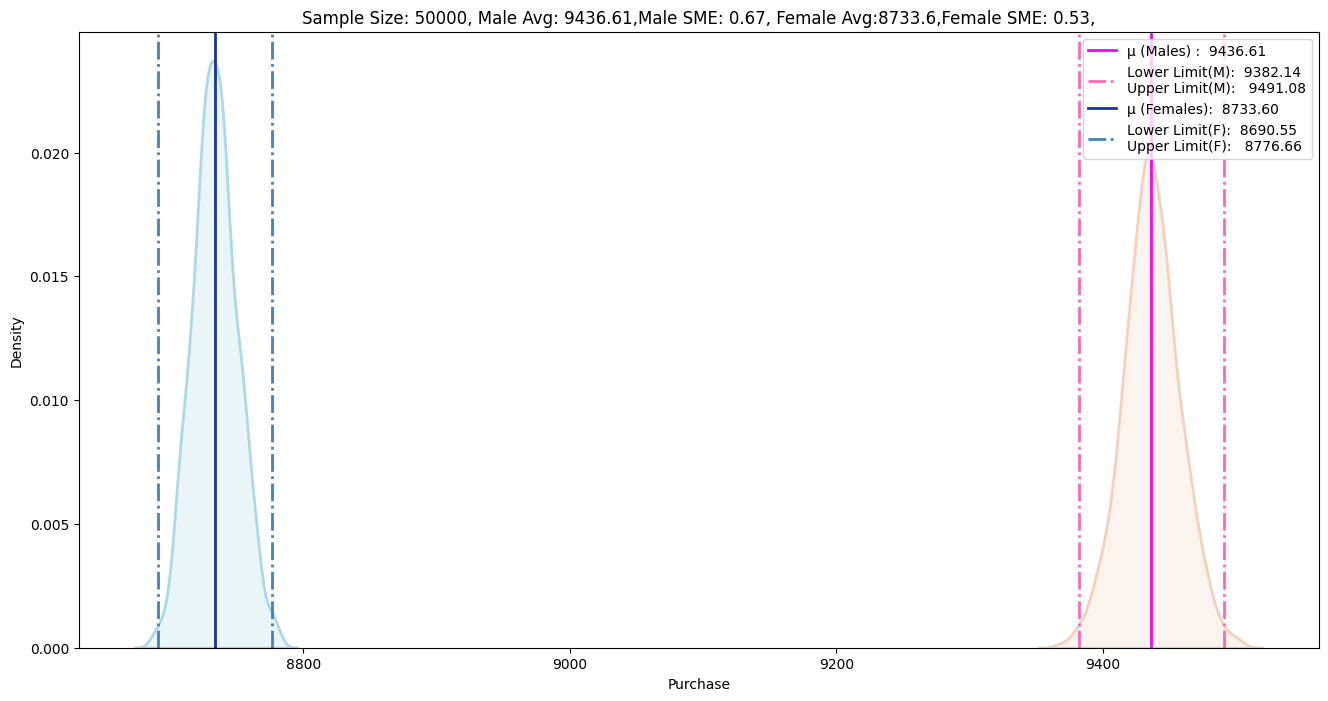

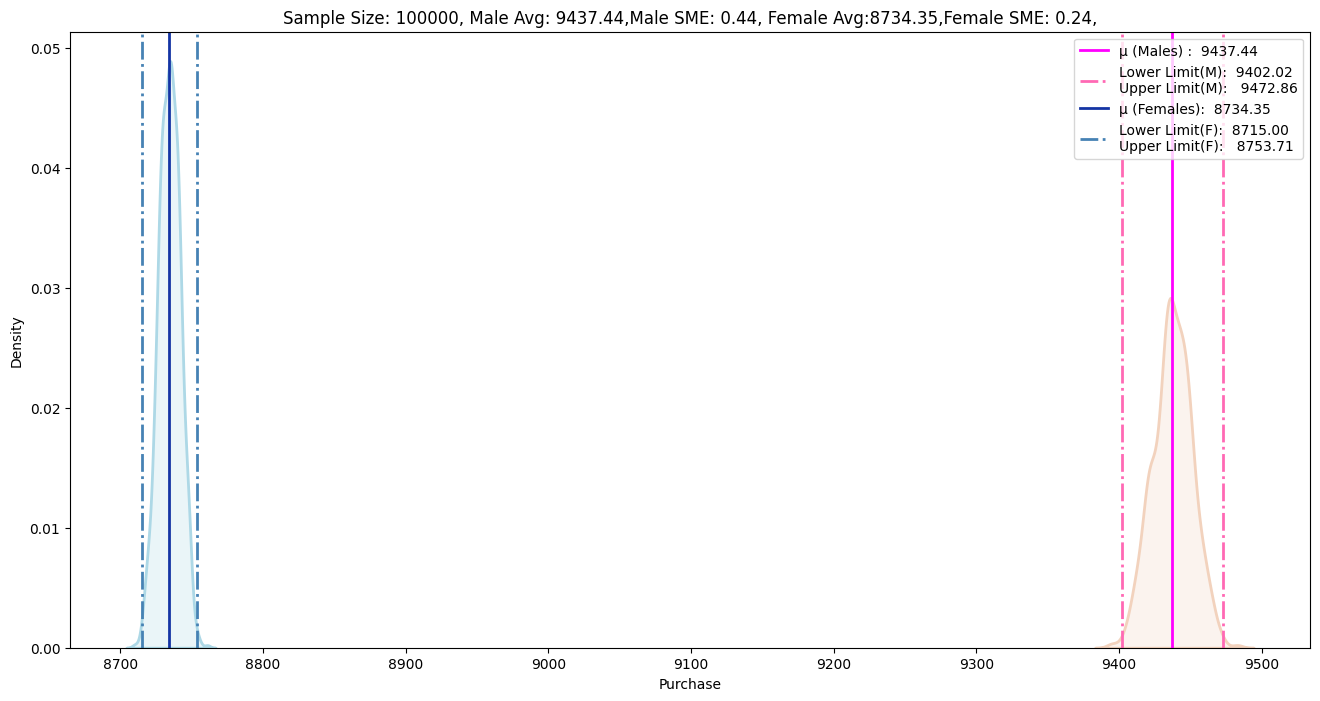

In [ ]:
sample_sizes = [100, 1000, 10000, 50000, 100000]
ci = 99
itr_size = 1000

for i in sample_sizes:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrap_ci(df_male['Purchase'],df_female['Purchase'],i,itr_size,ci)

    history = history.append({'Gender':'M','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    history = history.append({'Gender':'F','Sample Size':i,'Lower Limit':ll_f,'Upper Limit':ul_f,'Sample Mean':f_avg,'Confidence Interval':ci,'Interval Range':[ll_f,ul_f],'Range': ul_f-ll_f}, ignore_index = True)

In [ ]:
history[history['Confidence Interval']==99]

Gender Sample Size  Lower Limit  Upper Limit  Sample Mean  \
20      M         100      8120.64     10794.80      9457.72   
21      F         100      7531.21      9965.12      8748.16   
22      M        1000      9009.85      9863.53      9436.69   
23      F        1000      8343.61      9116.77      8730.19   
24      M       10000      9311.96      9567.04      9439.50   
25      F       10000      8612.02      8857.18      8734.60   
26      M       50000      9382.14      9491.08      9436.61   
27      F       50000      8690.55      8776.66      8733.60   
28      M      100000      9402.02      9472.86      9437.44   
29      F      100000      8715.00      8753.71      8734.35   

   Confidence Interval      Interval Range    Range  
20                  99  [8120.64, 10794.8]  2674.16  
21                  99  [7531.21, 9965.12]  2433.91  
22                  99  [9009.85, 9863.53]   853.68  
23                  99  [8343.61, 9116.77]   773.16  
24                  99  [9311.96, 9567.04]   255.08  
25                  99  [8612.02, 8857.18]   245.16  
26                  99  [9382.14, 9491.08]   108.94  
27                  99  [8690.55, 8776.66]    86.11  
28                  99  [9402.02, 9472.86]    70.84  
29                  99   [8715.0, 8753.71]    38.71

**Observations:**

1000 random sample means of different sample sizes were taken, with Confidence of 99% -

* Sample means follows Gaussian Distribution (Central Limit theorem)

* When sample size= 100, female and male purchase per transactions overlaps. We cant conclude whether Male or Female spents more on Black friday Sale with 99% confidence

* When sample size= 1000, female and male purchase per transactions overlaps.We cant conclude whether Male or Female spents more on Black friday Sale with 99% confidence.

* When sample size= 10000, 50000, 100000, female and male purchase per transactions get seperated and becomes distinct.This suggests that as the sample size increases, the study results become more reliable.

* As we have increased the sample size, distribution becomes narrower, and sample mean becomes closer to the population mean.This suggests that with a large enough sample size, we can be more confident that the sample mean is representative of the population mean.

* Thus, we could conclude that **Male spends more than female on Black friday sale, with confidence of 99%**, when sample size is 10000 or more and 1000 random sample means taken from the population.

**Inference:**

* With 99% confidence we can say that Male's average purchase per transaction lies in range of [9401.26, 9472.17]	.

* With 99% confidence we can say that Female's average purchase per transaction lies in range of [8714.47, 8754.22]	.





**Black Friday Shopping Habits: Male vs. Female**

Based on the results of the study, we can conclude with a confidence of 90%, 95% and 99% about poulation that males spend more than females on Black Friday sales and more purchase

### **Marital Status Vs Purchase**

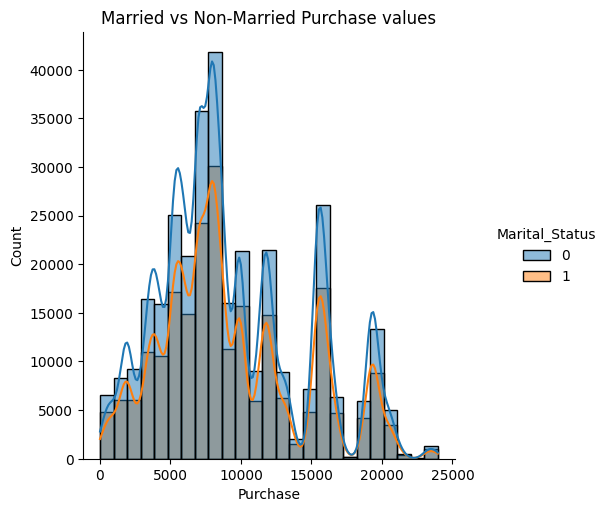

In [ ]:
# 0-Non Married
# 1-Married
sns.displot(x=df['Purchase'],hue=df['Marital_Status'],bins=25,kde=True)
plt.title('Married vs Non-Married Purchase values')
plt.show()

In [ ]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [ ]:
df.groupby('Marital_Status')['Purchase'].std()

Marital_Status
0    5027.347859
1    5016.897378
Name: Purchase, dtype: float64

In [ ]:
df.groupby('Marital_Status')['Purchase'].describe().T

Marital_Status              0              1
count           324731.000000  225337.000000
mean              9265.907619    9261.174574
std               5027.347859    5016.897378
min                 12.000000      12.000000
25%               5605.000000    5843.000000
50%               8044.000000    8051.000000
75%              12061.000000   12042.000000
max              23961.000000   23961.000000

* For the dataset of 0.5M rows, it is observed that Unmarried customers spend similar to Married customers on Black Friday Sale. However, this is only a sample of the original dataset of 100 million rows, so we cannot be sure that this finding holds true for the entire population.

* To infer about the population, we can use bootstrapping, confidence intervals, and the Central Limit Theorem.

In [ ]:
def bootstrap_m_vs_um(sample1,sample2,sample_size,itr_size=1000,ci=90):
    ci = ci/100

    plt.figure(figsize=(16,8))
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

    # For Sample1's means
    mean1 = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1 = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For Sample2's means
    mean2 = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2 = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    sns.kdeplot(data = sample1_n, color="#F2D2BD", fill = True, linewidth = 2)
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    plt.axvline(mean1, color = '#FF00FF', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    plt.axvline(lower_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = '#FF69B4', linestyle = 'dashdot', linewidth = 2)

    sns.kdeplot(data = sample2_n ,color='#ADD8E6', fill = True, linewidth = 2)
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    plt.axvline(mean2, color = '#1434A4', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))
    plt.axvline(lower_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = '#4682B4', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)}, Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}")
    plt.legend(loc = 'upper right')
    plt.xlabel('Purchase')
    plt.ylabel('Density')

    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)


In [ ]:
df_unmarried=df[df['Marital_Status']==0]
df_married=df[df['Marital_Status']==1]

Let's take 1000 random samples of size=100,1000,10000,50000,100000 and plot the mean of those samples with 90% confidence.

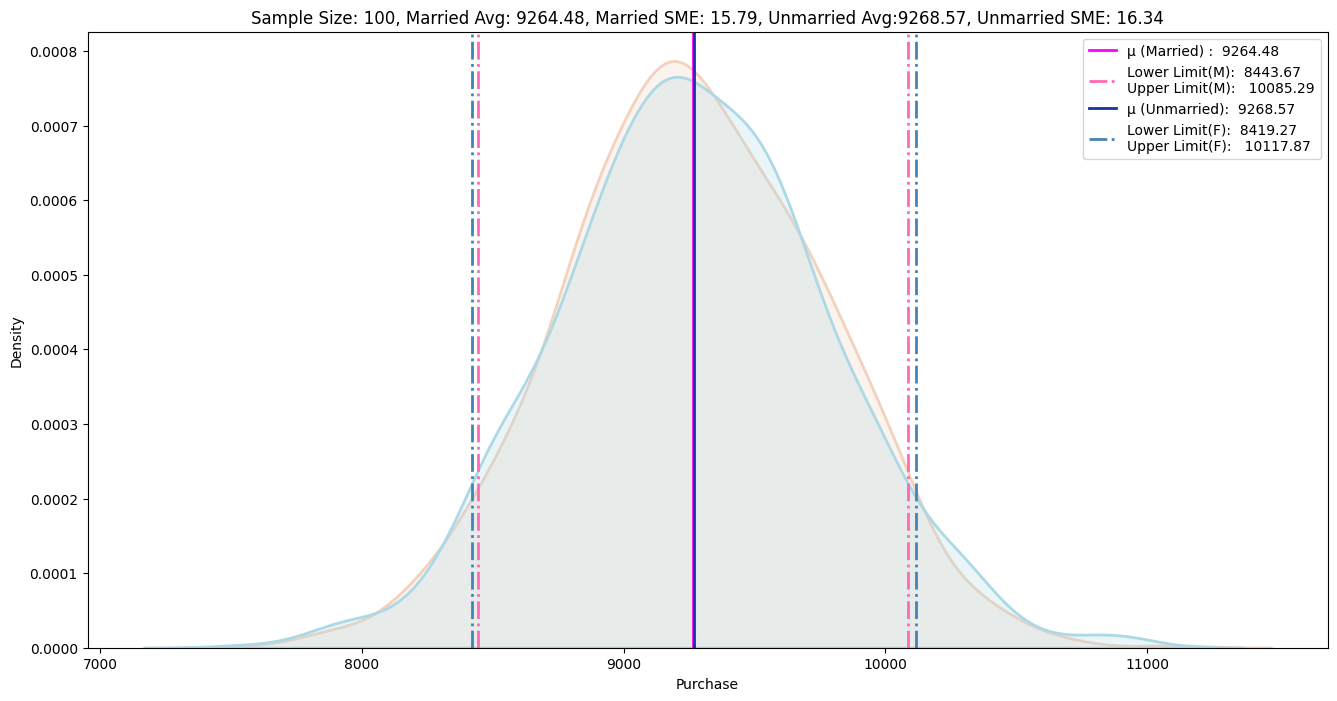

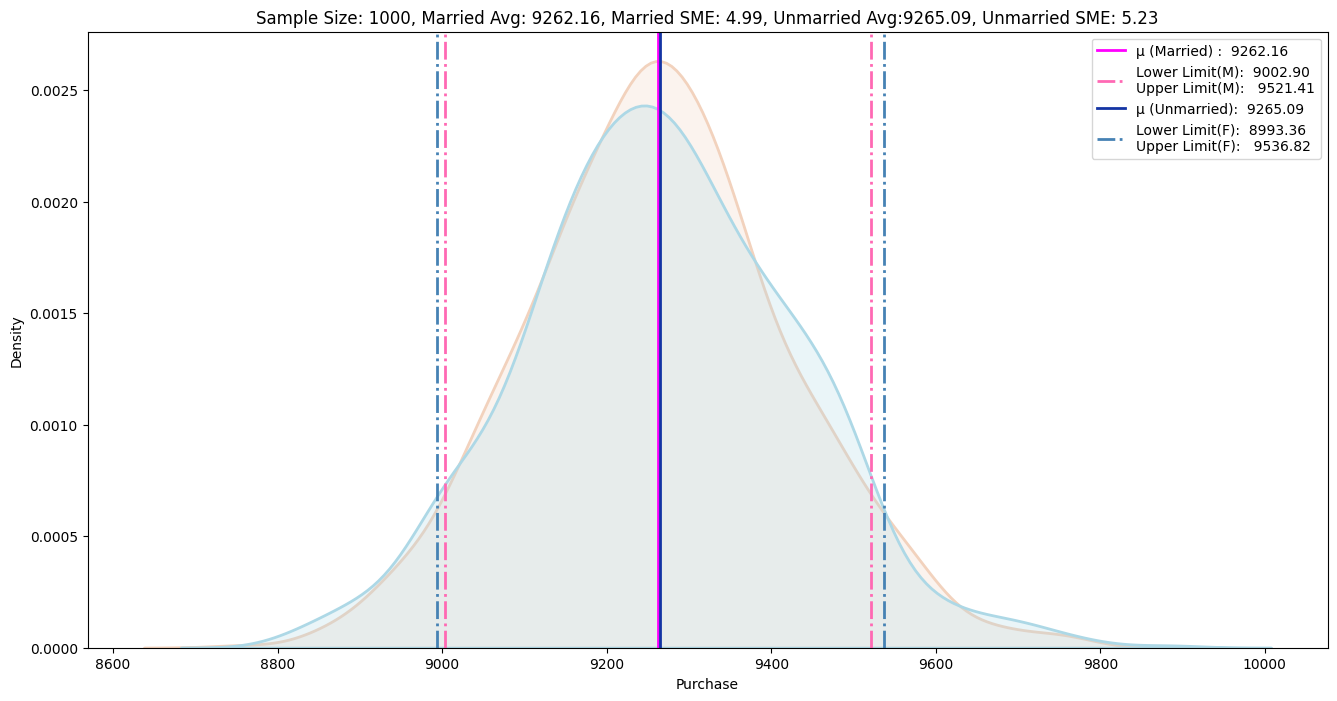

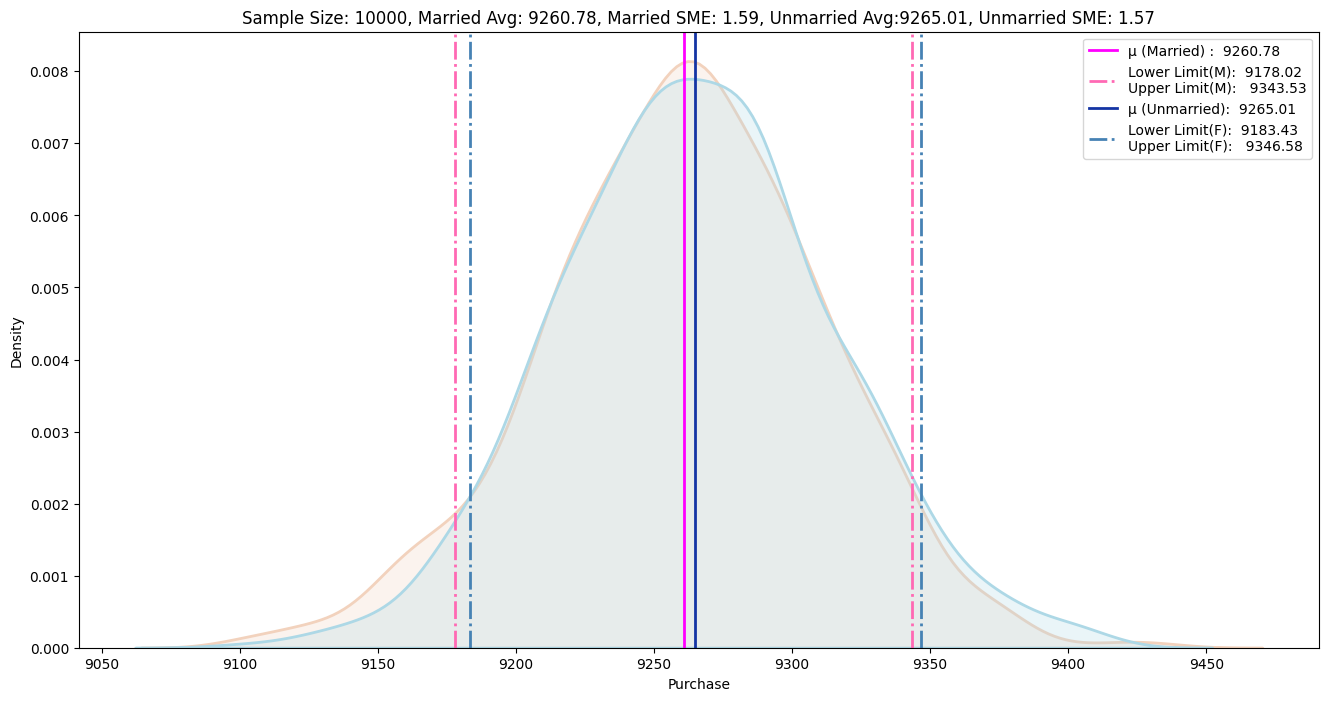

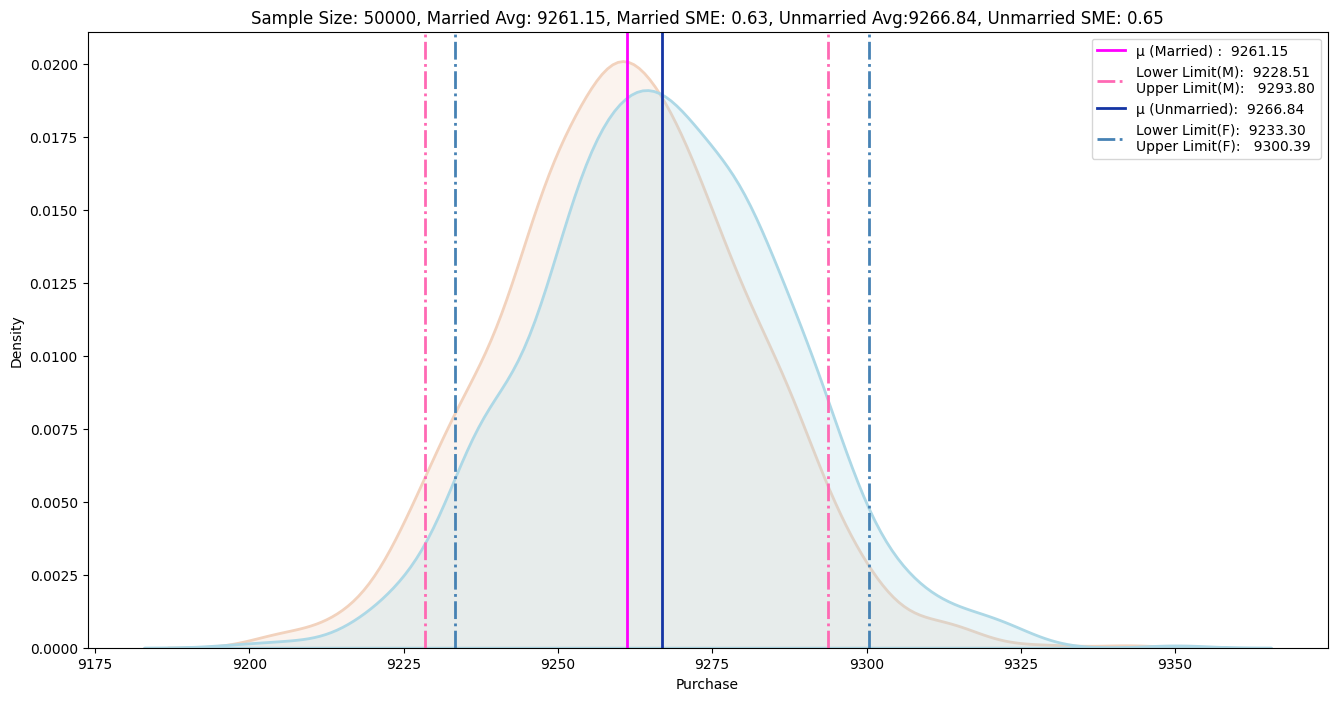

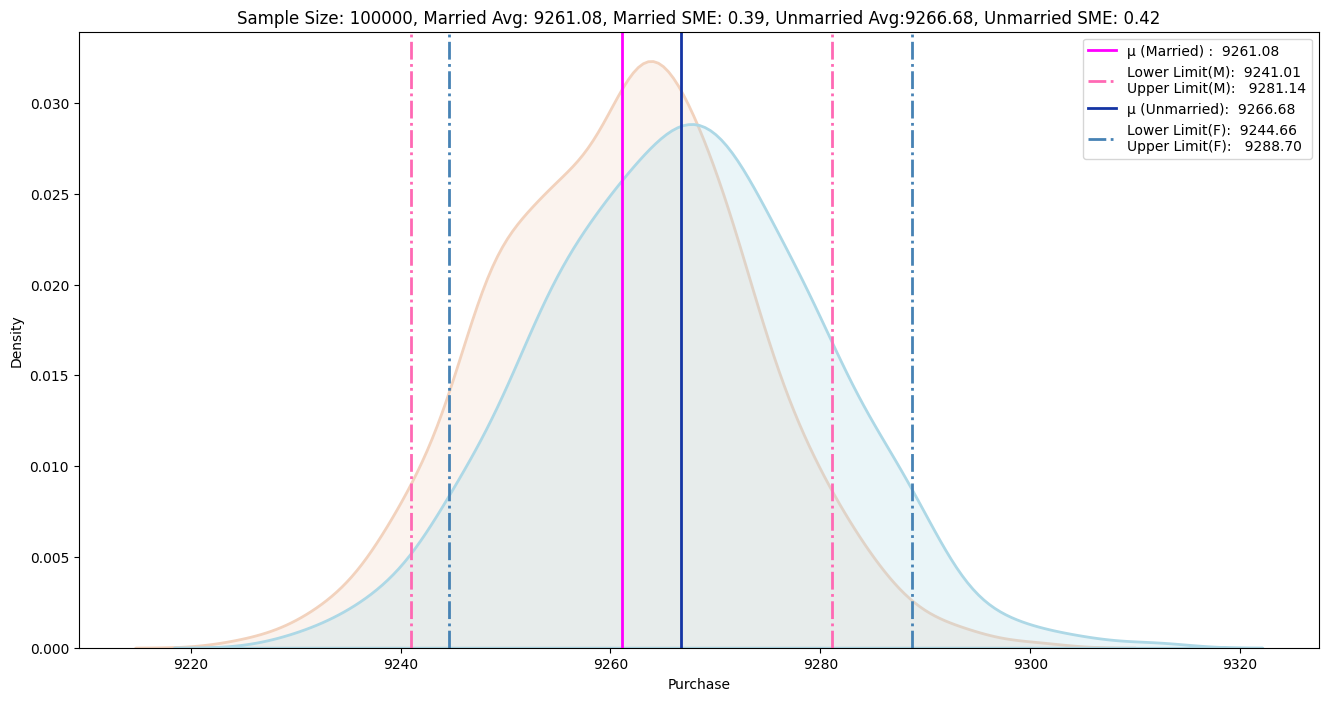

In [ ]:
sample_sizes = [100, 1000, 10000, 50000, 100000]
ci = 90
itr_size = 1000

history_ms = pd.DataFrame(columns = ['Marital_Status','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in sample_sizes:
    m_avg, un_avg, ll_m, ul_m, ll_un, ul_un = bootstrap_m_vs_um(df_married['Purchase'],df_unmarried['Purchase'],i,itr_size,ci)

    history_ms = history_ms.append({'Marital_Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    history_ms = history_ms.append({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':[ll_un,ul_un],'Range': ul_un-ll_un}, ignore_index = True)

In [ ]:
history_ms[history_ms['Confidence Interval']==90]

Marital_Status Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0        Married         100      8443.67     10085.29      9264.48   
1      Unmarried         100      8419.27     10117.87      9268.57   
2        Married        1000      9002.90      9521.41      9262.16   
3      Unmarried        1000      8993.36      9536.82      9265.09   
4        Married       10000      9178.02      9343.53      9260.78   
5      Unmarried       10000      9183.43      9346.58      9265.01   
6        Married       50000      9228.51      9293.80      9261.15   
7      Unmarried       50000      9233.30      9300.39      9266.84   
8        Married      100000      9241.01      9281.14      9261.08   
9      Unmarried      100000      9244.66      9288.70      9266.68   

  Confidence Interval       Interval Range    Range  
0                  90  [8443.67, 10085.29]  1641.62  
1                  90  [8419.27, 10117.87]  1698.60  
2                  90    [9002.9, 9521.41]   518.51  
3                  90   [8993.36, 9536.82]   543.46  
4                  90   [9178.02, 9343.53]   165.51  
5                  90   [9183.43, 9346.58]   163.15  
6                  90    [9228.51, 9293.8]    65.29  
7                  90    [9233.3, 9300.39]    67.09  
8                  90   [9241.01, 9281.14]    40.13  
9                  90    [9244.66, 9288.7]    44.04

**Observation**:

1000 random sample means of different sample sizes were taken, with Confidence of 90% -

* Sample means follows Gaussian Distribution (Central Limit theorem)

* For all sample sizes taken, Married and Unmarried customers average purchase per transaction overlaps.

* Thus, with 90% confidence, we can't comment that whether Unmarried Or Married customers have a higher sale w.r.t each other on Black Friday.


Let's take 1000 random samples of size=100, 1000,10000,50000,100000 and plot the mean of those samples with 95% confidence.

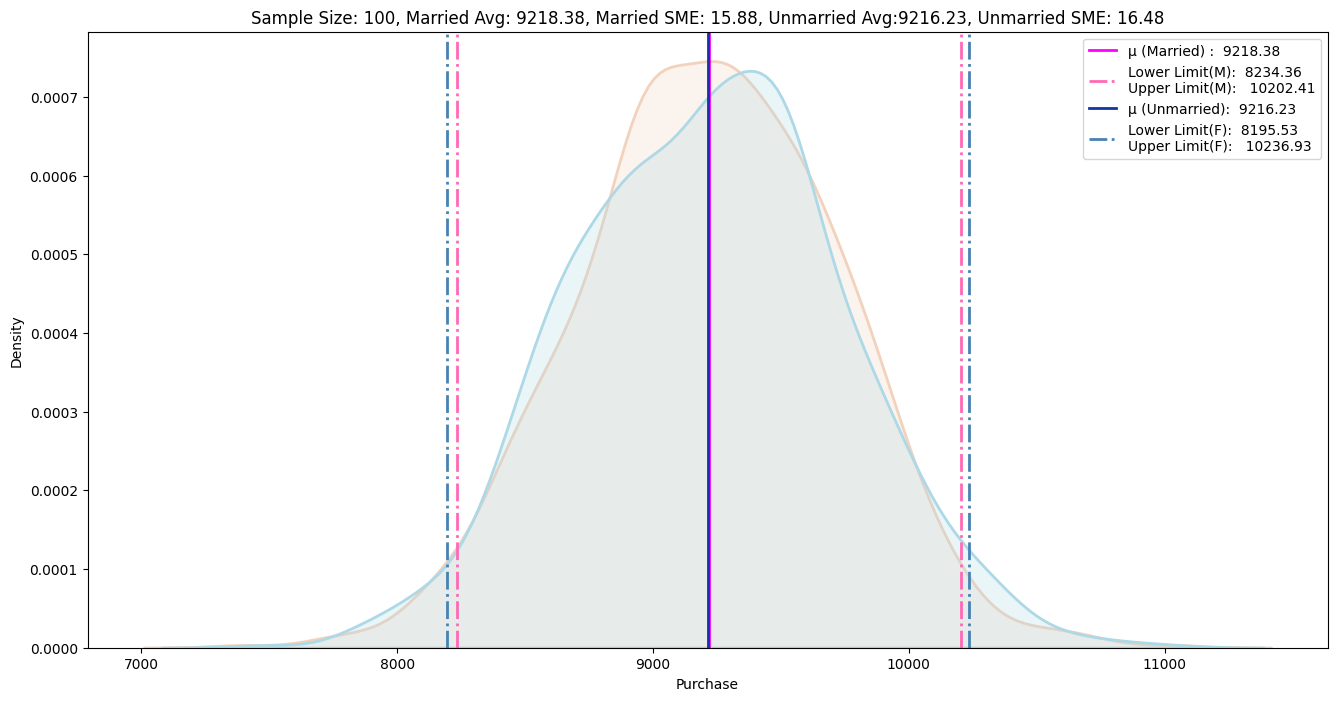

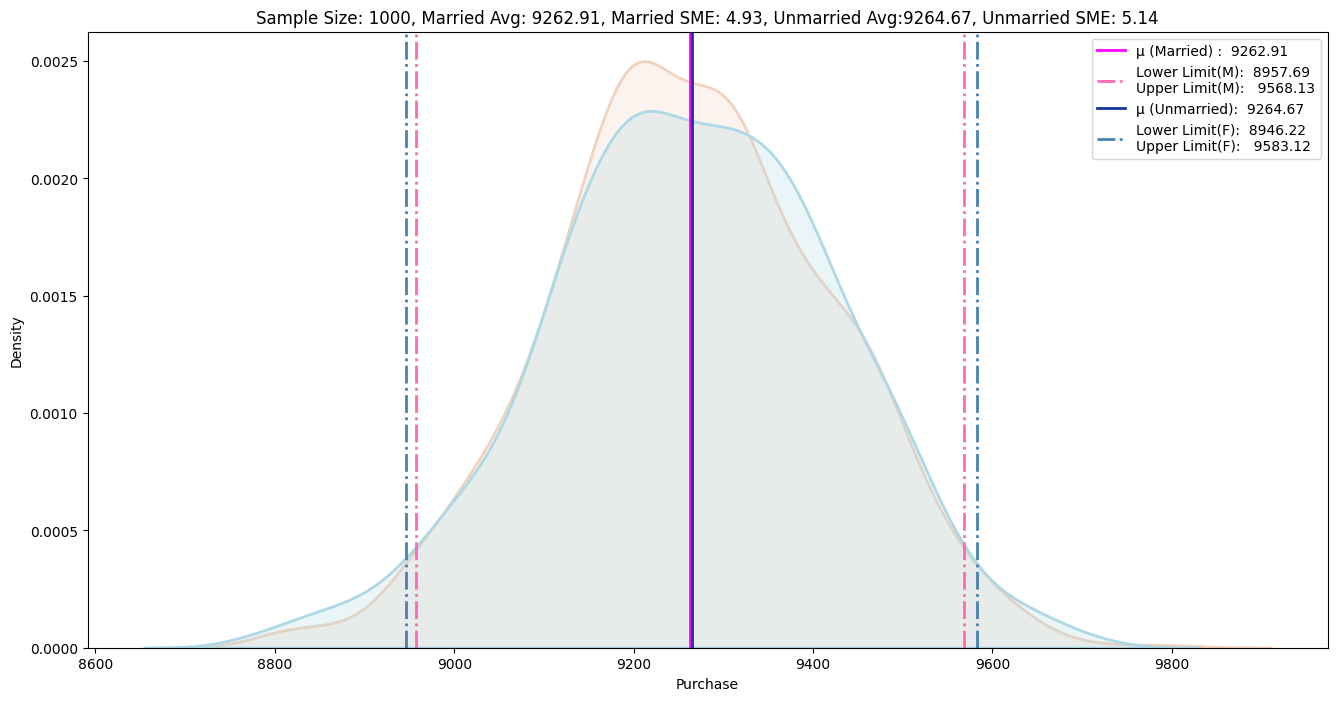

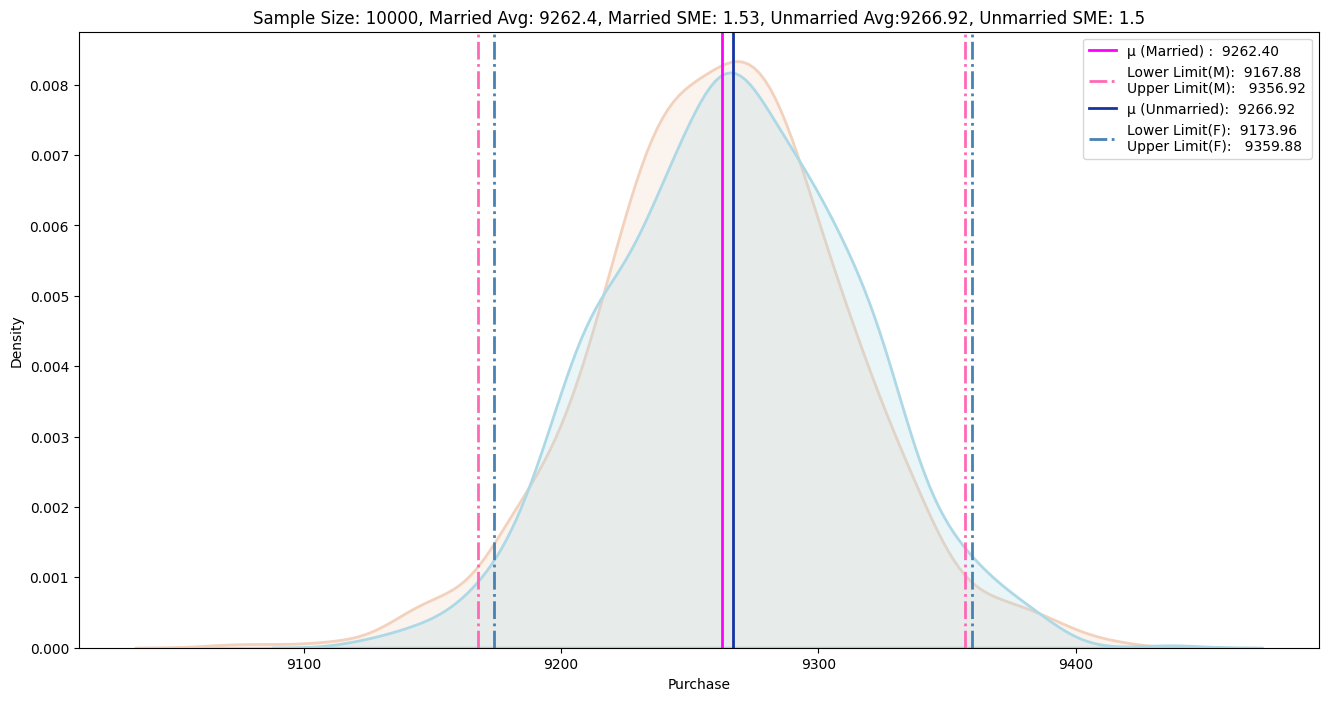

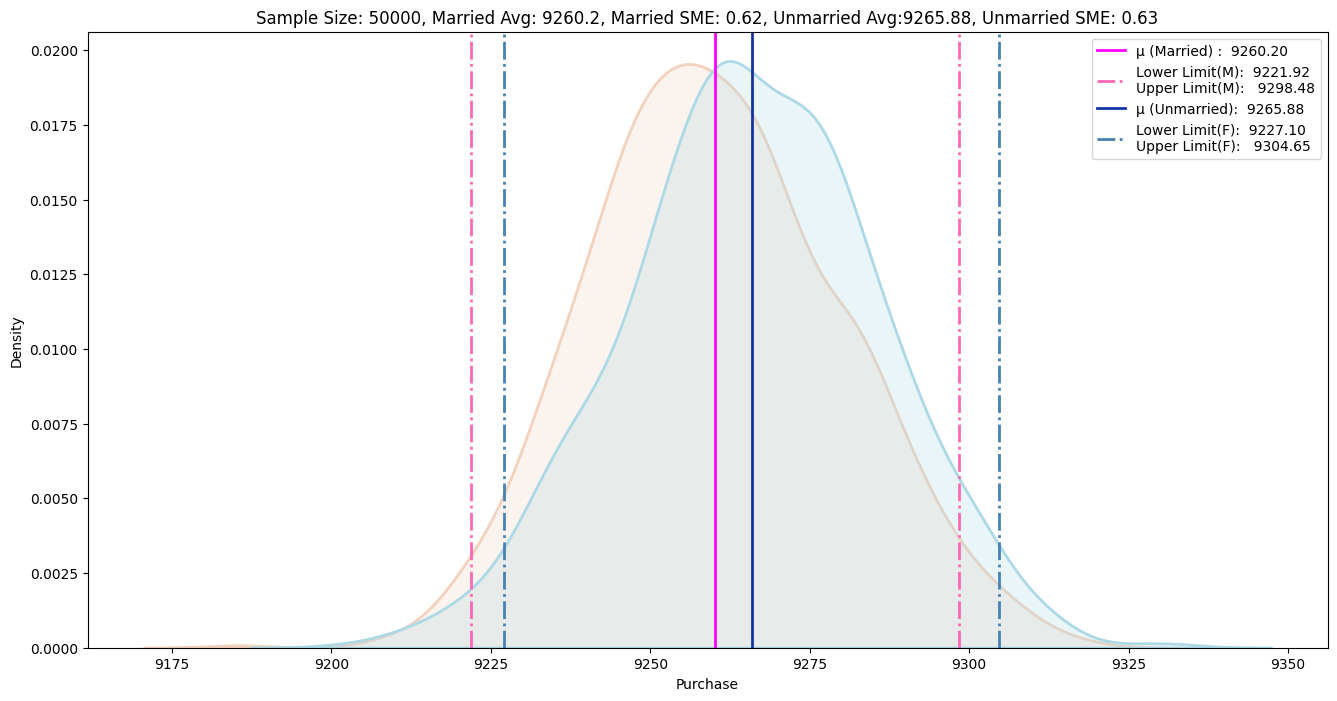

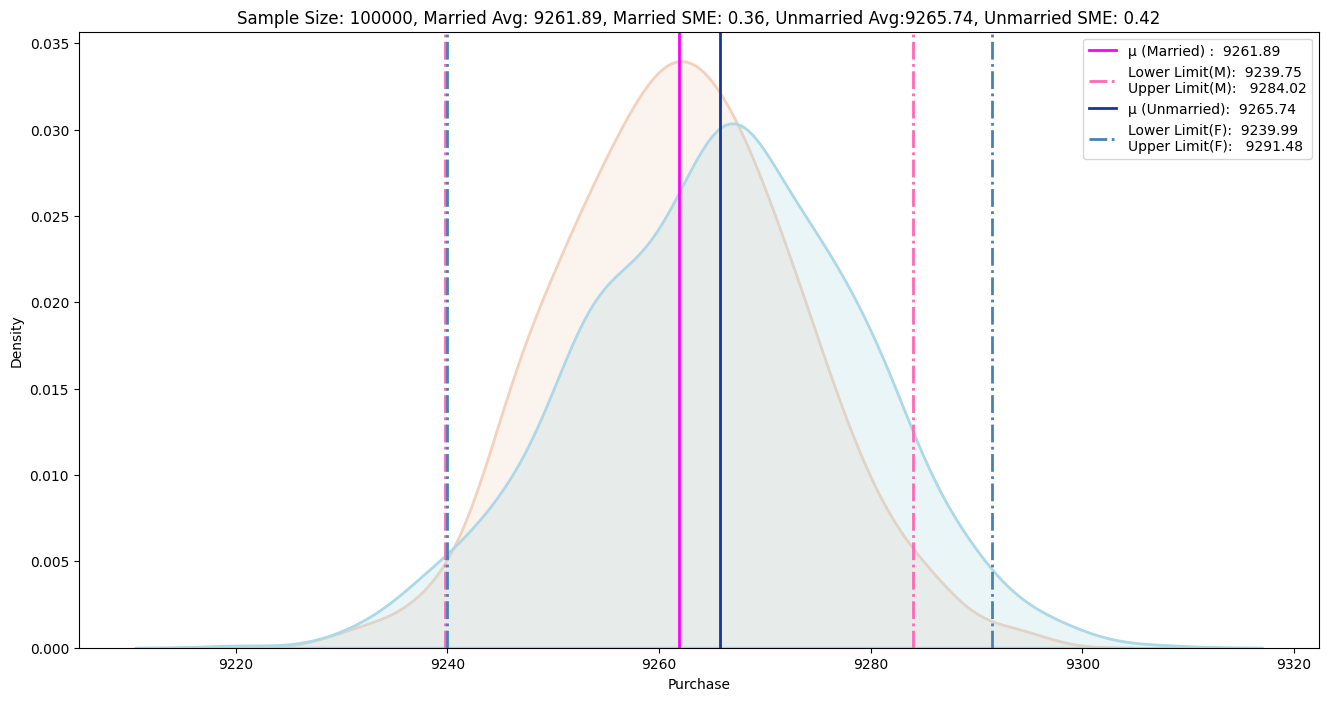

In [ ]:
sample_sizes = [100, 1000, 10000, 50000, 100000]
ci = 95
itr_size = 1000

for i in sample_sizes:
    m_avg, un_avg, ll_m, ul_m, ll_un, ul_un = bootstrap_m_vs_um(df_married['Purchase'],df_unmarried['Purchase'],i,itr_size,ci)

    history_ms = history_ms.append({'Marital_Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    history_ms = history_ms.append({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':[ll_un,ul_un],'Range': ul_un-ll_un}, ignore_index = True)

In [ ]:
history_ms[history_ms['Confidence Interval']==95]

Marital_Status Sample Size  Lower Limit  Upper Limit  Sample Mean  \
10        Married         100      8234.36     10202.41      9218.38   
11      Unmarried         100      8195.53     10236.93      9216.23   
12        Married        1000      8957.69      9568.13      9262.91   
13      Unmarried        1000      8946.22      9583.12      9264.67   
14        Married       10000      9167.88      9356.92      9262.40   
15      Unmarried       10000      9173.96      9359.88      9266.92   
16        Married       50000      9221.92      9298.48      9260.20   
17      Unmarried       50000      9227.10      9304.65      9265.88   
18        Married      100000      9239.75      9284.02      9261.89   
19      Unmarried      100000      9239.99      9291.48      9265.74   

   Confidence Interval       Interval Range    Range  
10                  95  [8234.36, 10202.41]  1968.05  
11                  95  [8195.53, 10236.93]  2041.40  
12                  95   [8957.69, 9568.13]   610.44  
13                  95   [8946.22, 9583.12]   636.90  
14                  95   [9167.88, 9356.92]   189.04  
15                  95   [9173.96, 9359.88]   185.92  
16                  95   [9221.92, 9298.48]    76.56  
17                  95    [9227.1, 9304.65]    77.55  
18                  95   [9239.75, 9284.02]    44.27  
19                  95   [9239.99, 9291.48]    51.49

**Observation**:

1000 random sample means of different sample sizes were taken, with Confidence of 95% -

* Sample means follows Gaussian Distribution (Central Limit theorem)

* For all sample sizes taken, Married and Unmarried customers average purchase per transaction overlaps.

* Thus, with 95% confidence, we can't comment that whether Unmarried Or Married customers have a higher sale w.r.t each other on Black Friday.


Let's take 1000 random samples of size=10, 1000,10000,50000,100000 and plot the mean of those samples with 99% confidence.

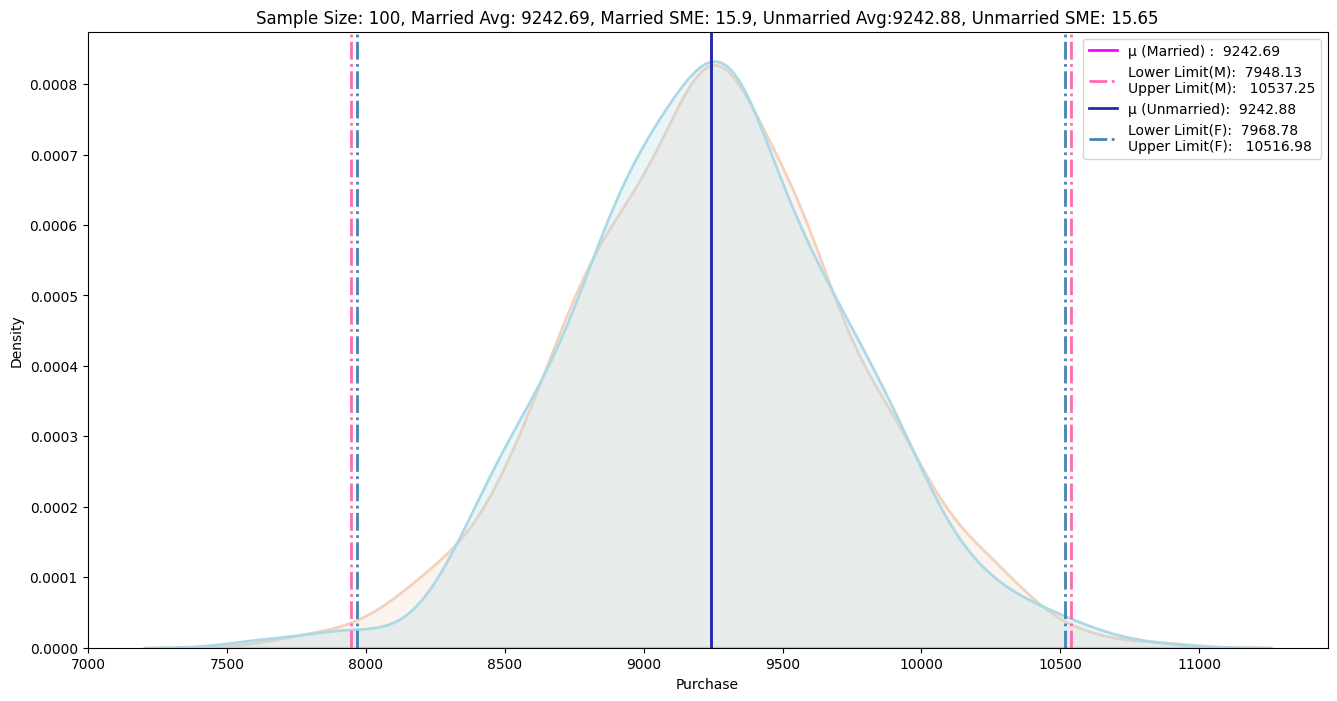

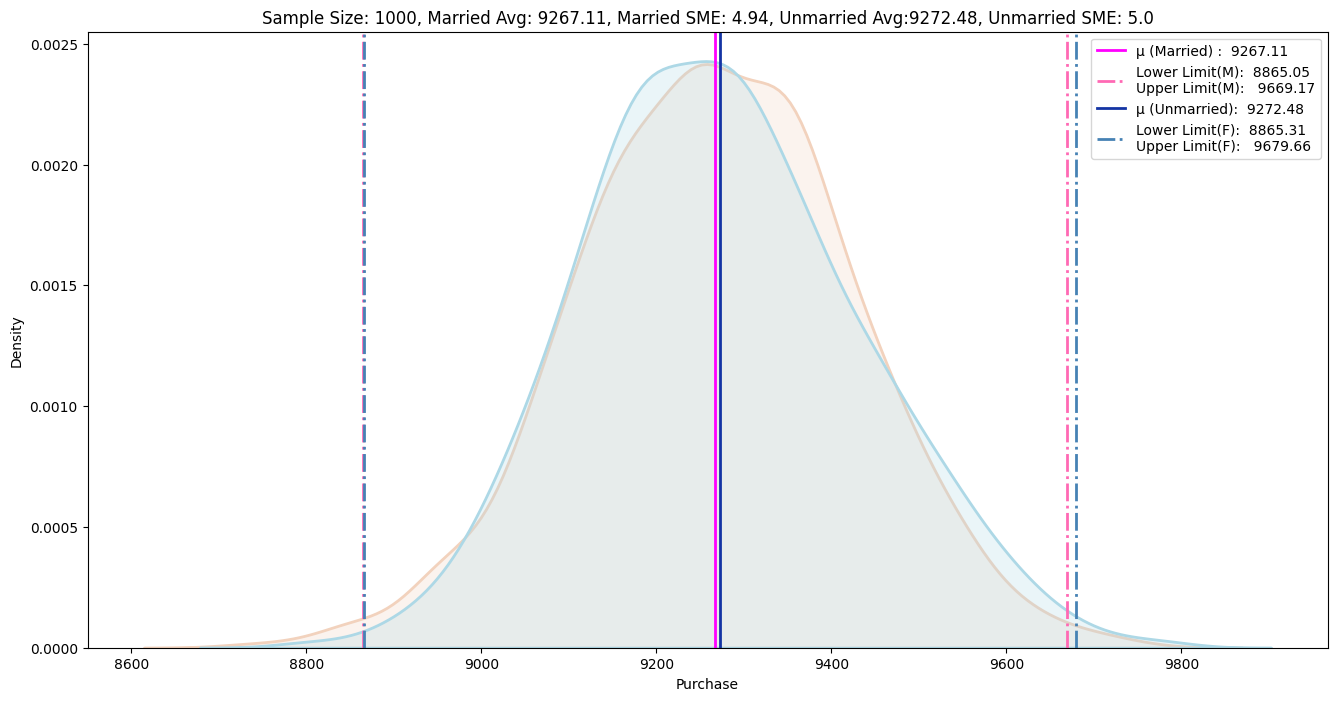

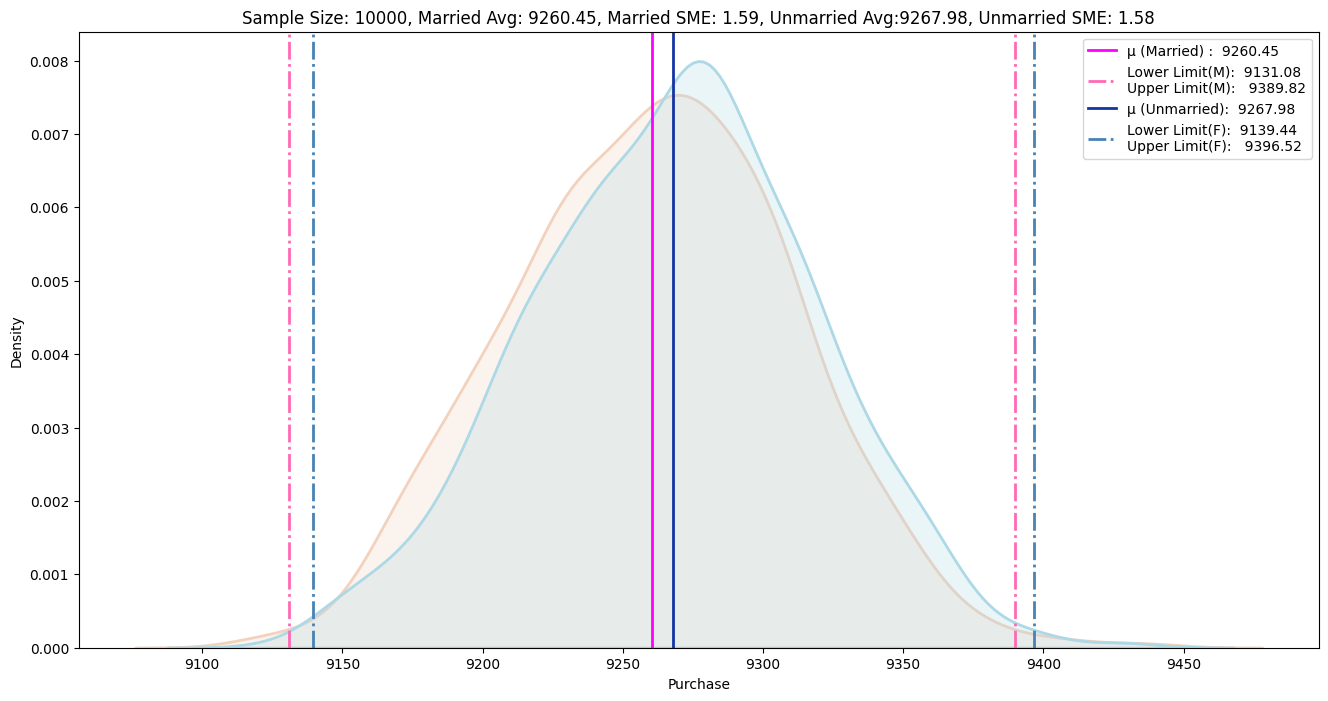

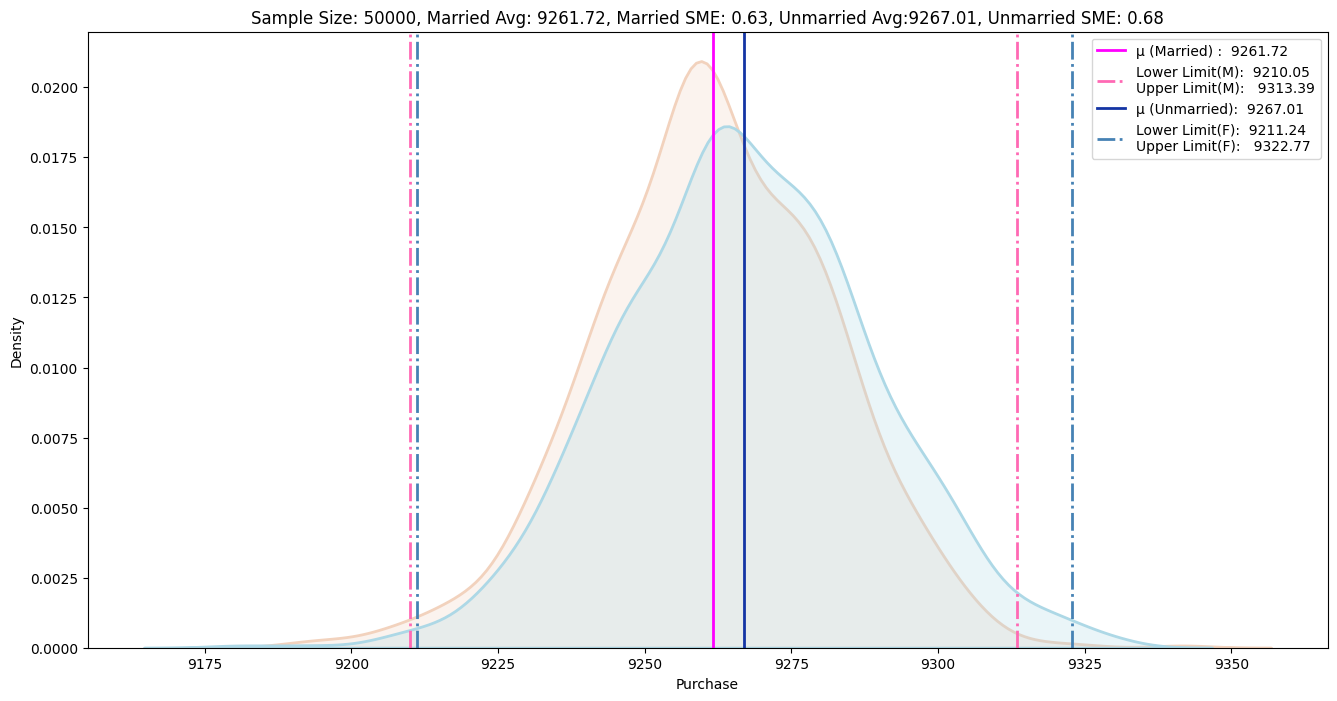

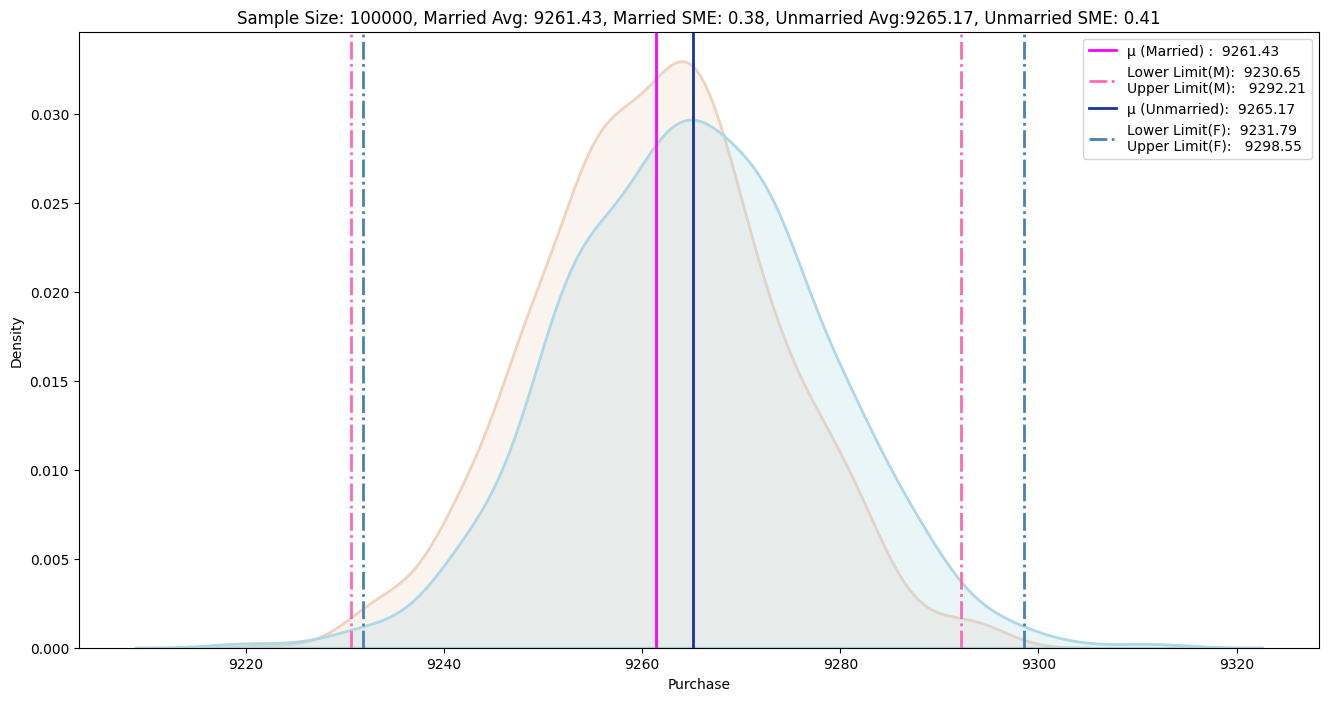

In [ ]:
sample_sizes = [100, 1000, 10000, 50000, 100000]
ci = 99
itr_size = 1000

for i in sample_sizes:
    m_avg, un_avg, ll_m, ul_m, ll_un, ul_un = bootstrap_m_vs_um(df_married['Purchase'],df_unmarried['Purchase'],i,itr_size,ci)

    history_ms = history_ms.append({'Marital_Status':'Married','Sample Size':i,'Lower Limit':ll_m,'Upper Limit':ul_m,'Sample Mean':m_avg,'Confidence Interval':ci,'Interval Range':[ll_m,ul_m],'Range': ul_m-ll_m}, ignore_index = True)
    history_ms = history_ms.append({'Marital_Status':'Unmarried','Sample Size':i,'Lower Limit':ll_un,'Upper Limit':ul_un,'Sample Mean':un_avg,'Confidence Interval':ci,'Interval Range':[ll_un,ul_un],'Range': ul_un-ll_un}, ignore_index = True)

In [ ]:
history_ms[history_ms['Confidence Interval']==99]

Marital_Status Sample Size  Lower Limit  Upper Limit  Sample Mean  \
20        Married         100      7948.13     10537.25      9242.69   
21      Unmarried         100      7968.78     10516.98      9242.88   
22        Married        1000      8865.05      9669.17      9267.11   
23      Unmarried        1000      8865.31      9679.66      9272.48   
24        Married       10000      9131.08      9389.82      9260.45   
25      Unmarried       10000      9139.44      9396.52      9267.98   
26        Married       50000      9210.05      9313.39      9261.72   
27      Unmarried       50000      9211.24      9322.77      9267.01   
28        Married      100000      9230.65      9292.21      9261.43   
29      Unmarried      100000      9231.79      9298.55      9265.17   

   Confidence Interval       Interval Range    Range  
20                  99  [7948.13, 10537.25]  2589.12  
21                  99  [7968.78, 10516.98]  2548.20  
22                  99   [8865.05, 9669.17]   804.12  
23                  99   [8865.31, 9679.66]   814.35  
24                  99   [9131.08, 9389.82]   258.74  
25                  99   [9139.44, 9396.52]   257.08  
26                  99   [9210.05, 9313.39]   103.34  
27                  99   [9211.24, 9322.77]   111.53  
28                  99   [9230.65, 9292.21]    61.56  
29                  99   [9231.79, 9298.55]    66.76

**Observation**:

1000 random sample means of different sample sizes were taken, with Confidence of 99% -

* Sample means follows Gaussian Distribution (Central Limit theorem)

* For all sample sizes taken, Married and Unmarried customers average purchase per transaction overlaps.

* Thus, with 99% confidence, we can't comment that whether Unmarried Or Married customers have a higher sale w.r.t each other on Black Friday.


**Black Friday Shopping Habits: Married vs. Unmarried Customers**

Based on the results of the study, we can conclude with a that there is no significant difference in purchase amount per transaction between married and unmarried customers on Black Friday.

This suggests that the marital status of a customer for population is not a good predictor of their spending habits on Black Friday.

### **Age Group vs Purchase**

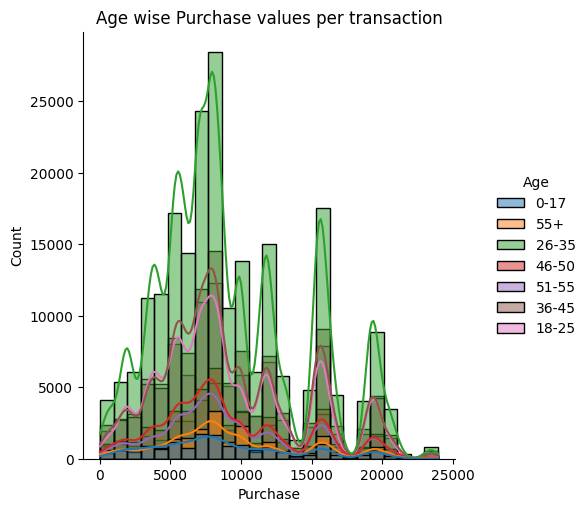

In [ ]:
sns.displot(x=df['Purchase'],hue=df['Age'],bins=25,kde=True)
plt.title('Age wise Purchase values per transaction')
plt.show()

In [ ]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [ ]:
df.groupby('Age')['Purchase'].std()

Age
0-17     5111.114046
18-25    5034.321997
26-35    5010.527303
36-45    5022.923879
46-50    4967.216367
51-55    5087.368080
55+      5011.493996
Name: Purchase, dtype: float64

In [ ]:
df.groupby('Age')['Purchase'].describe().T

Age            0-17         18-25          26-35          36-45         46-50  \
count  15102.000000  99660.000000  219587.000000  110013.000000  45701.000000   
mean    8933.464640   9169.663606    9252.690633    9331.350695   9208.625697   
std     5111.114046   5034.321997    5010.527303    5022.923879   4967.216367   
min       12.000000     12.000000      12.000000      12.000000     12.000000   
25%     5328.000000   5415.000000    5475.000000    5876.000000   5888.000000   
50%     7986.000000   8027.000000    8030.000000    8061.000000   8036.000000   
75%    11874.000000  12028.000000   12047.000000   12107.000000  11997.000000   
max    23955.000000  23958.000000   23961.000000   23960.000000  23960.000000   

Age           51-55           55+  
count  38501.000000  21504.000000  
mean    9534.808031   9336.280459  
std     5087.368080   5011.493996  
min       12.000000     12.000000  
25%     6017.000000   6018.000000  
50%     8130.000000   8105.500000  
75%    12462.000000  11932.000000  
max    23960.000000  23960.000000

* For the dataset of 0.5M rows, it is observed that Customers that belongs to age group 51-55 have slightly more average purchase per transaction on Black Friday Sale. However, this is only a sample of the original dataset of 100 million rows, so we cannot be sure that this finding holds true for the entire population.

* To infer about the population, we can use bootstrapping, confidence intervals, and the Central Limit Theorem.

In [ ]:
def bootstrap_age(sample, sample_size, itr_size=1000, ci = 90):
    ci = ci/100

    global flag

    sample_n = [np.mean(sample.sample(sample_size)) for i in range(itr_size)]

    mean  = np.mean(sample_n)
    sigma = np.std(sample_n)
    sem   = stats.sem(sample_n)

    lower_limit = norm.ppf((1-ci)/2) * sigma + mean
    upper_limit = norm.ppf(ci + (1-ci)/2) * sigma + mean

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=sample_n,color="#7A68A6",fill=True,linewidth=2)

    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))

    plt.title(f"Age Group: {age_group[flag]}, Sample Size: {sample_size}, Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14)
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'dotted', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'dotted', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    flag += 1

    return sample_n ,np.round(lower_limit,2),np.round(upper_limit,2), round(mean,2)

Let's take 1000 random samples of size=10000, and plot the mean of those samples with 90% confidence.

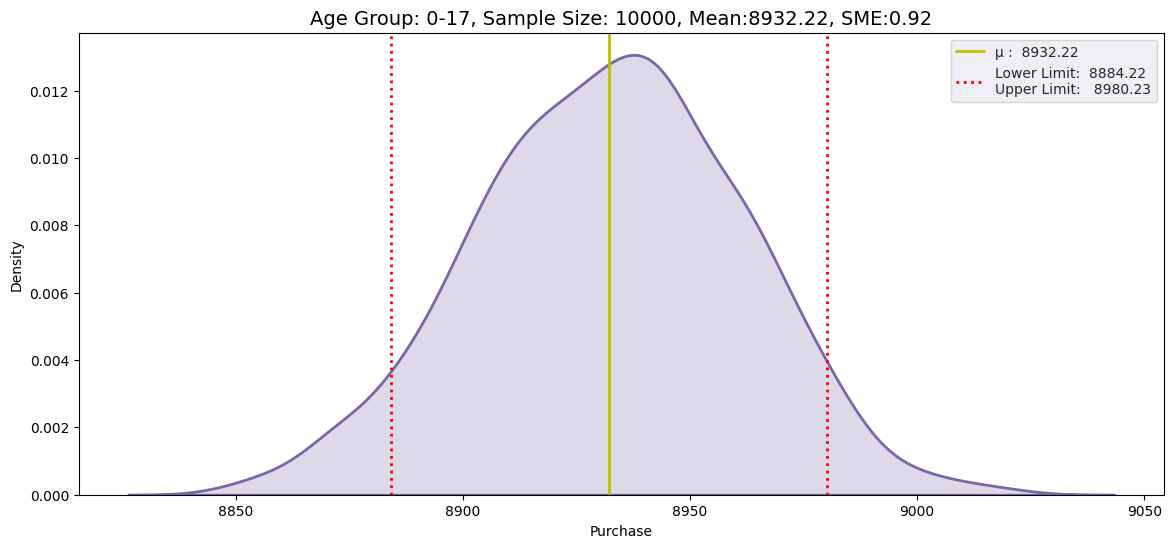

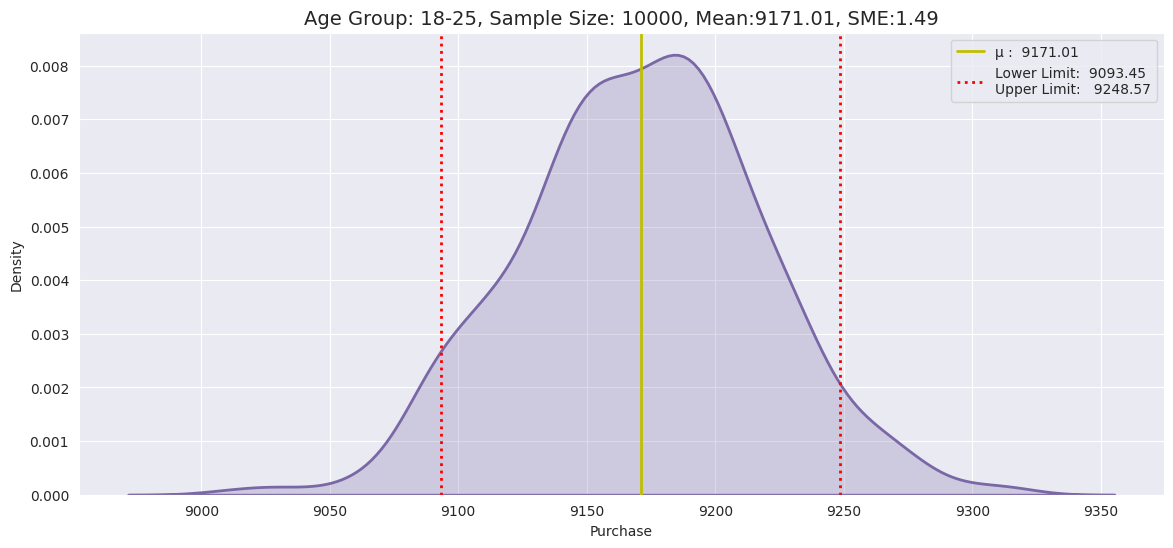

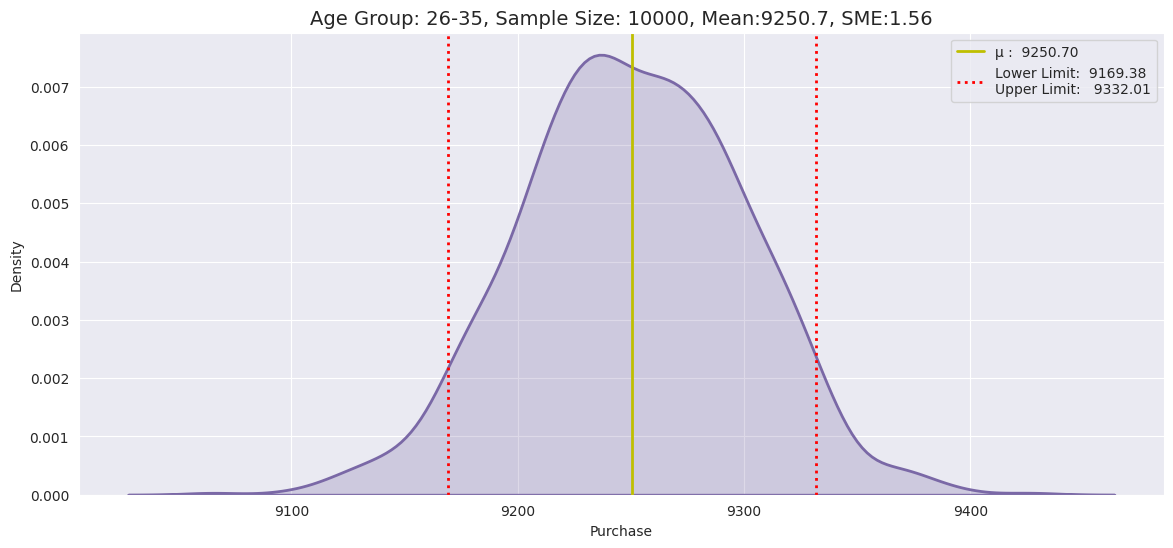

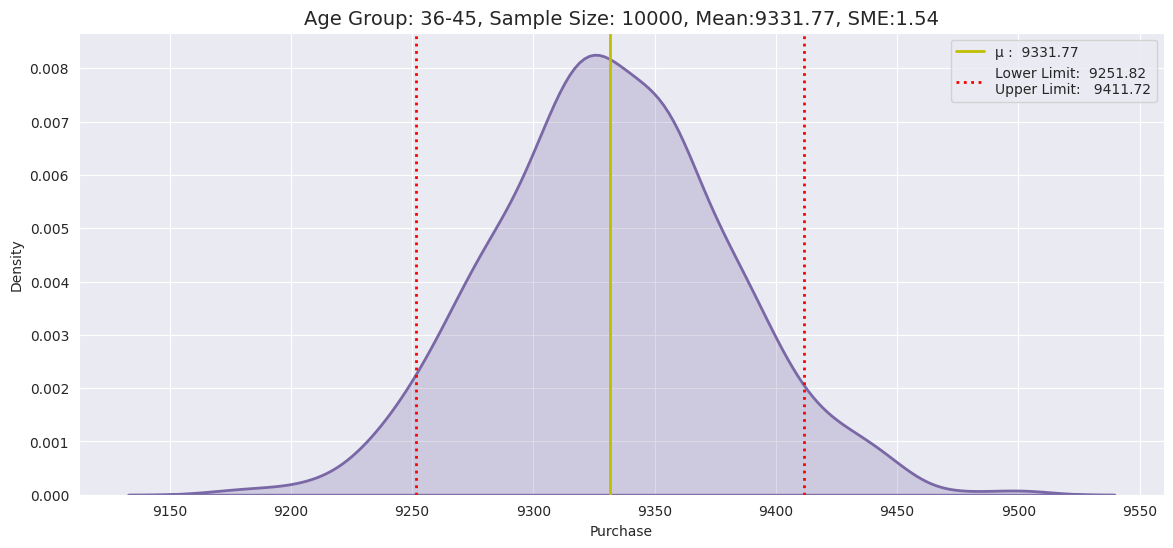

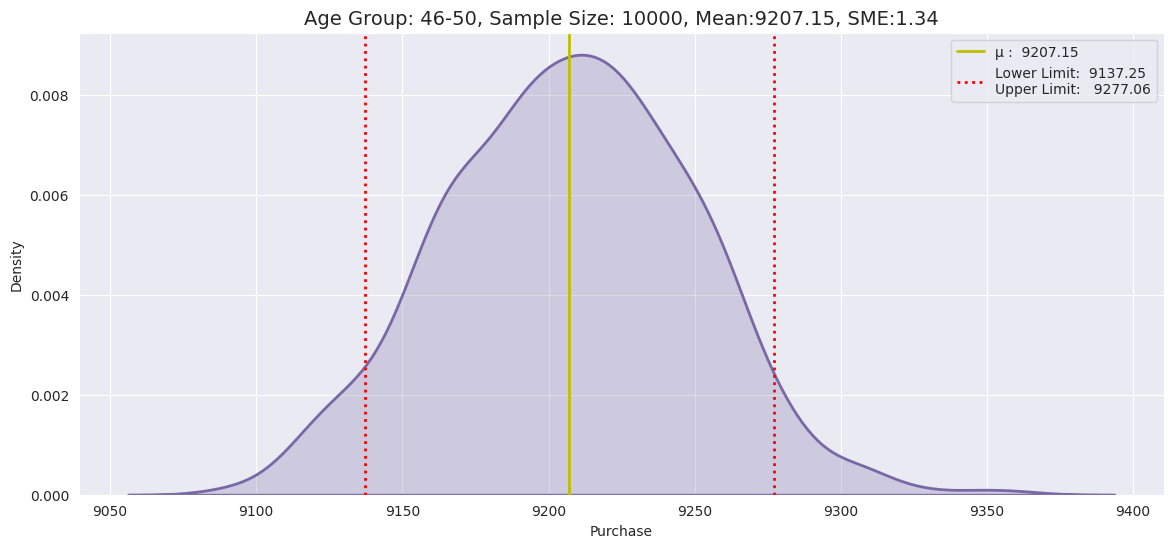

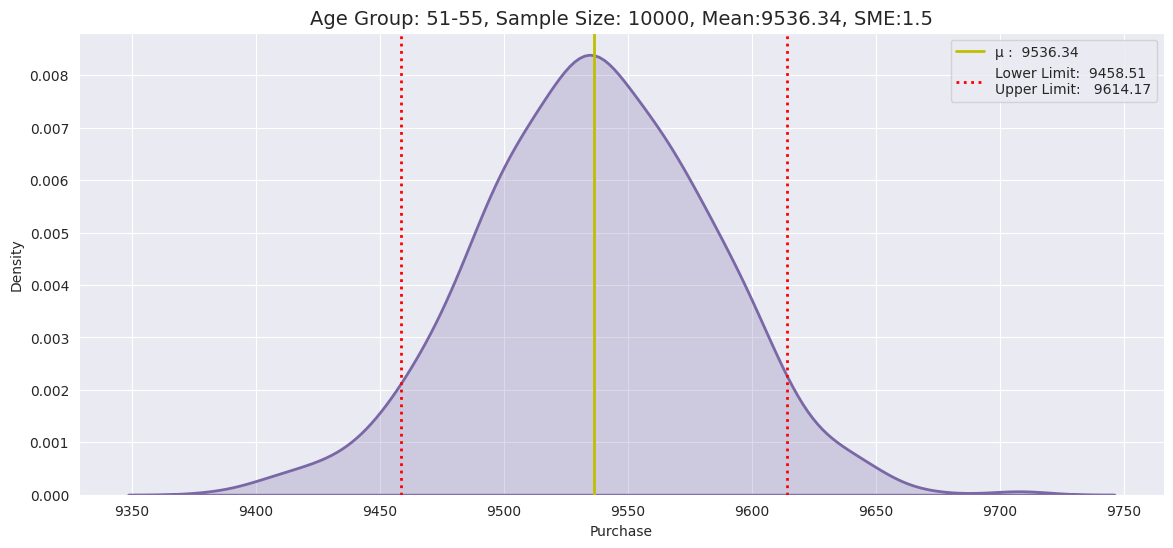

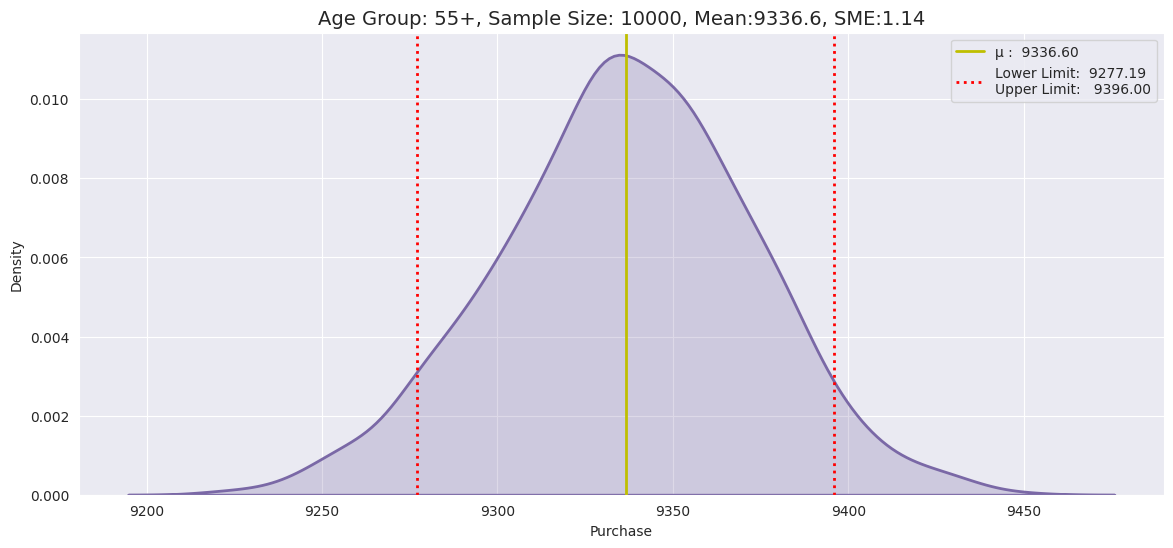

In [ ]:
ci = 90
itr_size = 1000
sample_size = 10000
flag = 0
global age_group
age_group = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

history_a = pd.DataFrame(columns = ['Age_Group','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Interval Range','Range'])

for i in age_group:
    m_avg, ll, ul, mean = bootstrap_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)
    history_a = history_a.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

Let's take 1000 random samples of size=10000, and plot the mean of those samples with 95% confidence.

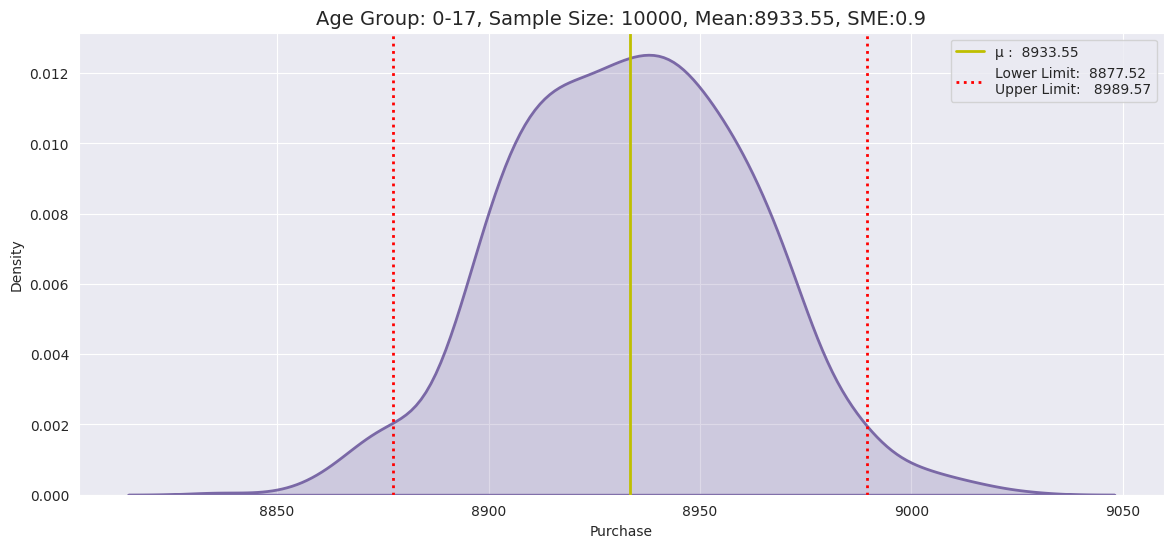

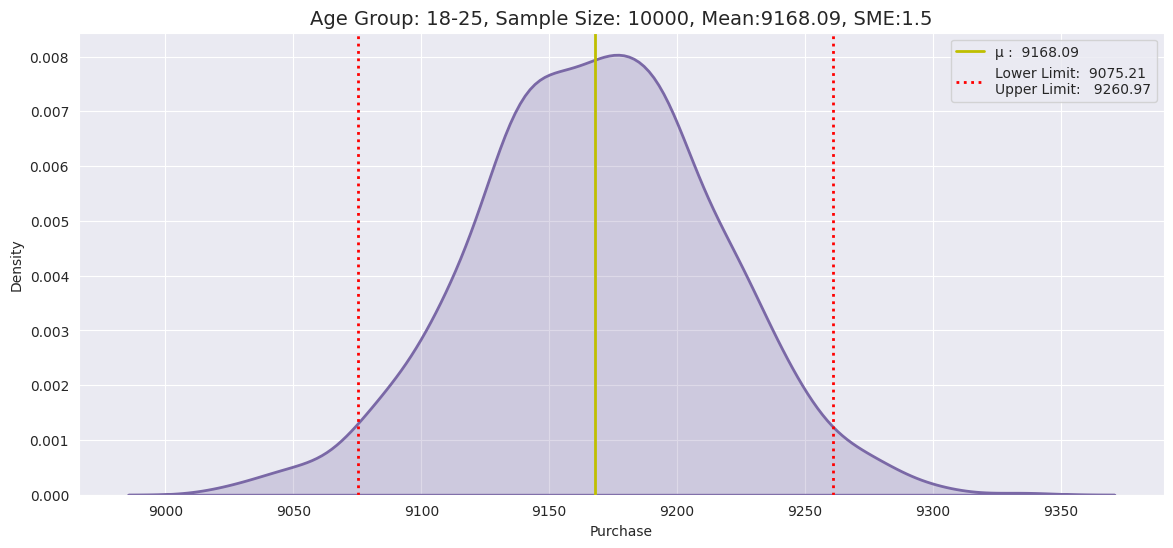

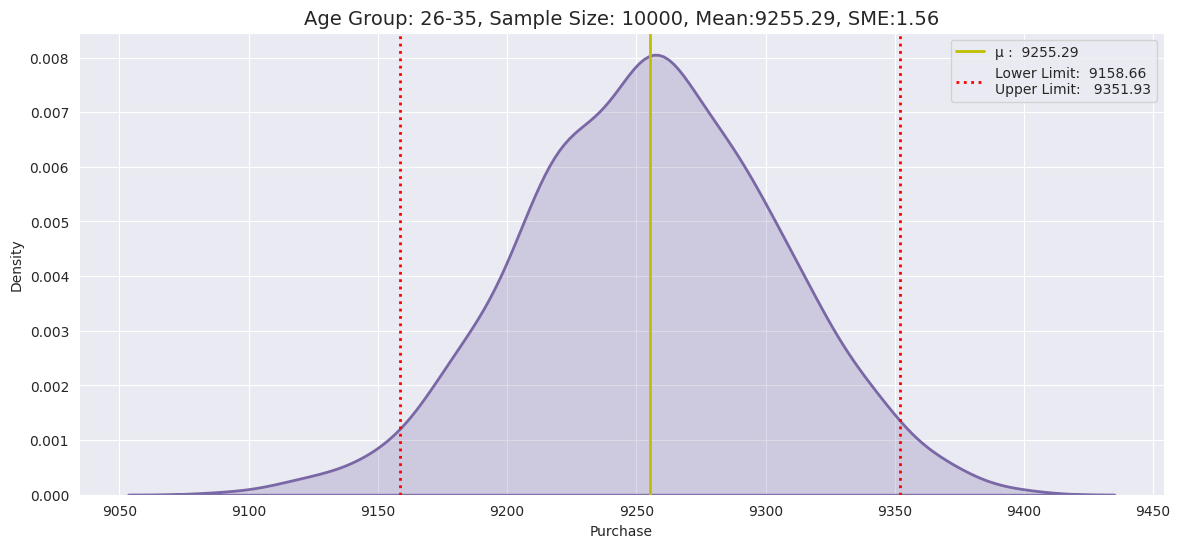

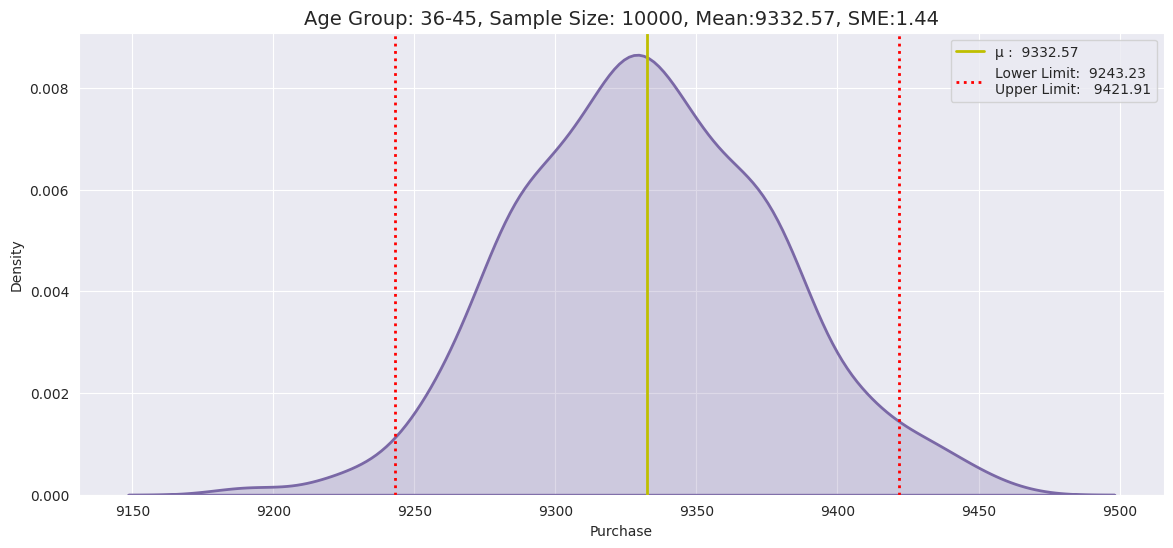

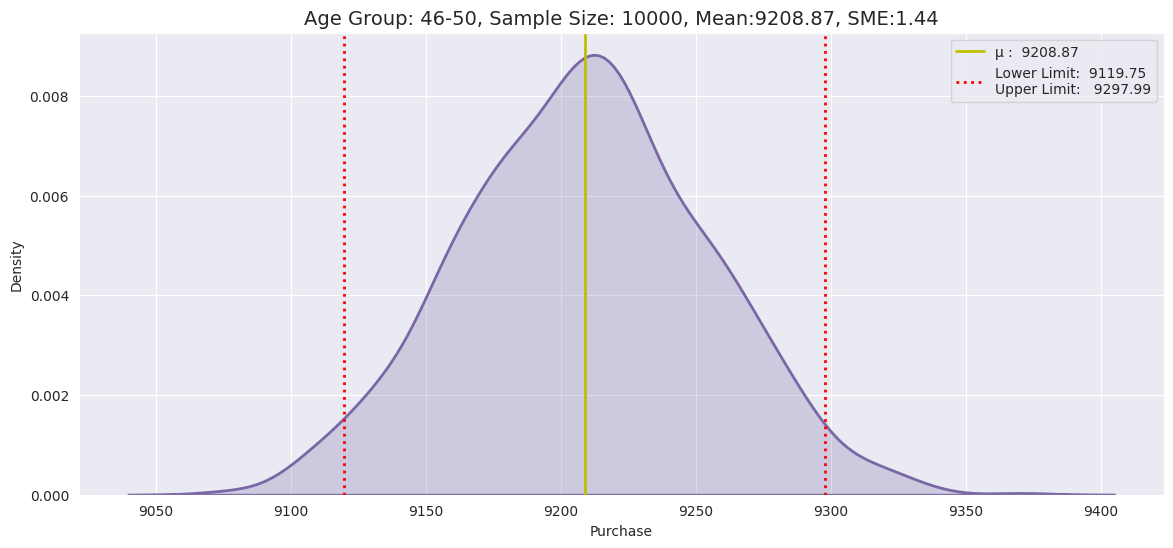

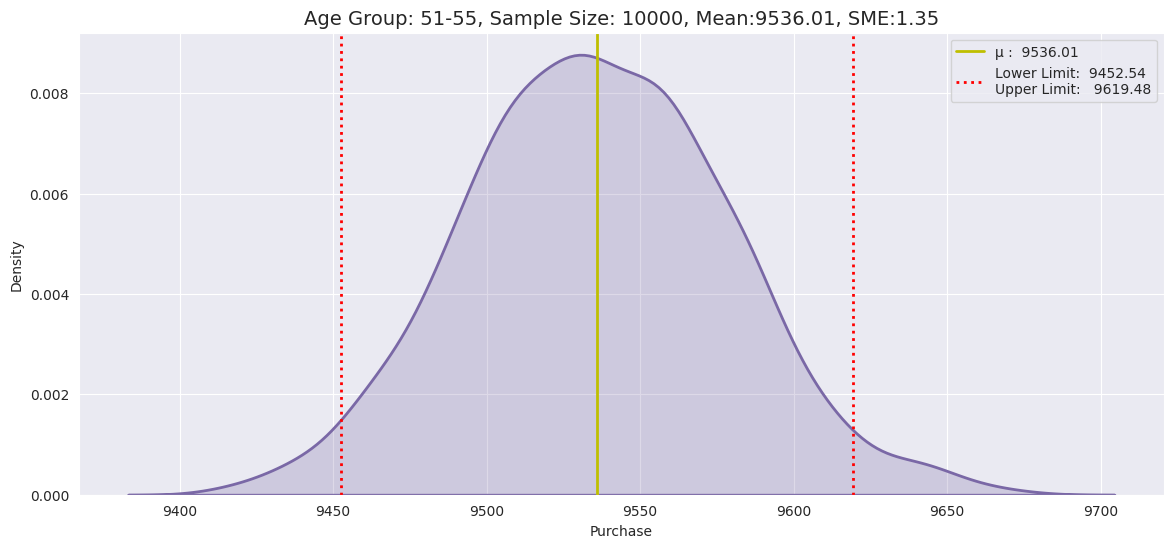

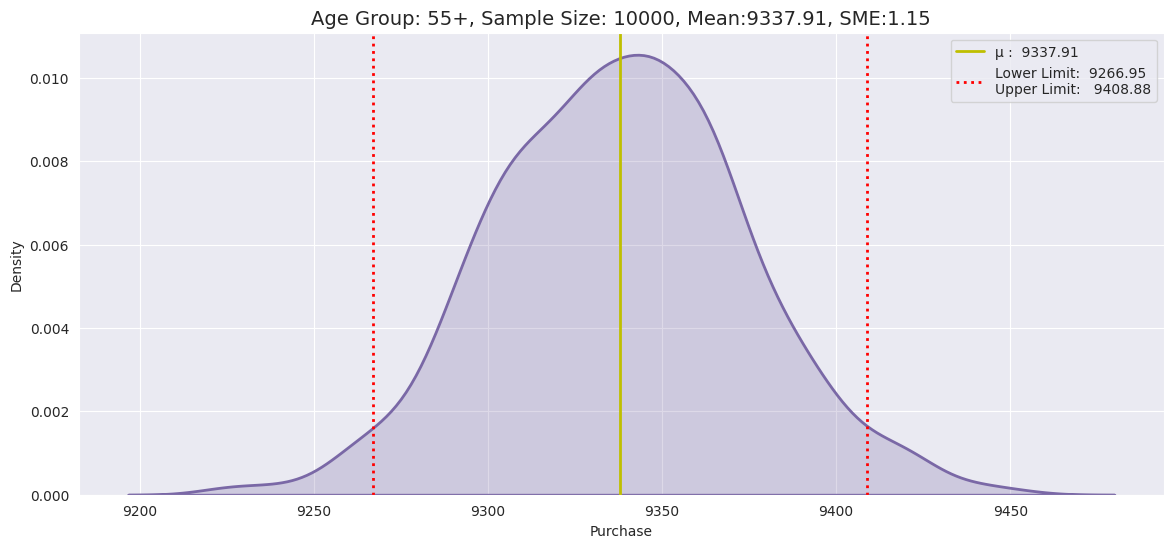

In [ ]:
ci = 95
itr_size = 1000
sample_size = 10000
flag = 0

for i in age_group:
    m_avg, ll, ul, mean = bootstrap_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)
    history_a = history_a.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

Let's take 1000 random samples of size=10000, and plot the mean of those samples with 99% confidence.

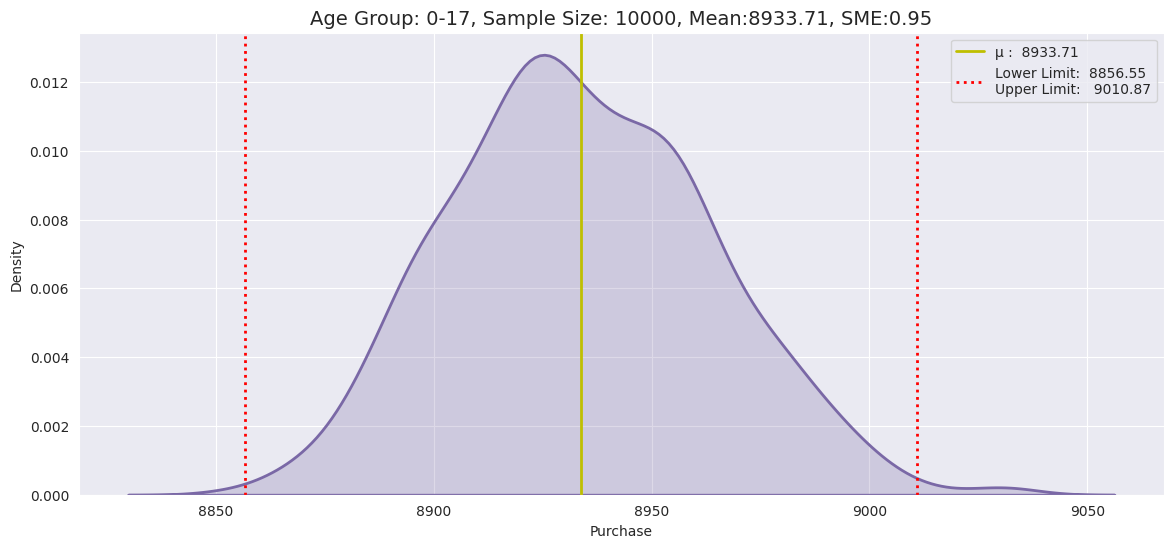

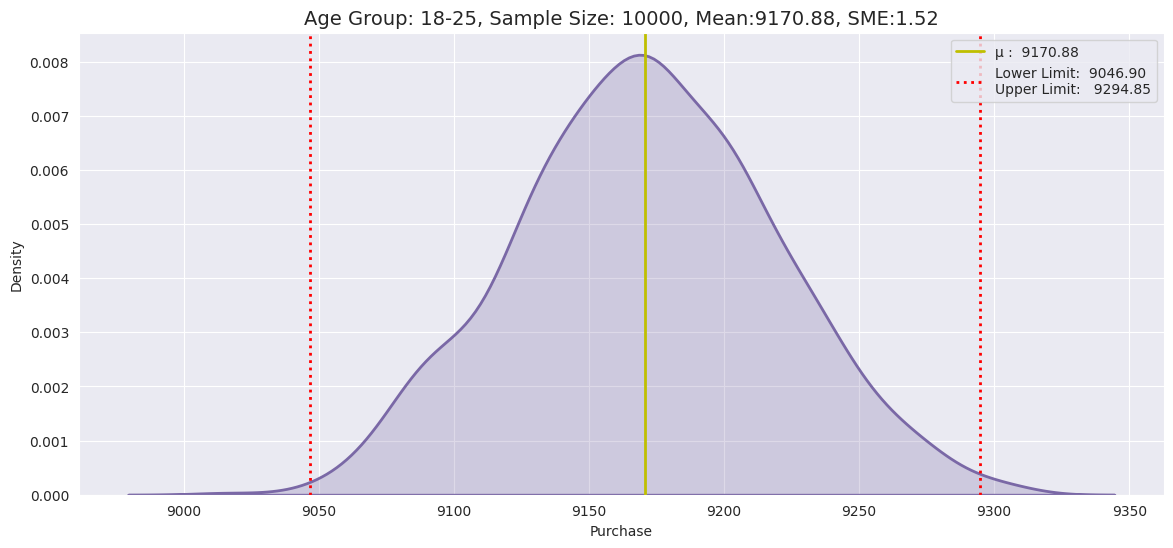

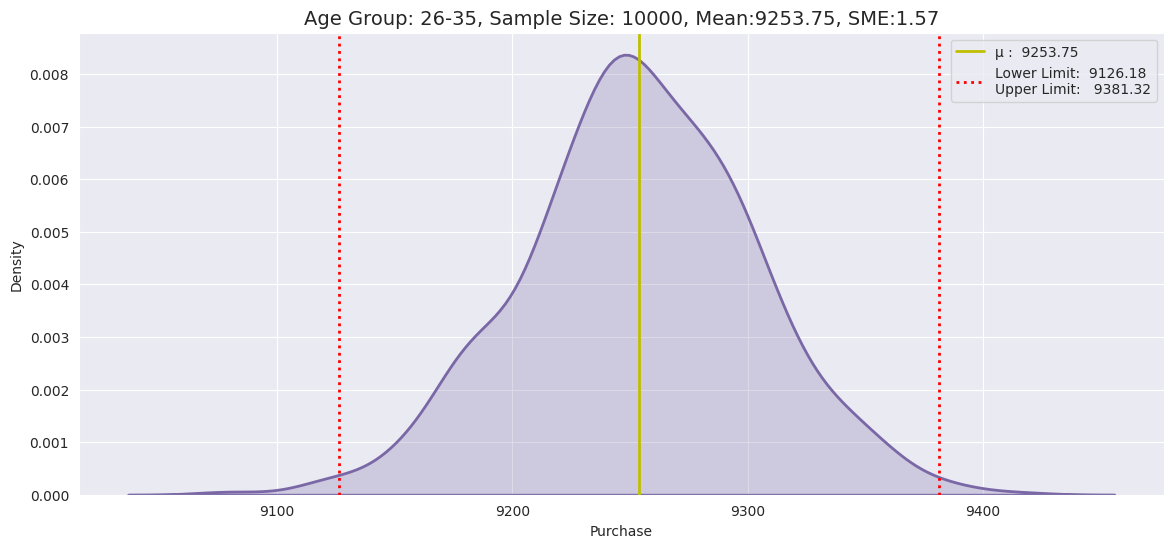

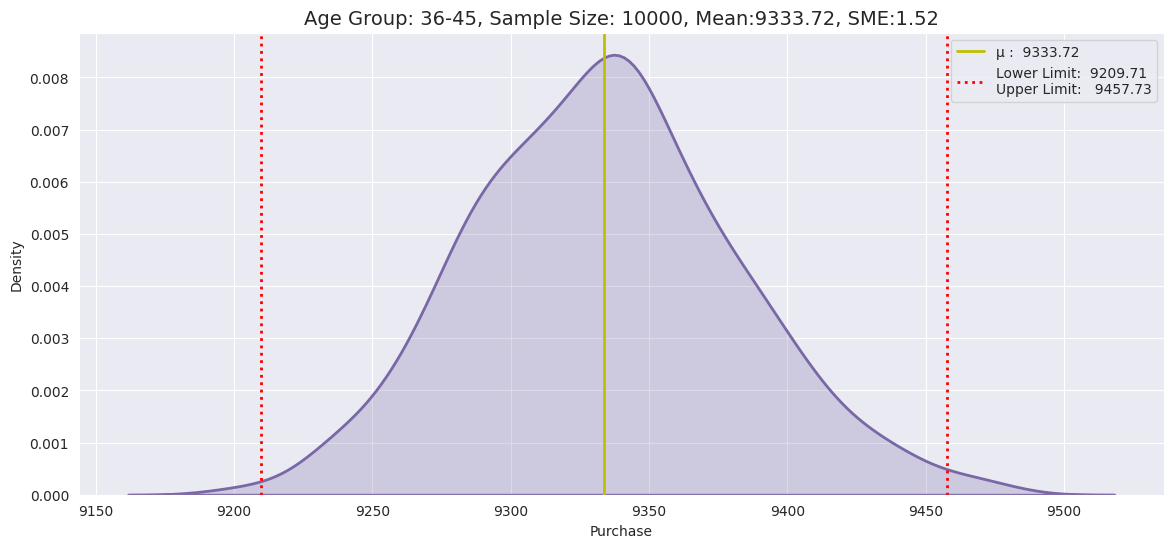

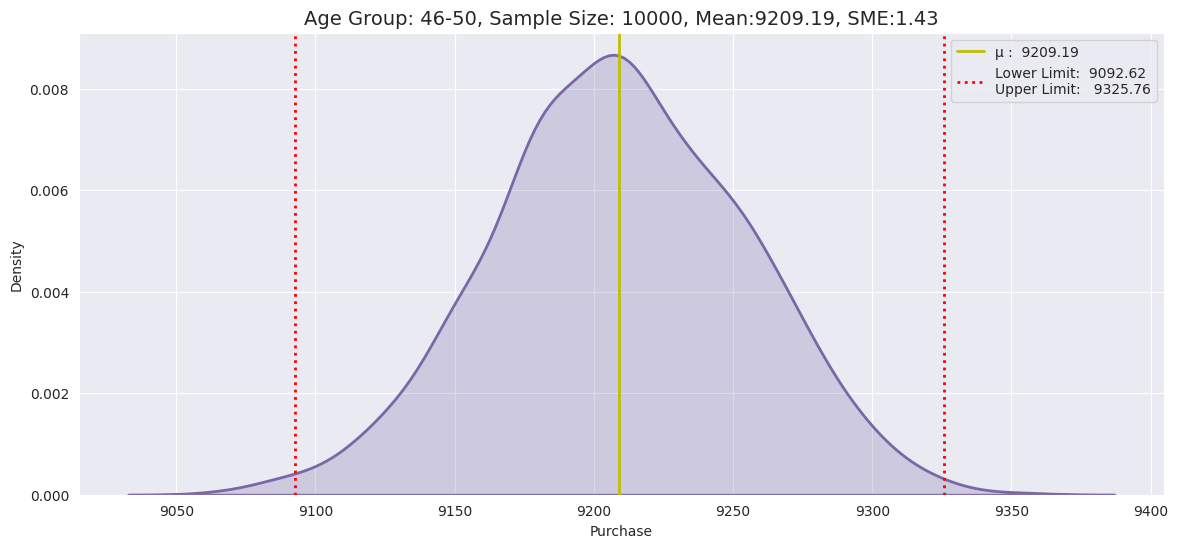

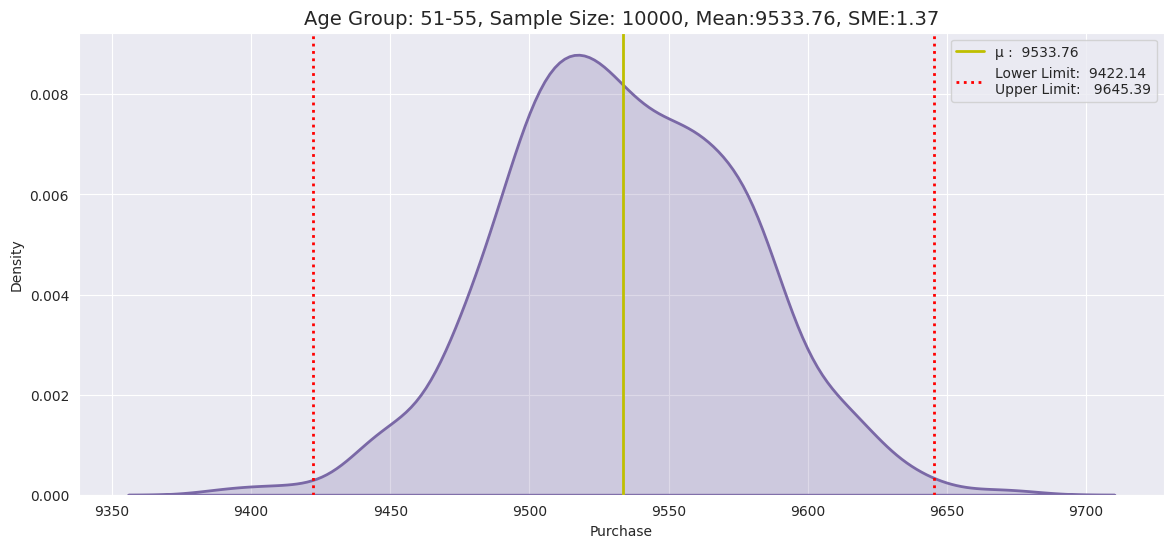

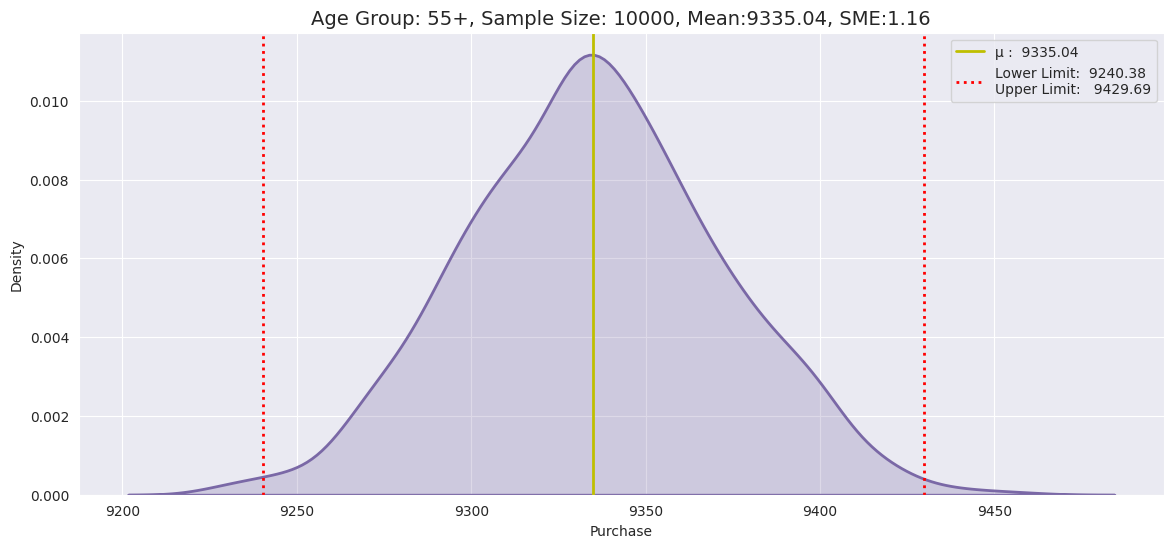

In [ ]:
ci = 99
itr_size = 1000
sample_size = 10000
flag = 0

for i in age_group:
    m_avg, ll, ul, mean = bootstrap_age(df[df['Age']==i]['Purchase'],sample_size,itr_size,ci)
    history_a = history_a.append({'Age_Group':i,'Sample Size':sample_size,'Lower Limit':ll,'Upper Limit':ul,'Sample Mean':mean,'Confidence Interval':ci,'Interval Range':[ll,ul],'Range': ul-ll}, ignore_index = True)

In [ ]:
history_a

Age_Group Sample Size  Lower Limit  Upper Limit  Sample Mean  \
0       0-17       10000      8884.22      8980.23      8932.22   
1      18-25       10000      9093.45      9248.57      9171.01   
2      26-35       10000      9169.38      9332.01      9250.70   
3      36-45       10000      9251.82      9411.72      9331.77   
4      46-50       10000      9137.25      9277.06      9207.15   
5      51-55       10000      9458.51      9614.17      9536.34   
6        55+       10000      9277.19      9396.00      9336.60   
7       0-17       10000      8877.52      8989.57      8933.55   
8      18-25       10000      9075.21      9260.97      9168.09   
9      26-35       10000      9158.66      9351.93      9255.29   
10     36-45       10000      9243.23      9421.91      9332.57   
11     46-50       10000      9119.75      9297.99      9208.87   
12     51-55       10000      9452.54      9619.48      9536.01   
13       55+       10000      9266.95      9408.88      9337.91   
14      0-17       10000      8856.55      9010.87      8933.71   
15     18-25       10000      9046.90      9294.85      9170.88   
16     26-35       10000      9126.18      9381.32      9253.75   
17     36-45       10000      9209.71      9457.73      9333.72   
18     46-50       10000      9092.62      9325.76      9209.19   
19     51-55       10000      9422.14      9645.39      9533.76   
20       55+       10000      9240.38      9429.69      9335.04   

   Confidence Interval      Interval Range   Range  
0                   90  [8884.22, 8980.23]   96.01  
1                   90  [9093.45, 9248.57]  155.12  
2                   90  [9169.38, 9332.01]  162.63  
3                   90  [9251.82, 9411.72]  159.90  
4                   90  [9137.25, 9277.06]  139.81  
5                   90  [9458.51, 9614.17]  155.66  
6                   90   [9277.19, 9396.0]  118.81  
7                   95  [8877.52, 8989.57]  112.05  
8                   95  [9075.21, 9260.97]  185.76  
9                   95  [9158.66, 9351.93]  193.27  
10                  95  [9243.23, 9421.91]  178.68  
11                  95  [9119.75, 9297.99]  178.24  
12                  95  [9452.54, 9619.48]  166.94  
13                  95  [9266.95, 9408.88]  141.93  
14                  99  [8856.55, 9010.87]  154.32  
15                  99   [9046.9, 9294.85]  247.95  
16                  99  [9126.18, 9381.32]  255.14  
17                  99  [9209.71, 9457.73]  248.02  
18                  99  [9092.62, 9325.76]  233.14  
19                  99  [9422.14, 9645.39]  223.25  
20                  99  [9240.38, 9429.69]  189.31

Observations:

* Sample mean distribution follows Gaussian distribution (CLT)

* With 90% confidence we can say that
  * Age group 0-17 has the lowest purchase value range of [8884.74, 8981.95].
  * Age group 51-55 has the highest purchase value range of [9465.4, 9608.56].

* With 95% confidence we can say that
  * Age group 0-17 has the lowest purchase value range of [8878.26, 8989.49].
  * Age group 51-55 has the highest purchase value range of [9448.96, 9620.27]

* With 99% confidence we can say that
  * Age group 0-17 has the lowest purchase value range of [8858.19, 9007.11].
  * Age group 51-55 has the highest purchase value range of [9424.48, 9642.75]

* Purchase distributions for all age group overlaps with 90% , 95% and 99% confidence interval .

**Black Friday Shopping Habits: Different Age groups**

Age groups doesn't have much effect on spending behaviour of customers in population. As there is a great deal of variation in purchase amount within each age group.


### **Final Insights**

**Black Friday Shoppers**

* Male customers dominate Black Friday shoppers.
* Unmarried individuals constitute the majority of Black Friday shoppers.
* A significant portion of Black Friday customers has lived in their current city for a year.
* City category 'B' is the most common among Black Friday shoppers.
* Occupation '4' and '1' are the prevailing choice among customers.
* The 26-35 age group encompasses the majority of customers on Black Friday.

**Spending Behavior**

* Male customers spent about 4 billion, while female customers spent about 1 billion on Black Friday. However, the average purchase amount per transaction for male customer was slightly higher.
* Customers aged 26-35 spent about 2 billion on Black Friday. The average purchase amount per transaction for customer was somewhat similar across all age groups, but slightly higher for customers aged 51-55.
* Customers with occupations '0', '4', and '7' spent about 2 billion on Black Friday. Customers with occupations '8' contribute least to the total purchase on Black Friday. The average purchase amount per transaction was relatively uniform across different occupations.
* Customers in city category B accounted for more than 2 billion in purchase amount on Black Friday while customers in city category A contributed least to Black Friday sale.. Though, customers in city category C had a slightly higher average purchase amount per transaction.
* Among all customers who bought products on Black Friday, customers who had been living in their current city for 1 year made the highest purchases, at about 1.75 billion. Customers who had been living in their current city for less than 1 year made the lowest purchases, at about 0.7 billion.
* Unmarried customers spent about 3 billion on Black Friday.
* Products in product categories 1, 5, and 8 accounted for the majority of purchase amount generated on Black Friday. However, the average purchase amount per transaction varied across different product categories. The average purchase amount per transaction was highest for product category 10 (close to 20,000), and lowest for product category 19.

**Confidence Intervals**

* With 90%, 95%, and 99% confidence, we can conclude that males spend more than females on Black Friday sales.
* There is no significant difference in purchase amount per transaction between married and unmarried customers on Black Friday.
* Age groups doesn't have much effect on spending behaviour of customers for population.



### **Recommendations**

1. **Target Male Shoppers:** Given that male customers dominate Black Friday shoppers, consider tailoring marketing efforts and promotions to specifically appeal to male customers. Highlight products and deals that are likely to be popular among men.

2. **City Category 'B' Targeting:** City category 'B' is the most common among Black Friday shoppers. Concentrate marketing efforts on this category, tailoring promotions and advertisements to the preferences and interests of residents in these areas.

3. **Occupation-Based Promotions:** Focus on occupations '4' and '1', as they are the prevailing choices among customers. Create promotions that cater to the needs and preferences of individuals in these professions.

4. **Engage the 26-35 Age Group:** Since the 26-35 age group encompasses the majority of Black Friday customers, design marketing strategies and offers that specifically appeal to this age group. Highlight products and services that align with their interests and lifestyles.

5. **Leverage Gender-Based Insights:** Recognize that male customers spent significantly more than female customers on Black Friday. Consider offering gender-specific promotions and products to encourage increased spending among both genders.

6. **Consider Product Category Variation:** Focus on promoting products in categories 1, 5, and 8, which accounted for the majority of purchase amount. However, be mindful that the average purchase amount per transaction varies across different product categories, so adjust your pricing and marketing accordingly.

7. **Location-Based Strategies:** Allocate more resources to cities in category B, where customers contributed significantly to Black Friday sales. Additionally, explore opportunities to enhance the average purchase amount per transaction in city category C.

8. **Marital Status Doesn't Impact Spending:** Since there's no significant difference in purchase amount per transaction between married and unmarried customers, avoid segregating promotions based on marital status. Instead, focus on broader demographic factors.

9. **Age Groups Show Consistent Spending:** Given that age groups don't have a significant impact on spending behavior for the overall population, develop marketing strategies that cater to a wide range of age groups rather than targeting specific age brackets.

10. **Monitor Confidence Intervals:** Continue to monitor customer spending behavior and demographic trends, keeping an eye on gender-based variations, as well as any shifts in spending patterns among different age groups and occupations. Adjust marketing strategies accordingly.

11. **Marketing for new residents:** Management should focus on targeting the customers that are currently staying their current city for 1 year.

